<a href="https://colab.research.google.com/github/siddharath28/Walmart-project/blob/main/Walmart_Sales_Forecast_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project - Walmart

In [35]:
# Importing the Libraries
import pandas as pd               # for manipulating the data
import matplotlib.pyplot as plt   # for plotting the Charts
import seaborn as sns # for plotting the Charts
import numpy as np   # for numerical operations on data
import warnings
warnings.filterwarnings('ignore')

In [36]:
df=pd.read_csv('Walmart DataSet.csv') # Loading the data

In [37]:
df.head().T # first look at the data

0           1           2           3           4
Store                  1           1           1           1           1
Date          05-02-2010  12-02-2010  19-02-2010  26-02-2010  05-03-2010
Weekly_Sales   1643690.9  1641957.44  1611968.17  1409727.59  1554806.68
Holiday_Flag           0           1           0           0           0
Temperature        42.31       38.51       39.93       46.63        46.5
Fuel_Price         2.572       2.548       2.514       2.561       2.625
CPI           211.096358   211.24217  211.289143  211.319643  211.350143
Unemployment       8.106       8.106       8.106       8.106       8.106

In [38]:
df.info() # Checking the columns and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


## Data Preprocessing Steps And Inspiration
### The preprocessing of the data included the following steps:

## First Step
### Data Cleaning

#### Null Values

In [39]:
df.isnull().sum() # Checking the null values

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [40]:
df.shape

(6435, 8)

#### Duplicate Values

In [41]:
df.duplicated().sum() # Checking for duplicate values

0

#### Outliers

In [42]:
# creating a variable to separate the numerical columns for numerical operations like finding outliers and stastical evidence
num_columns=df.select_dtypes(include=np.number).columns
num_columns

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment'],
      dtype='object')

In [43]:
# Since Holiday flag is categorical we are excluding the column
indices_to_remove = ['Holiday_Flag'] # Creating the varible with holiday flag column
num_columns=num_columns.difference(indices_to_remove) #Removing Holiday flag columns with the help of difference function

In [44]:
# Cross Checking Columns after excluding the Holiday flag column
num_columns

Index(['CPI', 'Fuel_Price', 'Store', 'Temperature', 'Unemployment',
       'Weekly_Sales'],
      dtype='object')

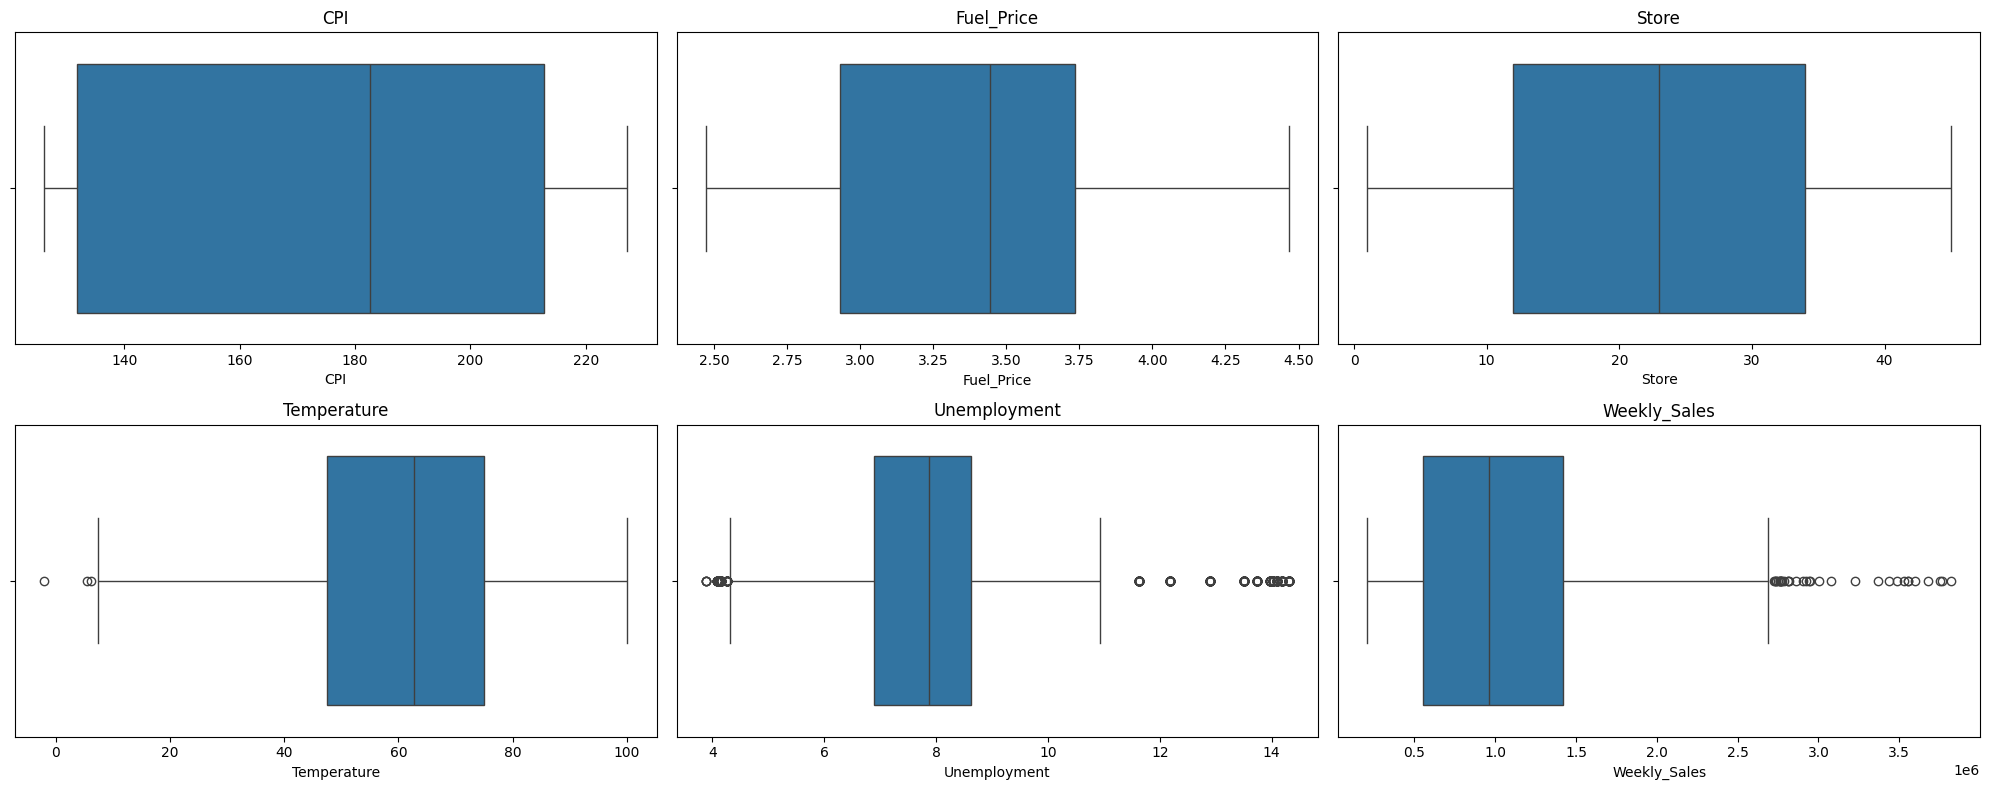

In [45]:
# Finding Outliers: with the help of box plot we are trying to plot outliers in numeric columns. so that we can treat outliers
plt.figure(figsize=(20,8)) # setting the frame size for multiple plots

# Using for loop we looping the numeric columns thorough the dataset for plotting the outliers
for i,col in enumerate(num_columns):
    plt.subplot(2,3,i+1) # for sorting the plots
    sns.boxplot(x=df[col]) # for ploting the outliers
    plt.tight_layout() # just to confirm fit the plots appropriately
    plt.title(col)  # setting the title to the plots
plt.show()    # for showing the plots

In [46]:
# Defining the function that can set the inter quartaile range which can define outliers range.
def remove_outliers(df1,col): # defing function name as remove_outliers
# Setting the Q1 range at the 0.25 percentile, which means the data falling below the 0.25 percentile will be treated as outliers.
    q1=df1[col].quantile(0.25)
# Setting the Q3 range at the 0.75 percentile, which means the data falling below the 0.75 percentile will be treated as outliers.
    q3=df1[col].quantile(0.75) #
    IQR=q3-q1  # Setting the Inter Quartaile Range by subtracting the Q3 From Q1.
    Lower_Band = q1-1.5*IQR # Setting the lower band for separate the outliers
    Upper_Band = q3+1.5*IQR # Setting the Upper band for separate the outliers
    df[col]=np.clip(df[col],Lower_Band,Upper_Band) # removing the data points which are falls below and above the upper bands and lower bands
    return df1 # Return dataset

# Defining the function that can remove outliers
def treat_outliers(df1,col_list):# defing function name as treat_outliers
    for col in col_list:              # Using for loop to loop through col list of numeric column which we created earlier and dataset
        df1=remove_outliers(df1,col) # removing the outliers from the data
    return df1 # Return the dataset

In [47]:
df=treat_outliers(df,num_columns) # Removing the outliers

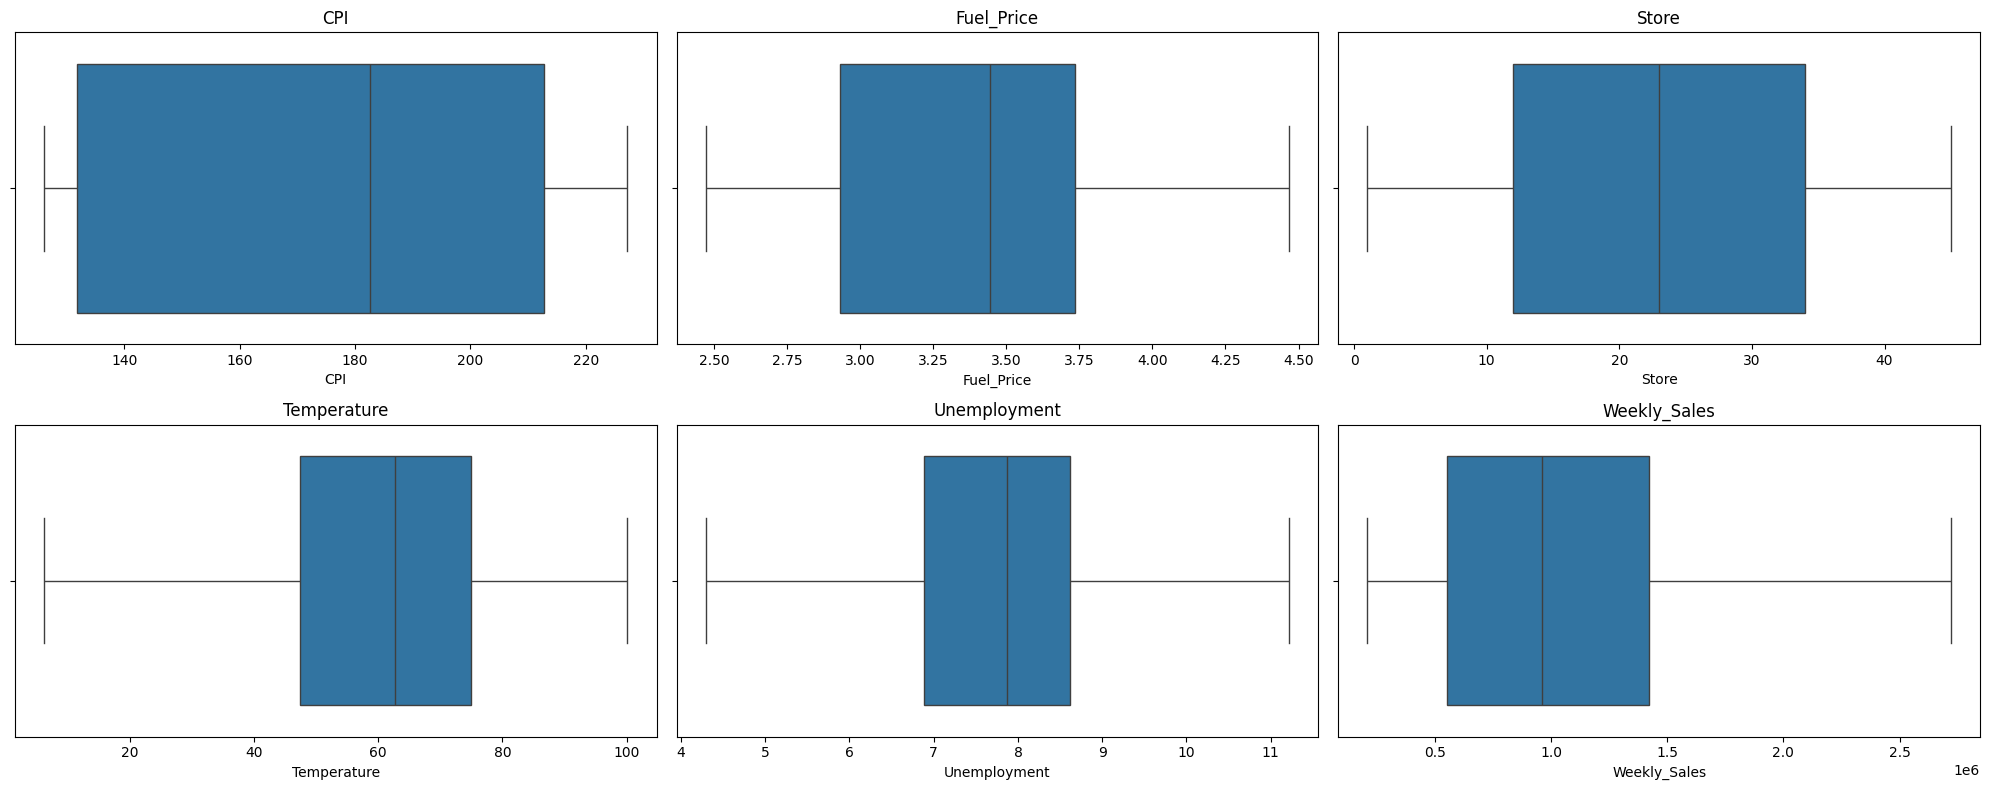

In [48]:
# Cross Checking the Outliers after deleting the outliers.
plt.figure(figsize=(20,8)) # setting the frame size for multiple plots

# Using for loop we looping the numeric columns thorough the dataset for plotting the outliers
for i,col in enumerate(num_columns):
    plt.subplot(2,3,i+1) # for sorting the plots
    sns.boxplot(x=df[col]) # for ploting the outliers
    plt.tight_layout() # just to confirm fit the plots appropriately
    plt.title(col)  # setting the title to the plots
plt.show()    # for showing the plots

**_______________________________________________________________________________________________________________________**
# Second Step

# EDA

In [49]:
df.head() # look at the data

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

### Now we are exploring the data by Indipendent variables with the target variable which is Weekly sales

## Store V/s Weekly Sales

In [50]:
df_store_sales = df.groupby('Store')['Weekly_Sales'].sum().reset_index()

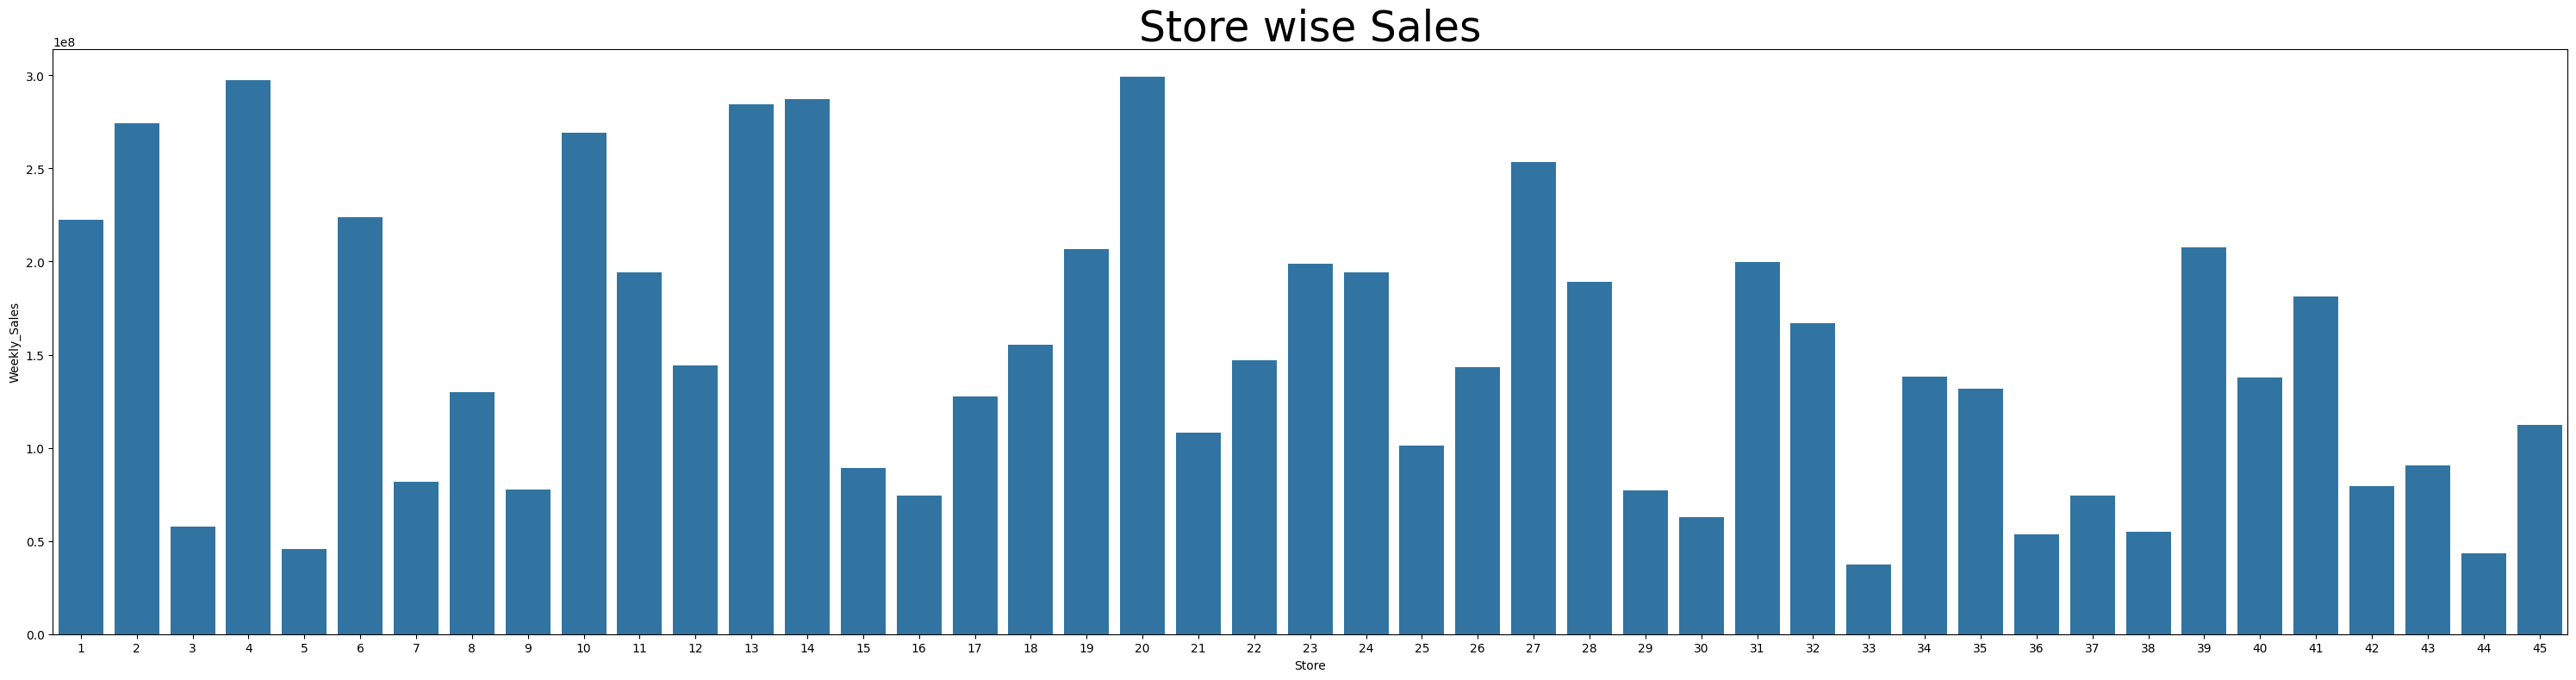

In [51]:
plt.figure(figsize=(30,8))
sns.barplot(x='Store',y='Weekly_Sales',data=df_store_sales)
plt.title('Store wise Sales',fontsize=35)
#plt.xlabel('Store',fontsize=25)
#plt.ylabel('Weekly_Sales',fontsize=25)
plt.tight_layout()
plt.show()

## Inference
- **Since we have 45 stores we cant take all the store sales. so we tried to plot top and botttom 10 stores saleswise.**

In [52]:
# Creating the dataframe which is having top 10 stores that can have highest weekly sales
top_10_Sale_Store = df_store_sales.sort_values(by='Weekly_Sales',ascending=False).head(10)
# Looking the dataframe
top_10_Sale_Store

Store  Weekly_Sales
19     20  2.990663e+08
3       4  2.973575e+08
13     14  2.870091e+08
12     13  2.845247e+08
1       2  2.741628e+08
9      10  2.692807e+08
26     27  2.534795e+08
5       6  2.237489e+08
0       1  2.224028e+08
38     39  2.074455e+08

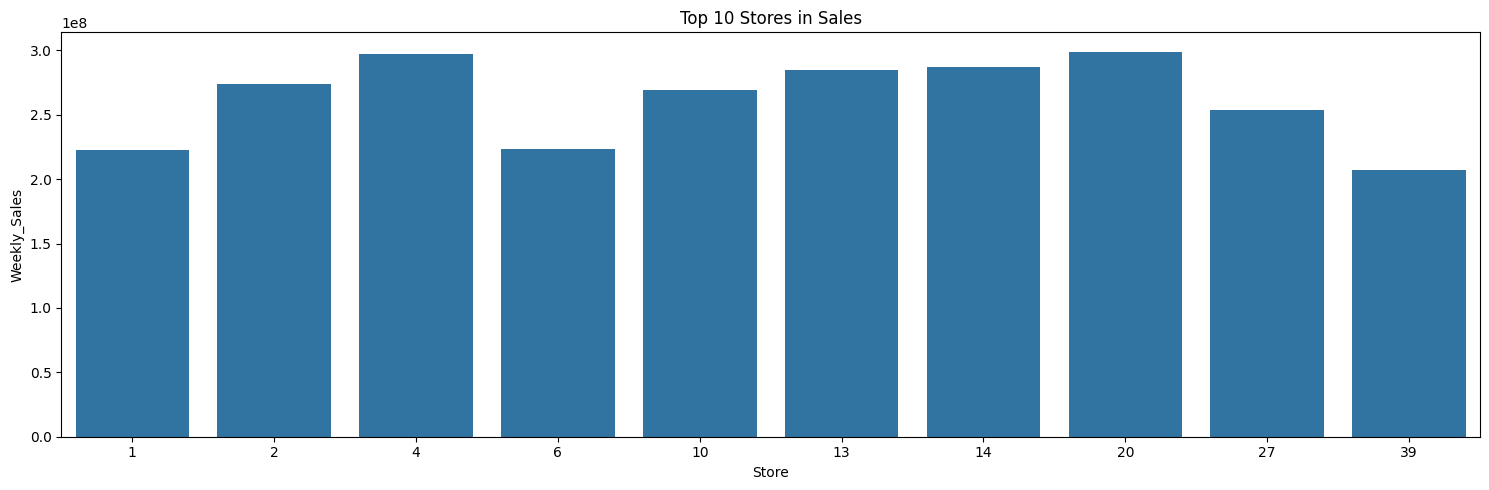

In [53]:
# plotting the top 10 stores
plt.figure(figsize=(15,5)) # setting the frame to plot the store sales
sns.barplot(x='Store',y='Weekly_Sales',data=top_10_Sale_Store) # creating the barplot
plt.title('Top 10 Stores in Sales') # putting title
plt.xlabel('Store') # assigening the X label as "Store"
plt.ylabel('Weekly_Sales') # assigening the Y label as "Weekly Sales"
plt.tight_layout() # this can help the barplot to set correctly in the frame
plt.show() # showing the plot

## Inference:
- **The Stores 4,20,14 is having the highest sales in top 10 stores segment**
- **The Stores 6,39 is having the Lowest sales in top 10 stores segment**

In [54]:
# Creating the dataframe which is having Bottom 10 stores that can have Lowest  weekly sales
Bottom_10_Sale_Store = df_store_sales.sort_values(by='Weekly_Sales',ascending=True).head(10)
Bottom_10_Sale_Store # Lokking at the data

Store  Weekly_Sales
32     33   37160221.96
43     44   43293087.84
4       5   45475688.90
35     36   53412214.97
37     38   55159626.42
2       3   57586735.07
29     30   62716885.12
36     37   74202740.32
15     16   74252425.40
28     29   77141554.31

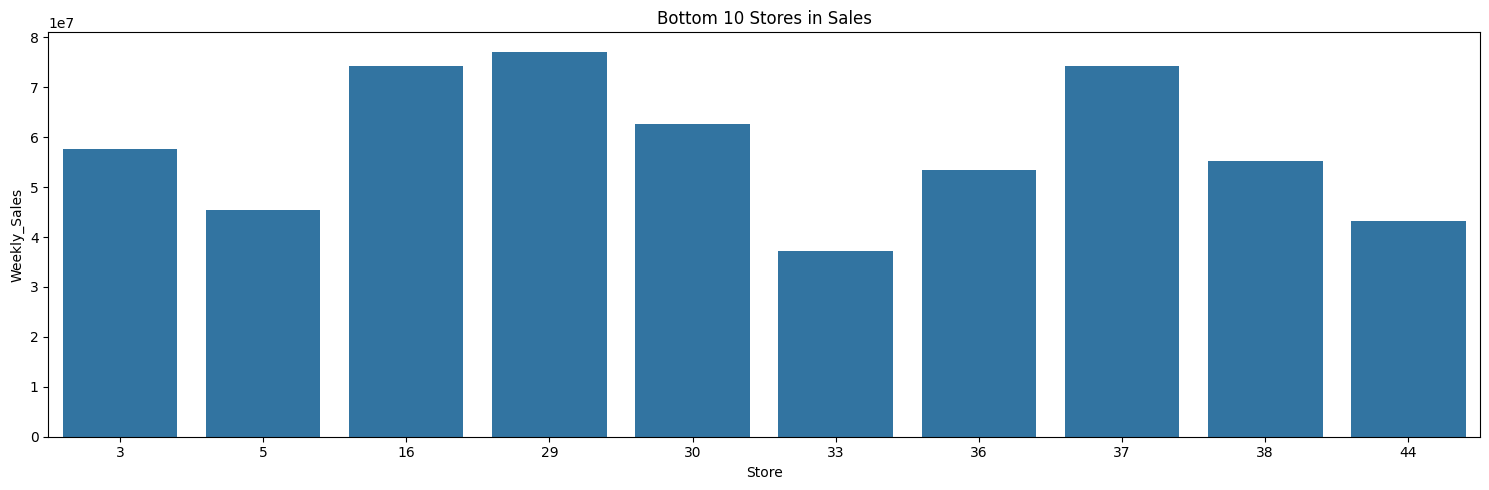

In [55]:
# plotting the Bottom 10 stores
plt.figure(figsize=(15,5)) # setting the frame to plot the store sales
sns.barplot(x='Store',y='Weekly_Sales',data=Bottom_10_Sale_Store) # creating the barplot
plt.title('Bottom 10 Stores in Sales') # Set the titles
plt.xlabel('Store') # asigening the 'X' label as "Store"
plt.ylabel('Weekly_Sales') # asigening the 'Y' label as "Weekly sales"
plt.tight_layout() # this can help the barplot to set correctly in the frame
plt.show() # Showing the plots

## Inference:
- **The Stores 29,16,37 is having the highest sales in Bottom 10 stores segment**
- **The Stores 33,44 is having the highest sales in Bottom 10 stores segment**

### Date V/s Weekly Sales

In [56]:
df.head() # Looking at the data

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [58]:
# Converting the data type of the date column to date time format from "object" Type
df['Date']=pd.to_datetime(df['Date'],dayfirst=True)

In [59]:
# Creating the dataframe by grouping the date and summing all the weekly sales for the particular 'Date'
df_date_sales = df.groupby('Date')['Weekly_Sales'].sum().reset_index()
df_date_sales=df_date_sales.sort_values(by='Date',ascending=True) # Sorting the values in the dataframe to ascending
df_date_sales.head(5) # Looking at first five data points

Date  Weekly_Sales
0 2010-02-05   49750740.50
1 2010-02-12   48336677.63
2 2010-02-19   48276993.78
3 2010-02-26   43968571.13
4 2010-03-05   46871470.30

In [60]:
df_date_sales.shape

(143, 2)

Text(0, 0.5, 'Sales')

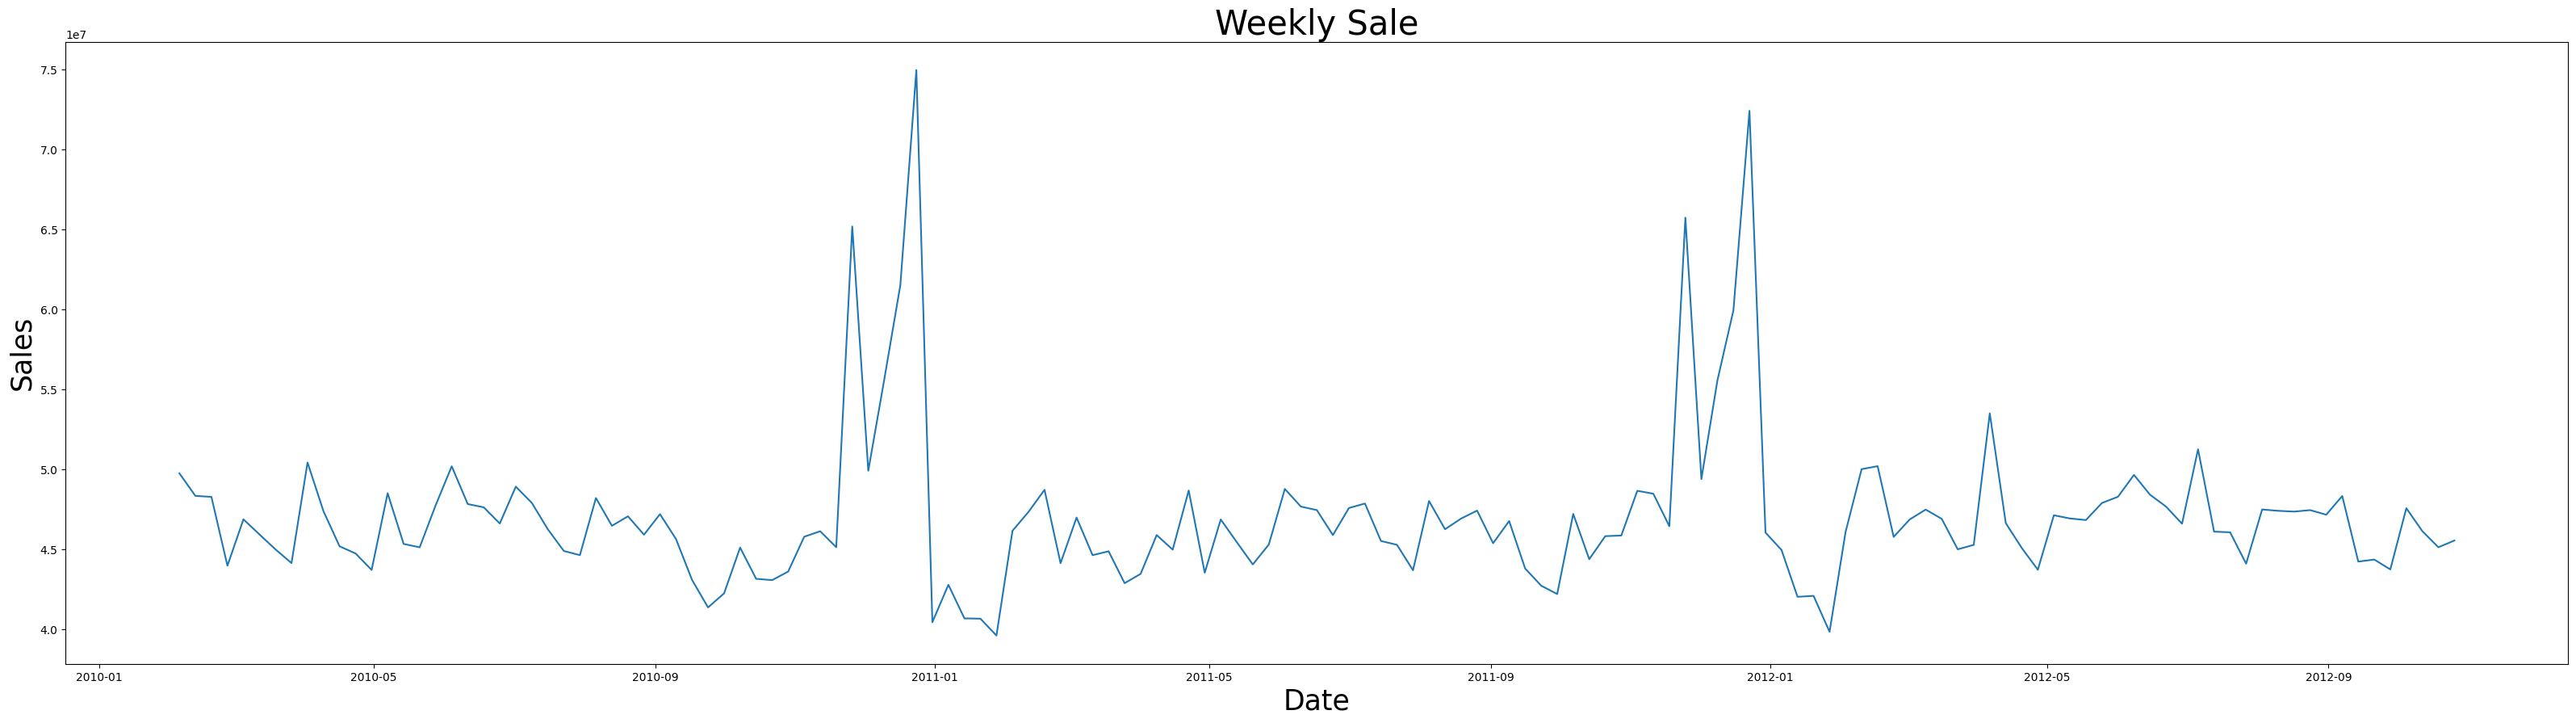

In [61]:
# Plotting the line chart for checking the trend of weekly sales
plt.figure(figsize=(40,10)) # Setting the size for plot
sns.lineplot(x='Date',y='Weekly_Sales',data=df_date_sales) # line plot
plt.title('Weekly Sale',fontsize=30) # setting titile
plt.xlabel('Date',fontsize=25) # xLabel as Date
plt.ylabel('Sales',fontsize=25) # Ylabel as Sales

### Inference:
- **Weekly Sales most of weeks are consolidating expect some quarters**
- **We will See what quarters they are**

In [62]:
# Categorizing the sales into quarters
df['Quarters'] = df['Date'].dt.to_period("Q")

In [63]:
# creating a new dataframe by grouping the quarters with summation of the weekly sales
df_quarter_sales = df.groupby('Quarters')['Weekly_Sales'].sum().reset_index()

In [64]:
df_quarter_sales # Looking at the data

Quarters  Weekly_Sales
0    2010Q1  3.722528e+08
1    2010Q2  6.103695e+08
2    2010Q3  5.974881e+08
3    2010Q4  7.018634e+08
4    2011Q1  5.293917e+08
5    2011Q2  5.979481e+08
6    2011Q3  6.393585e+08
7    2011Q4  6.759581e+08
8    2012Q1  5.924677e+08
9    2012Q2  6.182977e+08
10   2012Q3  6.050058e+08
11   2012Q4  1.843617e+08

<Axes: xlabel='Quarters', ylabel='Weekly_Sales'>

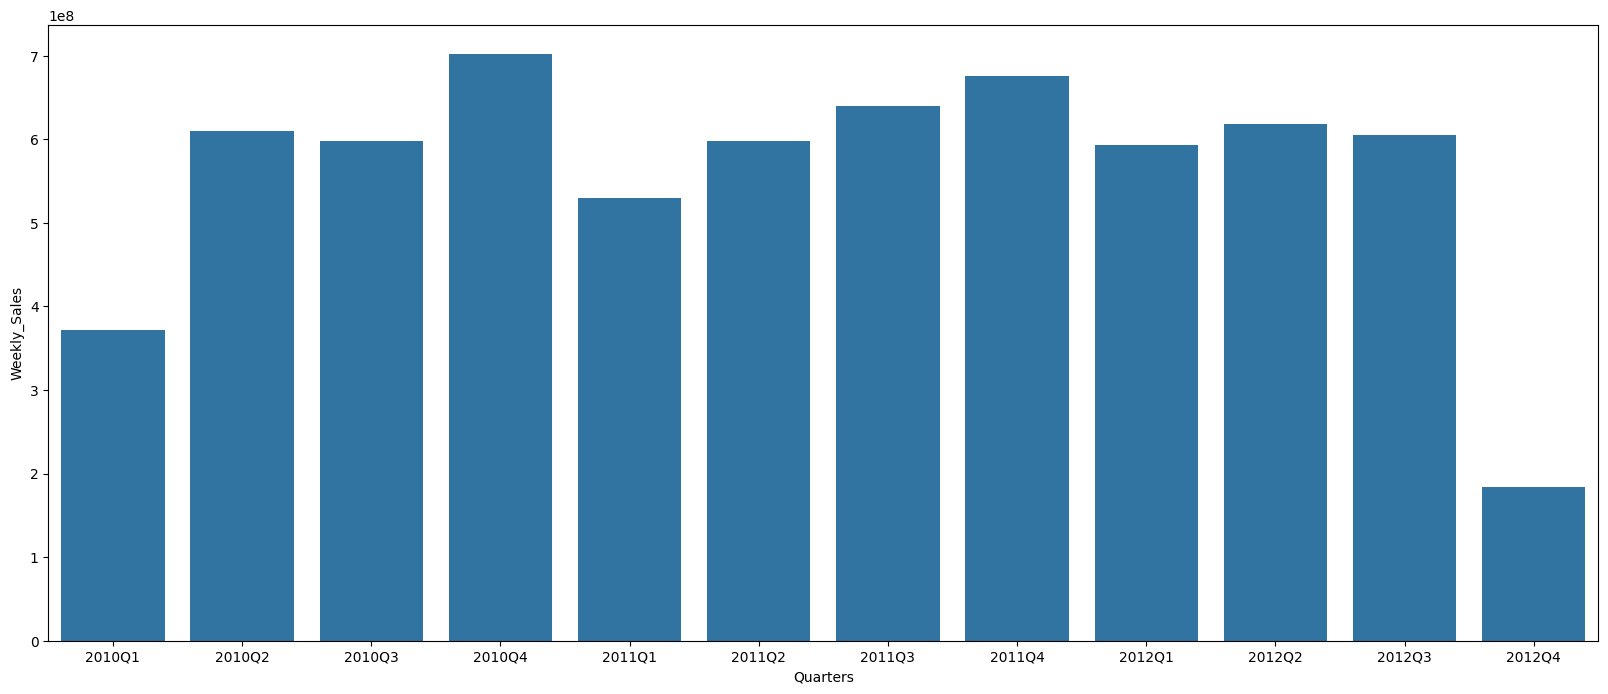

In [65]:
# Plotting barplot to asses the quarter wise sales
plt.figure(figsize=(20,8))
sns.barplot(x='Quarters',y='Weekly_Sales',data=df_quarter_sales)

### Inference:
- **In 2010 the Q2,Q4 Performed well**
- **In 2011 also perofomnce is continued and Q4 is in peak sales**
- **In 2012 the perofomnce got distrubed and Q2 Sales are high and Q4 is turned in very bad performance comparing all 3 years**

## sales v/s Holidays

In [66]:
df['Holiday_Flag'].value_counts() # Checking the diffirent levels in Holiday column

Holiday_Flag
0    5985
1     450
Name: count, dtype: int64

In [70]:
# Creating a new datafram that contains holiday and weekly sales summation
df_Hf_Sales = df.groupby('Holiday_Flag')['Weekly_Sales'].sum().reset_index()

In [71]:
df_Hf_Sales# Checking The Df

Holiday_Flag  Weekly_Sales
0             0  6.220935e+09
1             1  5.038284e+08

<Axes: xlabel='Holiday_Flag', ylabel='Weekly_Sales'>

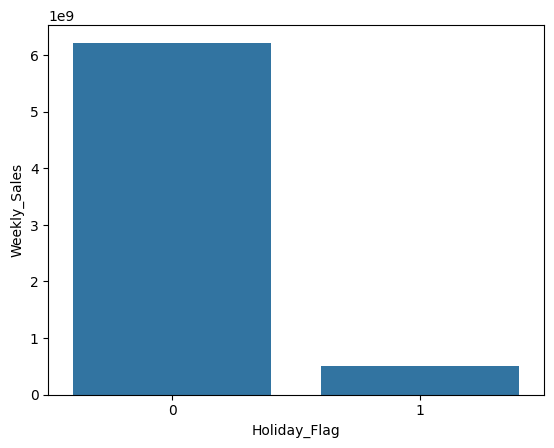

In [72]:
sns.barplot(x='Holiday_Flag',y='Weekly_Sales',data=df_Hf_Sales) # Plotting the distribution

### Inference:
- **The Sales are High In Normal Days, it is Quite common because of that holidays are always low compared to working days**

## Temperature v/s sales

In [73]:
df['Temperature'].min() # finding the lower band of Tempeture

6.240000000000002

In [74]:
df['Temperature'].max() # finding the Upper band of Tempeture

100.14

In [75]:
bins = [0,25,50,75,100] # Creating bins to sort the tempeture values
labels = ['0-25','26-50','51-75','76-100'] # Labels

In [76]:
df['Temp_Category']= pd.cut(df['Temperature'],bins=bins,labels=labels) # Inserting the temp values into the new column

In [77]:
df['Temp_Category'].value_counts() # Checking the diffirent columns in the temp category column

Temp_Category
51-75     2982
26-50     1631
76-100    1596
0-25       224
Name: count, dtype: int64

In [78]:
# finding sales pattren during these temp levels
df_temp_sales = df.groupby('Temp_Category')['Weekly_Sales'].sum().reset_index()

<Axes: xlabel='Temp_Category', ylabel='Weekly_Sales'>

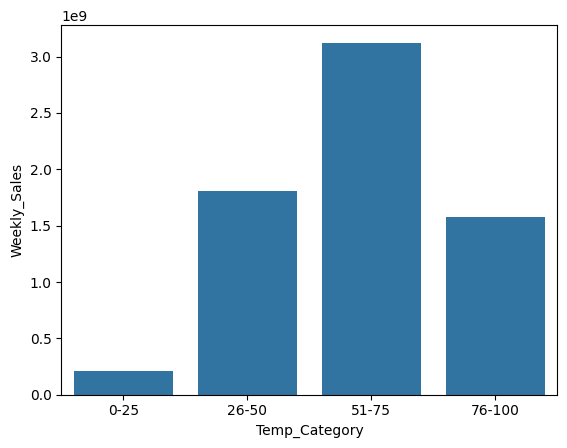

In [79]:
# Plotting the weekly sales distribution on barplot
sns.barplot(x='Temp_Category',y='Weekly_Sales',data=df_temp_sales)

### Inference:
- **Stores perform well in moderate temp that is 26-50**
- **Sales went peaks in Moderate to High temp that is 51-75**
- **Sales went down in Very High and Low temp that is 0-25 & 76-100**

## Fuel_Price V/s Sales

In [80]:
df['Fuel_Price'].min() # Checking the lower price band for fuel

2.472

In [81]:
df['Fuel_Price'].max() # Checking the Upper price band for fuel

4.468

In [82]:
bins1 = [2,2.5,3,3.5,4,4.5] # Creating bins and labels to categorize the fuel prices
labels1 = ['2-2.5','2.6-3','3.1-3.5','3.6-4','4.1-4.5']

In [83]:
df['Fuel_Price_Cat']= pd.cut(df['Fuel_Price'],bins=bins1,labels=labels1) # creating new dataframe Fuel price category

In [84]:
df['Fuel_Price_Cat'].value_counts() # Checking the different levels in the fuel price category

Fuel_Price_Cat
3.6-4      2625
2.6-3      1872
3.1-3.5    1533
4.1-4.5     404
2-2.5         1
Name: count, dtype: int64

In [85]:
df_Fuel_Price_Sales = df.groupby('Fuel_Price_Cat')['Weekly_Sales'].sum().reset_index() # setting above values into pandas datframe

In [86]:
df_Fuel_Price_Sales

Fuel_Price_Cat  Weekly_Sales
0          2-2.5  4.702810e+05
1          2.6-3  1.945889e+09
2        3.1-3.5  1.620472e+09
3          3.6-4  2.738130e+09
4        4.1-4.5  4.198009e+08

<Axes: xlabel='Fuel_Price_Cat', ylabel='Weekly_Sales'>

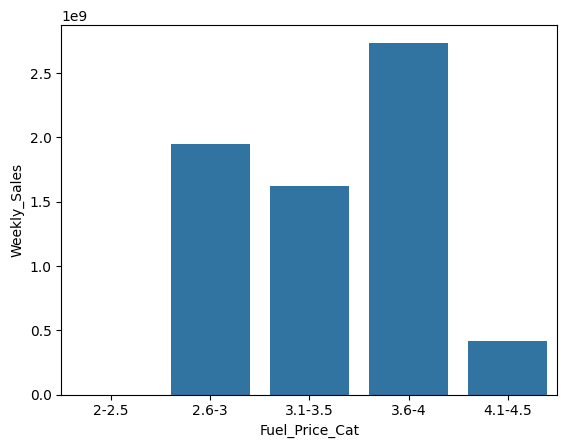

In [87]:
sns.barplot(x='Fuel_Price_Cat',y='Weekly_Sales',data=df_Fuel_Price_Sales)

# Inference:
- **When the fuel prices are modereate the performance of stores are also moderatly high**
- **But the fuel Price went above the modereate level that is 3.5, and the sales are also went very High.. May be the Inflation and fear of increasing prices people are bought more grocery to metigate with inflation**
- **and when fuel price went even high the purchase power of people went down. may be the inflation and increasing in goods price**

## CPI v/s Sales

In [88]:
df['CPI'].min() # Checking the lower band of inflation

126.064

In [89]:
df['CPI'].max() # Checking the Upper band of inflation

227.2328068

In [90]:
bins2=[125,155,185,215,245] # Creating bins and labels for categorization of inflation rate
labels2=['125-155','156-185','186-215','216-245',]

In [91]:
df['CPI_cat']= pd.cut(df['CPI'],bins=bins2,labels=labels2) # Creating a new column called CPI Category

In [92]:
df.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05    1643690.90             0        42.31       2.572   
1      1 2010-02-12    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-03-05    1554806.68             0        46.50       2.625   

          CPI  Unemployment Quarters Temp_Category Fuel_Price_Cat  CPI_cat  
0  211.096358         8.106   2010Q1         26-50          2.6-3  186-215  
1  211.242170         8.106   2010Q1         26-50          2.6-3  186-215  
2  211.289143         8.106   2010Q1         26-50          2.6-3  186-215  
3  211.319643         8.106   2010Q1         26-50          2.6-3  186-215  
4  211.350143         8.106   2010Q1         26-50          2.6-3  186-215

In [93]:
df['CPI_cat'].value_counts() # Checking diffirent levels in inflation

CPI_cat
125-155    3146
186-215    2010
216-245    1159
156-185     120
Name: count, dtype: int64

In [94]:
df_Cpi_Sales = df.groupby('CPI_cat')['Weekly_Sales'].sum().reset_index() # new DF

In [95]:
df_Cpi_Sales

CPI_cat  Weekly_Sales
0  125-155  3.400064e+09
1  156-185  1.738193e+08
2  186-215  2.028806e+09
3  216-245  1.122074e+09

<Axes: xlabel='CPI_cat', ylabel='Weekly_Sales'>

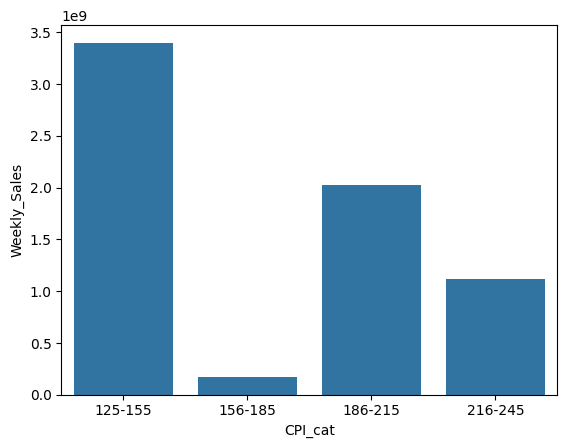

In [96]:
sns.barplot(x='CPI_cat',y='Weekly_Sales',data=df_Cpi_Sales)

### Inference:
- **when inflation is lower the performance of stores are high**
- **in intial time of inflation the sale were drop signficantly**
- **in third level when inflation is high the people may scared for future prices and bought more grocery for future needs also**
- **eventually when the inflation went peaks the sales are went down**

## Unemployment V/s Sales

In [97]:
df['Unemployment'].min() # Cheking the lower band of unemp rate

4.2945

In [98]:
df['Unemployment'].max() # Cheking the Upper band of unemp rate

11.218499999999999

In [99]:
bins3=[4,6,8,10,12] # Creating the bins and labels to store the values
labels3=['4-6','6.1-8','8.1-10','10.1-12']

In [100]:
df['Unemployment_Rate_Cat']= pd.cut(df['Unemployment'],bins=bins3,labels=labels3) # creating the new column in the dataframe

In [101]:
df['Unemployment_Rate_Cat'].value_counts() #Checking the diffirent levels in the UnEmp Column

Unemployment_Rate_Cat
6.1-8      2795
8.1-10     2389
10.1-12     629
4-6         622
Name: count, dtype: int64

In [102]:
df_Un_Emp_Sales = df.groupby('Unemployment_Rate_Cat')['Weekly_Sales'].sum().reset_index() # Creating separte dataframe for the sales and UnEmp rate

<Axes: xlabel='Unemployment_Rate_Cat', ylabel='Weekly_Sales'>

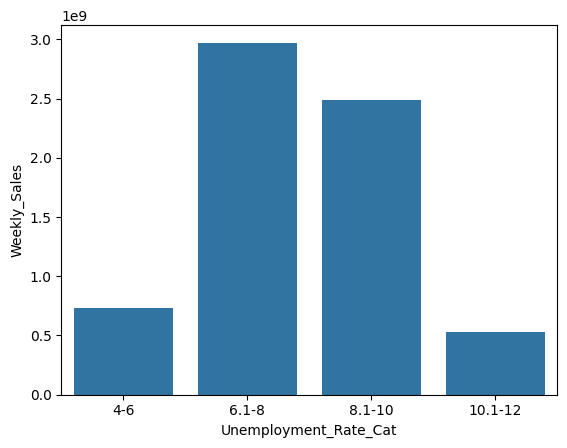

In [103]:
sns.barplot(x='Unemployment_Rate_Cat',y='Weekly_Sales',data=df_Un_Emp_Sales)

### Inference
- **When the Unemployment rate is between the 6 to 10 the stores are performing well**
- **But whenever the Unemployment rate is increasing the sales went down**
**_______________________________________________________________________________________________________________________**

# Fourth Step

# Stastical Analysis

In [104]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

### Correlation Analysis

In [105]:
df_Encode = df[['Quarters','Temp_Category','Fuel_Price_Cat','CPI_cat','Unemployment_Rate_Cat']].copy()

In [106]:
df_Encode['Quarters']=Le.fit_transform(df['Quarters'])
df_Encode['Temp_Category']=Le.fit_transform(df['Temp_Category'])
df_Encode['Fuel_Price_Cat']=Le.fit_transform(df['Fuel_Price_Cat'])
df_Encode['CPI_cat']=Le.fit_transform(df['CPI_cat'])
df_Encode['Unemployment_Rate_Cat']=Le.fit_transform(df['Unemployment_Rate_Cat'])
df_Encode['Weekly_Sales']=Le.fit_transform(df['Weekly_Sales'])

In [107]:
# Dropping Repating columns
#df_Encode.drop('Date',axis=1,inplace=True)
#df_Encode.drop('Temperature',axis=1,inplace=True)
#df_Encode.drop('Fuel_Price',axis=1,inplace=True)
#df_Encode.drop('CPI',axis=1,inplace=True)
#df_Encode.drop('Unemployment',axis=1,inplace=True)

In [108]:
corr_df = df_Encode.corr()

<Axes: >

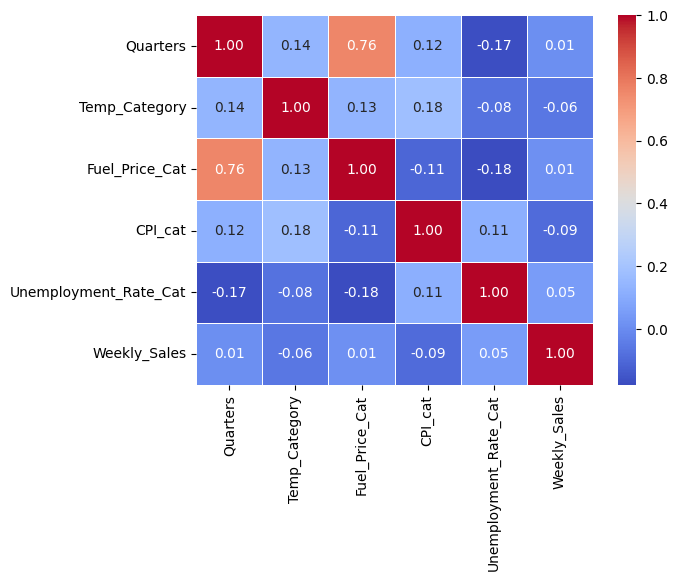

In [109]:
sns.heatmap(corr_df,annot=True,cmap='coolwarm',fmt=".2f",linewidths=.5)

# Inference:
- **Quarters and Fuel Price having high correlation**
- **Because the fuel prices are also depend on the seasonal changes**
**_______________________________________________________________________________________________________________________**

# 5th Step
# Answering Qustions

- **1. You are provided with the weekly sales data for their various outlets. Use statistical
analysis, EDA, outlier analysis, and handle the missing values to come up with various
insights that can give them a clear perspective on the following**

### a. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?

<Axes: xlabel='Unemployment_Rate_Cat', ylabel='Weekly_Sales'>

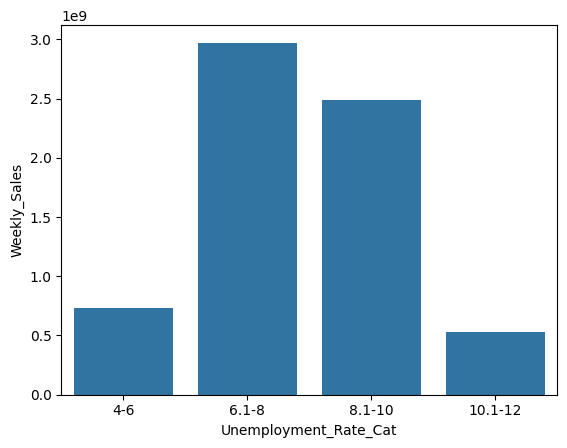

In [110]:
sns.barplot(x='Unemployment_Rate_Cat',y='Weekly_Sales',data=df_Un_Emp_Sales)

# Inference:
- **we can see that where the Unemployment Rate is too low and too high the sales are affected compared to moderate Unemployment Rate.**
- **So we need to find out the store which are suffering the most in this Unemployment rate category.**

In [111]:
df.info()# Checking the dtypes of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Store                  6435 non-null   int64         
 1   Date                   6435 non-null   datetime64[ns]
 2   Weekly_Sales           6435 non-null   float64       
 3   Holiday_Flag           6435 non-null   int64         
 4   Temperature            6435 non-null   float64       
 5   Fuel_Price             6435 non-null   float64       
 6   CPI                    6435 non-null   float64       
 7   Unemployment           6435 non-null   float64       
 8   Quarters               6435 non-null   period[Q-DEC] 
 9   Temp_Category          6433 non-null   category      
 10  Fuel_Price_Cat         6435 non-null   category      
 11  CPI_cat                6435 non-null   category      
 12  Unemployment_Rate_Cat  6435 non-null   category      
dtypes: 

In [112]:
# since we have categorical columns i am going to label encode them just for easy filteration
# For that iam importing the Label Encoder
from sklearn.preprocessing import LabelEncoder

In [113]:
label_encoder=LabelEncoder() # assigening it to a variable

In [114]:
df['Unemployment_Rate_Cat'] = label_encoder.fit_transform(df['Unemployment_Rate_Cat']) # Encoding the data

In [115]:
df['Unemployment_Rate_Cat'].value_counts() # Checking the levels of the categories

Unemployment_Rate_Cat
2    2795
3    2389
0     629
1     622
Name: count, dtype: int64

In [116]:
filtered_df = df[df['Unemployment_Rate_Cat'].isin([1, 0])]

In [117]:
sales_unemp_store= filtered_df.groupby('Store')['Weekly_Sales'].sum().reset_index()

In [118]:
sales_unemp_store

Store  Weekly_Sales
0       4  1.782381e+08
1       5  1.416884e+07
2       6  4.684711e+07
3       8  3.923392e+07
4       9  2.397403e+07
5      12  1.442872e+08
6      13  6.152466e+07
7      16  2.016068e+06
8      17  1.623276e+07
9      23  1.987367e+08
10     28  1.892637e+08
11     29  3.276784e+07
12     33  2.299155e+06
13     34  6.496434e+07
14     38  5.515963e+07
15     40  1.378703e+08
16     43  4.080224e+07
17     44  1.418737e+07

In [119]:
# Since We have 17 stores that are suffering. but i took only 5 stros which suffering more than others stores which are in those 17 stores
print('Most Suffered Stores with Unemployment Rate is listed Below : ')
sales_unemp_store.sort_values(by='Weekly_Sales',ascending=True).head()

Most Suffered Stores with Unemployment Rate is listed Below : 


Store  Weekly_Sales
7      16    2016067.98
12     33    2299155.24
1       5   14168838.13
17     44   14187373.72
8      17   16232762.69

**_______________________________________________________________________________________________________________________**
### b. If the weekly sales show a seasonal trend, when and what could be the reason?

In [120]:
# Weekly Sales
df_stores_sales =df.groupby('Date')['Weekly_Sales'].sum().reset_index()
df_stores_sales.set_index('Date',inplace=True) # Setting the Date column as an Index
from statsmodels.tsa.seasonal import seasonal_decompose
sales_decomposition=seasonal_decompose(df_stores_sales['Weekly_Sales'],period=13)


# Temperature
df_Temperature =df.groupby('Date')['Temperature'].sum().reset_index()
df_Temperature.set_index('Date',inplace=True) # Setting the Date column as an Index
Temperature_decomposition=seasonal_decompose(df_Temperature['Temperature'],period=13)

Figure(640x480)


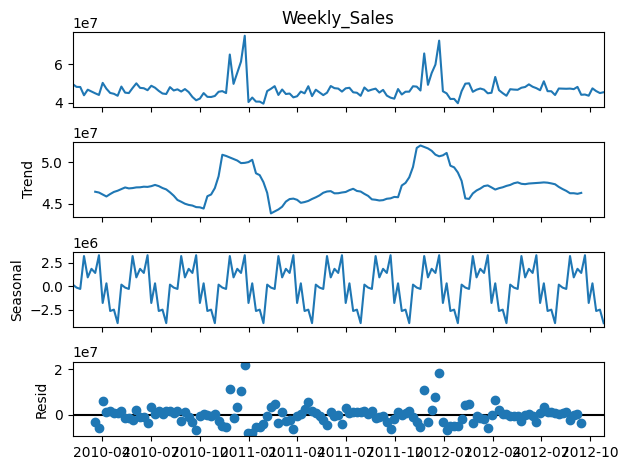

In [121]:
print(sales_decomposition.plot())

# Inference:
- **As we can see in the trend component there is seasonal spikes from 2010-09th month upto 2011-01, then after again in 2011-09th month to 2012-01 there is a seacond seasonal spike, but in 2012 year there is no that much spike**
- **its winter season, and the Temperature may impact the sales, but we will cross check this guess**

Figure(640x480)


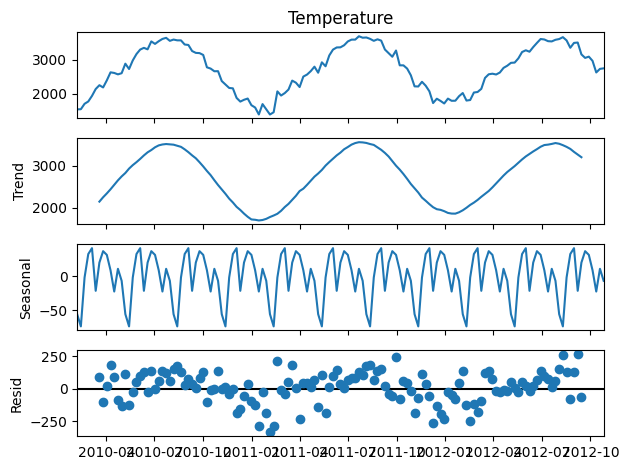

In [122]:
print(Temperature_decomposition.plot())

# Answer for question B:
- **Regarding the Temperature data, a seasonal downward trend is observed starting from September 2010 until January 2011. Subsequently, there's a gradual increase. However, from September 2011, temperatures start to decline again.**

- **In the Weekly Sales Data, there is a noticeable increase in sales starting from September 2010, followed by a seasonal upward trend until January 2011. Afterward, the sales stabilize, eventually transitioning to a downward trend. This pattern is repeated from September 2011 to January 2012.**

- **In summary, there appears to be an inverse relationship between Temperature and Weekly Sales. When temperatures decrease, weekly sales tend to rise, and vice versa. This inverse correlation is evident from September 2011 to January 2012, as well as from September 2011 to January 2012.**
**_______________________________________________________________________________________________________________________**

### c. Does temperature affect the weekly sales in any manner?

- **For answering this qustion we need plot the correlation between the plots**
- **And we alrdey know that Temperature and weekly sales are negativily correlated while finding the answer for B. qustion. so we will confirm that by plotting the correlation values on heatmap**

In [123]:
df_temp_sales = df.groupby(['Date','Temperature'])['Weekly_Sales'].sum().reset_index()

In [124]:
df_temp_sales_correlation =df_temp_sales.corr()

<Axes: >

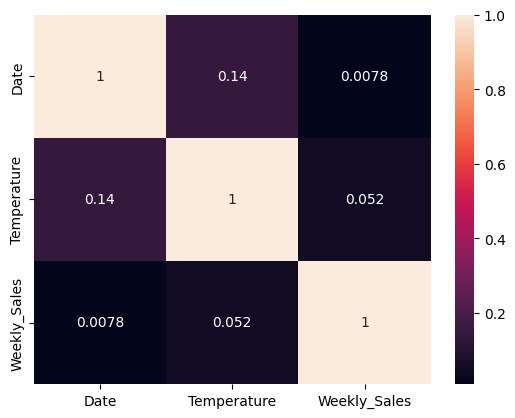

In [125]:
sns.heatmap(df_temp_sales_correlation,annot=True)

# Inference:
- **as we guess there is a nagatively correlation between the temperature and weekly sales**
- **so the answer for qustion c: Yes there is a Nagative correlation and the Temperature is affecting the Weekly Sales**
**_______________________________________________________________________________________________________________________**

### d. How is the Consumer Price index affecting the weekly sales of various stores?

In [126]:
df_cpi_sales = df.groupby(['Date','CPI'])['Weekly_Sales'].sum().reset_index()

In [127]:
df_cpi_sales_correlation =df_cpi_sales.corr()

<Axes: >

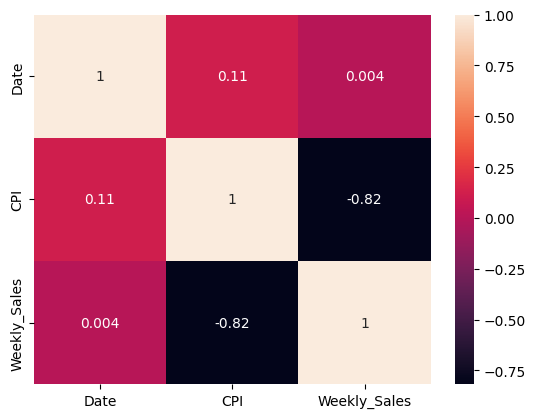

In [128]:
sns.heatmap(df_cpi_sales_correlation,annot=True)

# Inference:
- **there is a nagative correlation between the CPI and weekly sales**
- **so the answer for qustion D: Yes there is a Nagative correlation and the CPI is affecting the Weekly Sales**
- **we can see that in below graph as well. when the CPI increasing the sales are down**
**_______________________________________________________________________________________________________________________**

<Axes: xlabel='CPI_cat', ylabel='Weekly_Sales'>

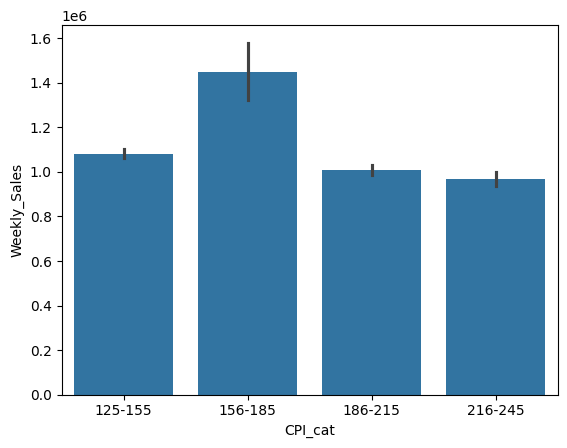

In [129]:
sns.barplot(x=df['CPI_cat'],y=df['Weekly_Sales'])

**_______________________________________________________________________________________________________________________**
### e. Top performing stores according to the historical data.

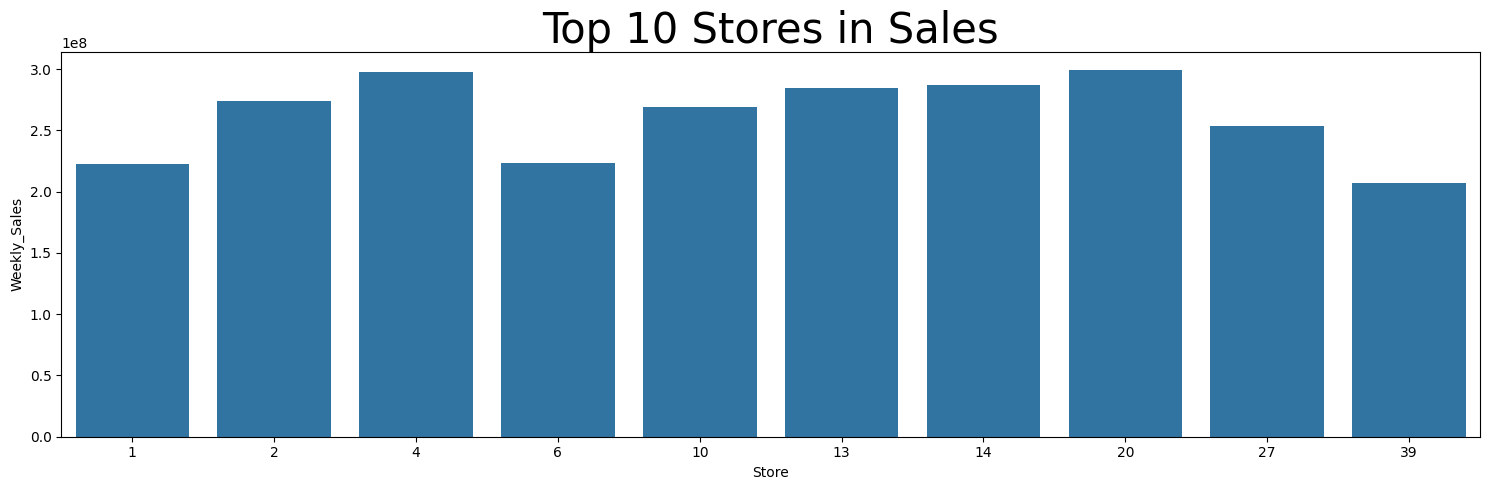

In [130]:
# plotting the top 10 stores
plt.figure(figsize=(15,5)) # setting the frame to plot the store sales
sns.barplot(x='Store',y='Weekly_Sales',data=top_10_Sale_Store) # creating the barplot
plt.title('Top 10 Stores in Sales',fontsize=30) # putting title
plt.xlabel('Store') # assigening the X label as "Store"
plt.ylabel('Weekly_Sales') # assigening the Y label as "Weekly Sales"
plt.tight_layout() # this can help the barplot to set correctly in the frame
plt.show() # showing the plot

## Inference:
- **The Stores 4,20,14 is having the highest sales in top 10 stores segment**
- **The Stores 6,39 is having the Lowest sales in top 10 stores segment**
**_______________________________________________________________________________________________________________________**

### f. The worst performing store, and how significant is the difference between the highest and lowest performing stores.

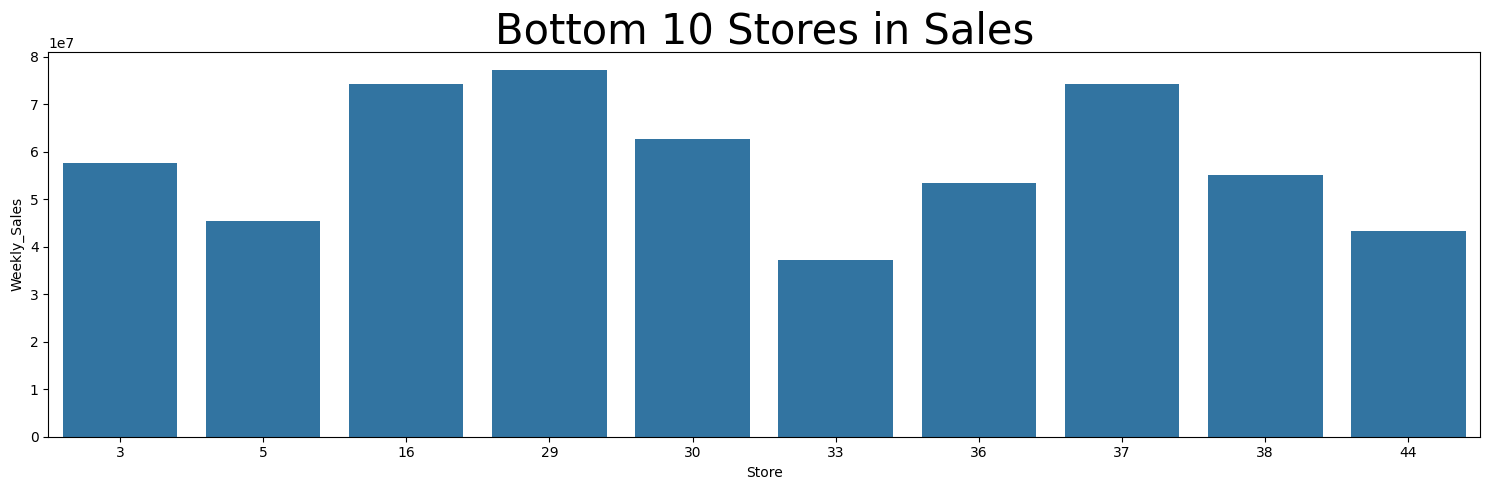

In [131]:
# plotting the Bottom 10 stores
plt.figure(figsize=(15,5)) # setting the frame to plot the store sales
sns.barplot(x='Store',y='Weekly_Sales',data=Bottom_10_Sale_Store) # creating the barplot
plt.title('Bottom 10 Stores in Sales',fontsize=30) # Set the titles
plt.xlabel('Store') # asigening the 'X' label as "Store"
plt.ylabel('Weekly_Sales') # asigening the 'Y' label as "Weekly sales"
plt.tight_layout() # this can help the barplot to set correctly in the frame
plt.show() # Showing the plots

## Inference:
- **The Stores 29,16,37 is having the highest sales in Bottom 10 stores segment**
- **The Stores 33,44 is having the highest sales in Bottom 10 stores segment**
**_______________________________________________________________________________________________________________________**

### Finding The significance difference

- **for getting the signficant difference between top and bottom performing stores**
- **we will use t-test weather it has a significant difference or not**

In [132]:
from scipy.stats import ttest_ind # Importing the ttest_ind.. this helps us to compare mean between the two indipendent groups
top_sales = top_10_Sale_Store['Weekly_Sales']
worst_sales = Bottom_10_Sale_Store['Weekly_Sales']
t_statistic, p_value = ttest_ind(top_sales, worst_sales)

In [133]:
# Interpret results
if p_value < 0.05:
    print("There is a significant difference between top-performing and worst-performing stores.")
    print(f"P-value: {p_value}")
else:
    print("There is no significant difference between top-performing and worst-performing stores.")
    print(f"P-value: {p_value}")

There is a significant difference between top-performing and worst-performing stores.
P-value: 7.079291347377579e-13


In [134]:
mean_difference = top_sales.mean() - worst_sales.mean()
print("Significant Mean difference value between groups:", mean_difference)

Significant Mean difference value between groups: 203807667.66124997


**_______________________________________________________________________________________________________________________**
# 6th Step
# Forecasting sales for wallmart stores using ARIMA Model

In [135]:
df.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05    1643690.90             0        42.31       2.572   
1      1 2010-02-12    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-03-05    1554806.68             0        46.50       2.625   

          CPI  Unemployment Quarters Temp_Category Fuel_Price_Cat  CPI_cat  \
0  211.096358         8.106   2010Q1         26-50          2.6-3  186-215   
1  211.242170         8.106   2010Q1         26-50          2.6-3  186-215   
2  211.289143         8.106   2010Q1         26-50          2.6-3  186-215   
3  211.319643         8.106   2010Q1         26-50          2.6-3  186-215   
4  211.350143         8.106   2010Q1         26-50          2.6-3  186-215   

   Unemployment_Rate_Cat  
0                      3  
1                      3  
2                      3  
3                      3  
4                      3

In [136]:
# Excluding all the varibales.. and considering the date and sales data for model building
df_stores_sales =df.groupby('Date')['Weekly_Sales'].sum().reset_index()

In [137]:
df_stores_sales.set_index('Date',inplace=True) # Setting the Date column as an Index

In [138]:
from statsmodels.tsa.stattools import adfuller # importing the adfuller for check the data stationarity

# check for stationarity
def adf_test(series, title=''): # creating a function

    print('Augmented Dickey-Fuller Test: {}'.format(title))
    result = adfuller(series,autolag='AIC')
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out['critical value ({})'.format(key)]=val

    # .to_string() removes the line "dtype: float64"
    print(out.to_string())

    if result[1] <= 0.05:

        print("Rejects the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary.")

In [139]:
adf_test(df_stores_sales['Weekly_Sales'],title='ADF TEST')

Augmented Dickey-Fuller Test: ADF TEST
ADF test statistic     -6.117153e+00
p-value                 9.036826e-08
# lags used             4.000000e+00
# observations          1.380000e+02
critical value (1%)    -3.478648e+00
critical value (5%)    -2.882722e+00
critical value (10%)   -2.578065e+00
Rejects the null hypothesis
Data has no unit root and is stationary


In [140]:
# Importing the seasonal decompose for break down the components of the time series data
from statsmodels.tsa.seasonal import seasonal_decompose

In [141]:
decomposition=seasonal_decompose(df_stores_sales['Weekly_Sales'],period=13)

Figure(640x480)


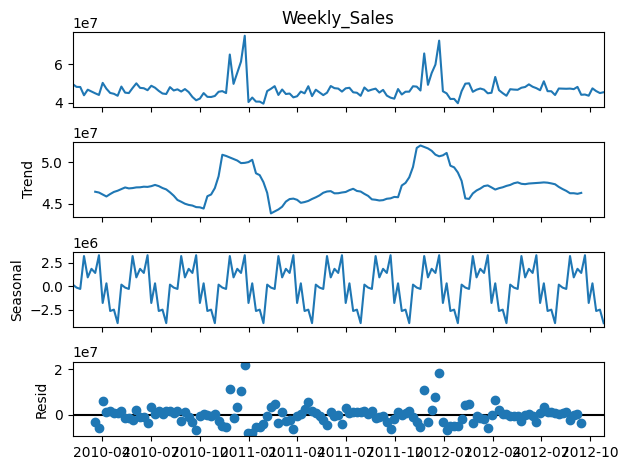

In [142]:
print(decomposition.plot())# Plotting the components of the data

In [143]:
mean1=df_stores_sales.rolling(window=10).mean() # Creating the Rolling mean
std1=df_stores_sales.rolling(window=10).std() # Creating the Rolling standard deviation

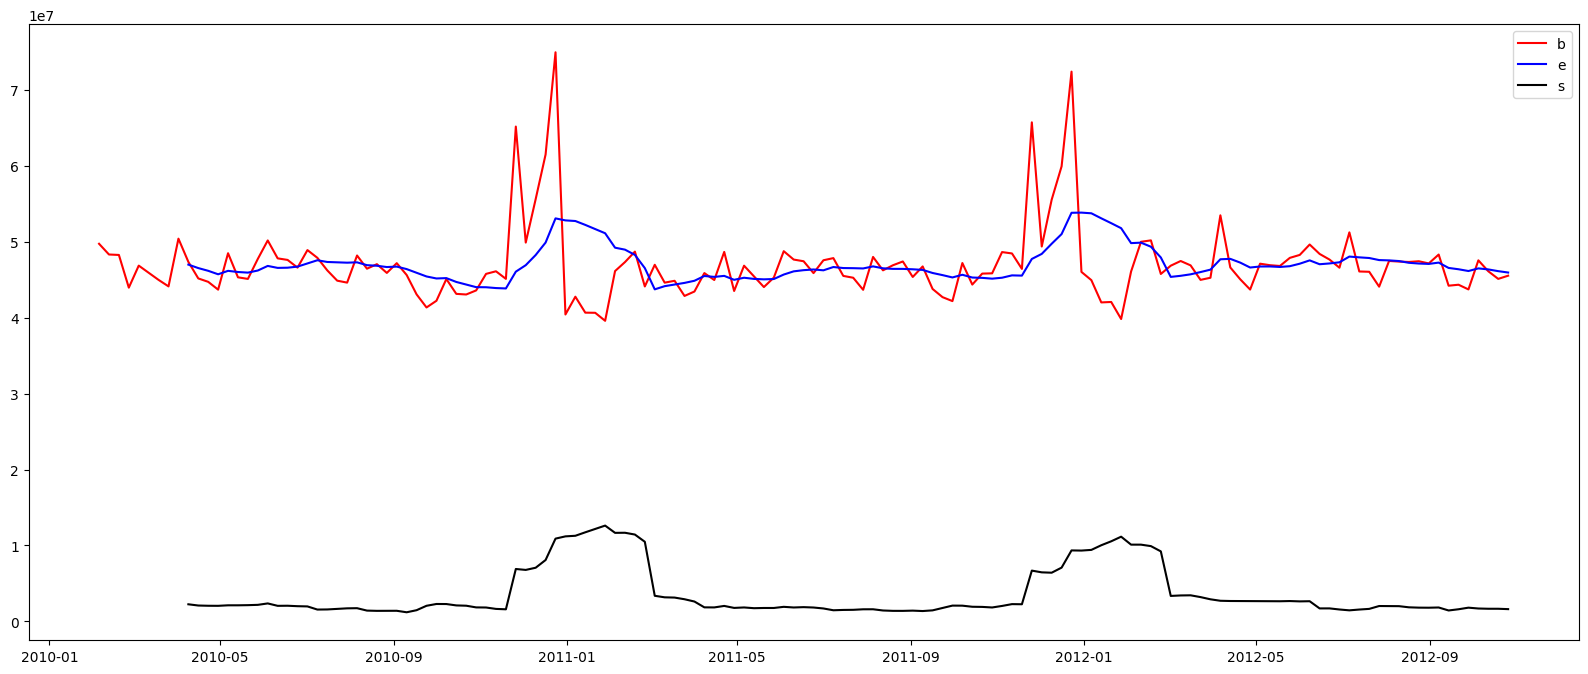

In [144]:
# plotting the rolling mean and standard deviation with respect to weekly sales
plt.figure(figsize=(20,8))
orig=plt.plot(df_stores_sales['Weekly_Sales'],color='red',label='Original')
mean=plt.plot(mean1,color='blue',label='Rolling Mean')
std=plt.plot(std1,color='black',label='Rolling Std')
plt.legend('best')
plt.show(block=False)

## Inference:
- **Mean and sales are alomose close.. but the mean is not capturing the seasonal spikes**

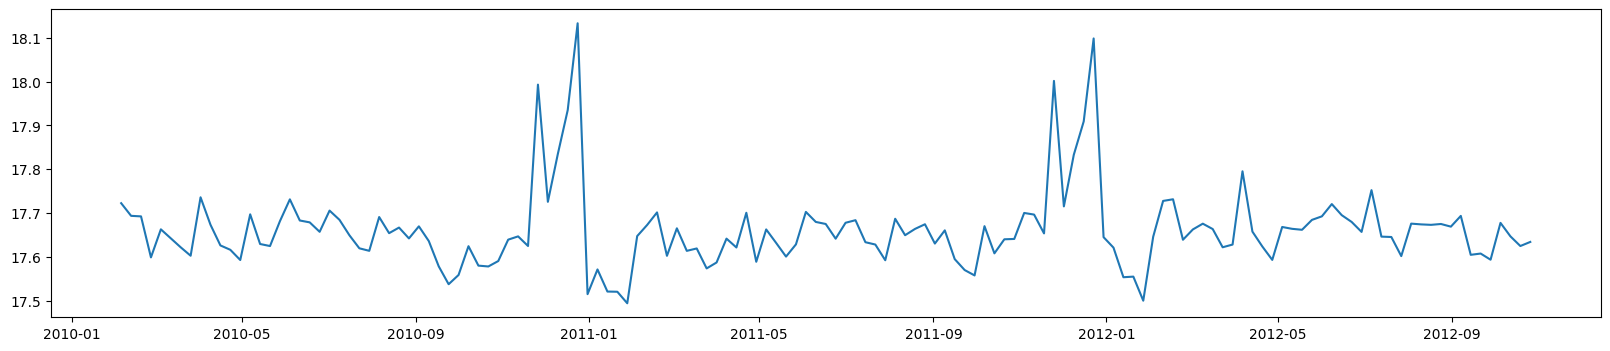

In [145]:
df_log = np.log(df_stores_sales)# applaying log transformation to the data
plt.figure(figsize=(20,4))
plt.plot(df_log)

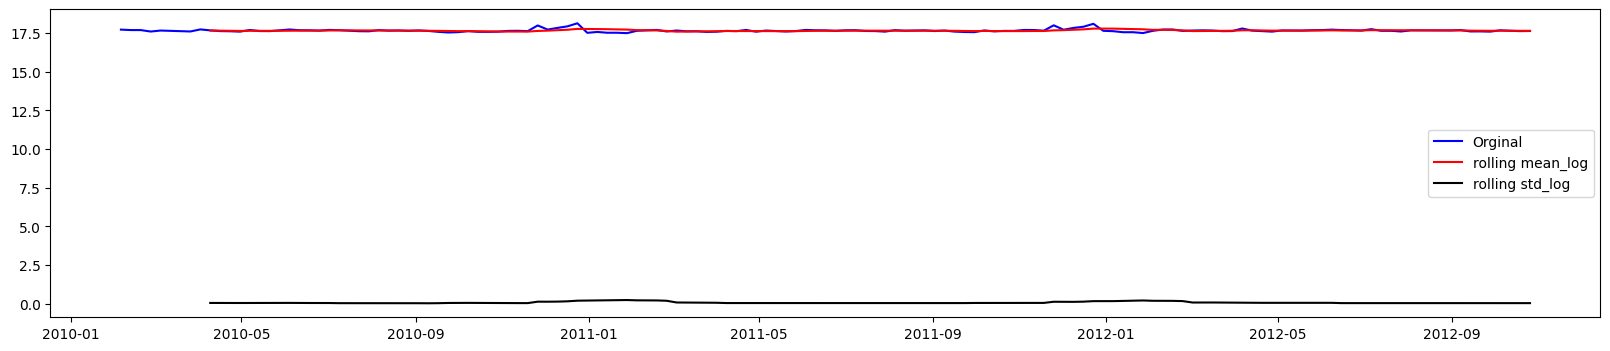

In [146]:
# After the log transformation to the data we are comparing the actual data with rolling mean and standard deviation are colse
mean_log = df_log.rolling(window = 10).mean()
std_log = df_log.rolling(window = 10).std()
plt.figure(figsize=(20,4))
plt.plot(df_log,color= 'blue',label = 'Orginal')
plt.plot(mean_log, color = 'red', label = 'rolling mean_log')
plt.plot(std_log, color = 'black', label = 'rolling std_log')
plt.legend(loc = 'best')
plt.show()

In [147]:
# subtracting the log data and mean log data,
# can help in stabilizing the variance of the data, which is a common requirement for many time series modeling techniques.
df_new = df_log - mean_log
df_new.head(20)

Weekly_Sales
Date                    
2010-02-05           NaN
2010-02-12           NaN
2010-02-19           NaN
2010-02-26           NaN
2010-03-05           NaN
2010-03-12           NaN
2010-03-19           NaN
2010-03-26           NaN
2010-04-02           NaN
2010-04-09      0.008682
2010-04-16     -0.028843
2010-04-23     -0.031090
2010-04-30     -0.044419
2010-05-07      0.049930
2010-05-14     -0.014386
2010-05-21     -0.017260
2010-05-28      0.033577
2010-06-04      0.070372
2010-06-11      0.027454
2010-06-18      0.022628

In [148]:
df_new.dropna(inplace = True) # dropping the nan values

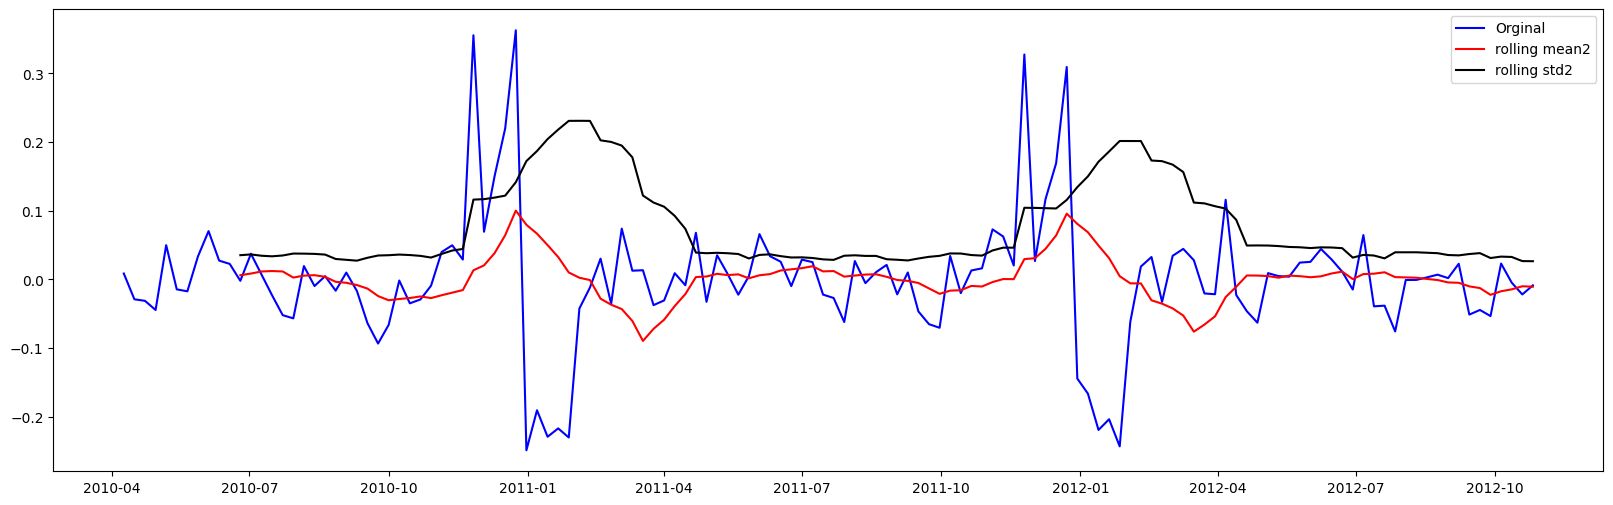

In [149]:
# after the log transformation checking rolling stastics such as mean and standard deviation
mean2 = df_new.rolling(window = 12).mean()
std2 = df_new.rolling(window = 12).std()

plt.figure(figsize=(20,6))
plt.plot(df_new,color= 'blue',label = 'Orginal')
plt.plot(mean2, color = 'red', label = 'rolling mean2')
plt.plot(std2, color = 'black', label = 'rolling std2')
plt.legend(loc = 'best')
plt.show()

In [150]:
adf_test(df_new['Weekly_Sales'],title='ADF TEST') # Checking the Data stationarity again after the log transformation

Augmented Dickey-Fuller Test: ADF TEST
ADF test statistic     -7.135358e+00
p-value                 3.432339e-10
# lags used             4.000000e+00
# observations          1.290000e+02
critical value (1%)    -3.482088e+00
critical value (5%)    -2.884219e+00
critical value (10%)   -2.578864e+00
Rejects the null hypothesis
Data has no unit root and is stationary


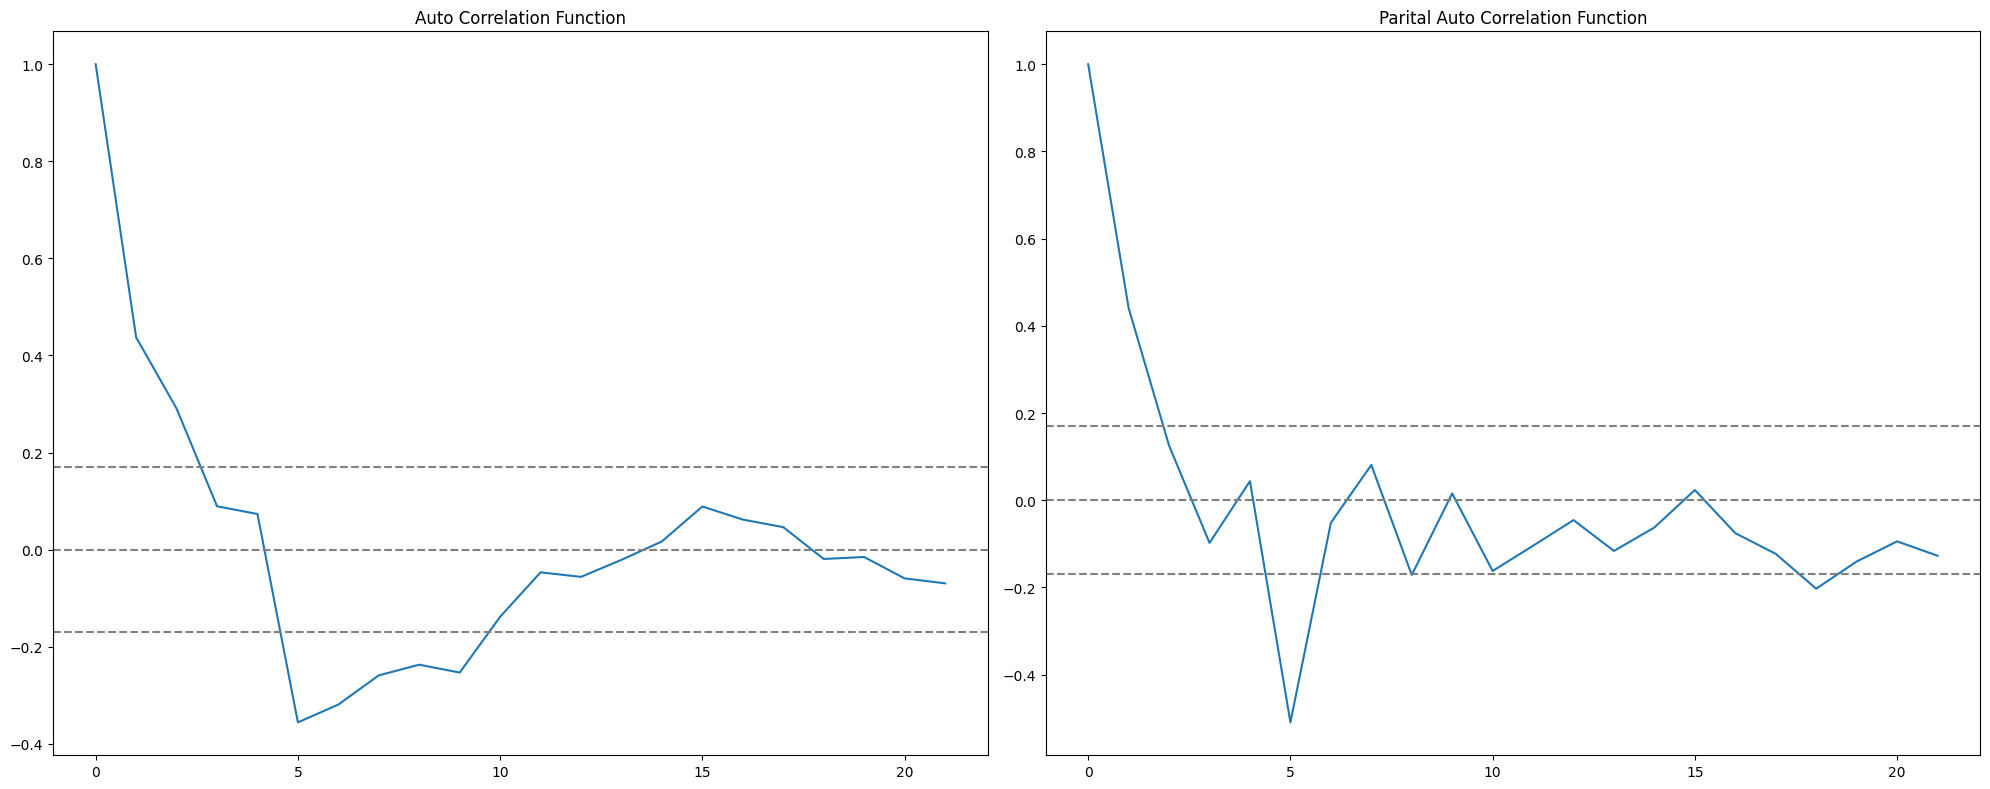

In [151]:
# plotting the acf and pacf plot to identify the values of P AND Q
from statsmodels.tsa.stattools import acf,pacf
lag_acf=acf(df_new)
lag_pacf=pacf(df_new)


# Plot ACf
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.title('Auto Correlation Function')
plt.tight_layout()

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.title('Parital Auto Correlation Function')
plt.tight_layout()

## Inference:
- **we got out P value as 5 and q value as 3**

In [152]:
# Buliding the ARIMA MODEL
from statsmodels.tsa.arima.model import ARIMA


model = ARIMA(df_new, order=(5, 1, 3))
arima_result = model.fit()

# Get predictions on historical data
predictions = arima_result.predict()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


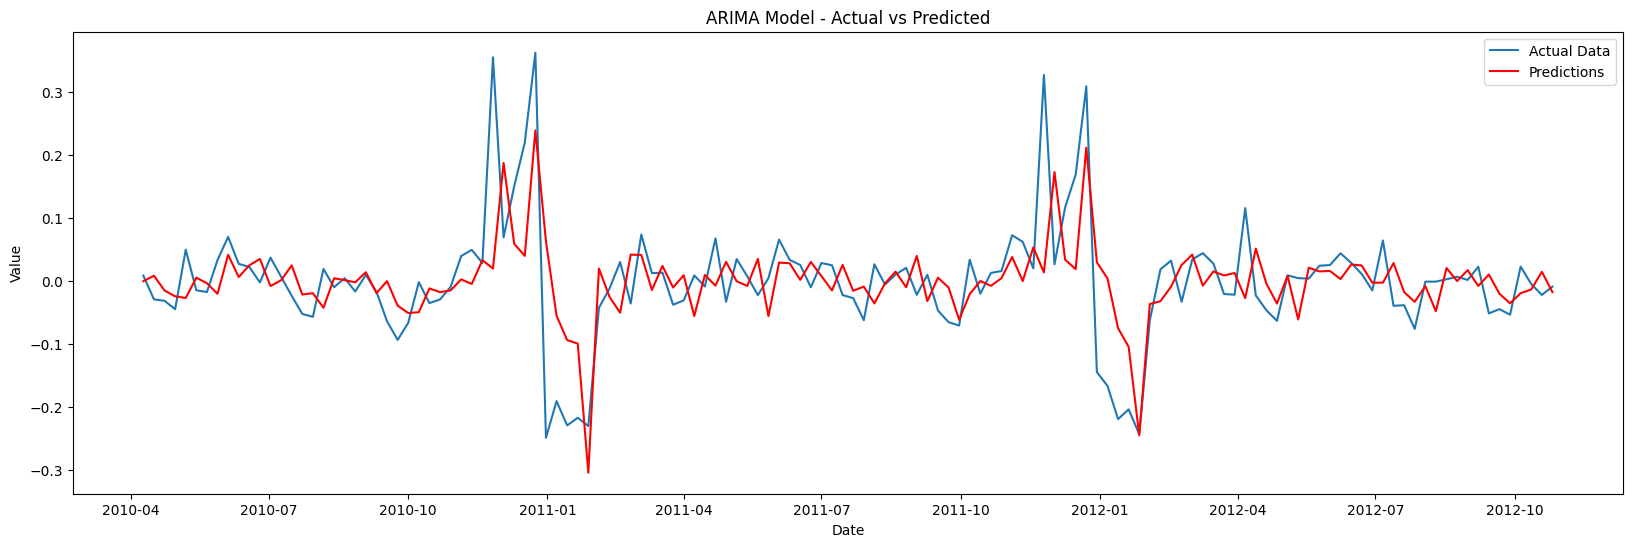

In [153]:
plt.figure(figsize=(20,6))
plt.plot(df_new, label='Actual Data')
plt.plot(predictions, color='red', label='Predictions')
plt.title('ARIMA Model - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [154]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(df_new,predictions)
print(f'Mean Squared_Error{mse}')

Mean Squared_Error0.005793569987750596


In [155]:
rmse=np.sqrt(mse)
print(f'Root Mean Squared_Error{rmse}')

Root Mean Squared_Error0.07611550425340816


**_______________________________________________________________________________________________________________________**
# Store Wise Predictions
## Store 1 Sales Forecast

In [156]:
# Creating a new data frame for store 1 sales forecast
store1_sales=df[df['Store']==1].groupby('Date')['Weekly_Sales'].sum().reset_index()

In [157]:
store1_sales.set_index('Date',inplace=True) # Setting the date column as an index

In [158]:
adf_test(store1_sales['Weekly_Sales'],title='ADF TEST')

Augmented Dickey-Fuller Test: ADF TEST
ADF test statistic       -5.102186
p-value                   0.000014
# lags used               4.000000
# observations          138.000000
critical value (1%)      -3.478648
critical value (5%)      -2.882722
critical value (10%)     -2.578065
Rejects the null hypothesis
Data has no unit root and is stationary


In [159]:
# Importing the seasonal decompose for break down the components of the time series data
from statsmodels.tsa.seasonal import seasonal_decompose

In [160]:
decomposition=seasonal_decompose(store1_sales['Weekly_Sales'],period=13)

Figure(640x480)


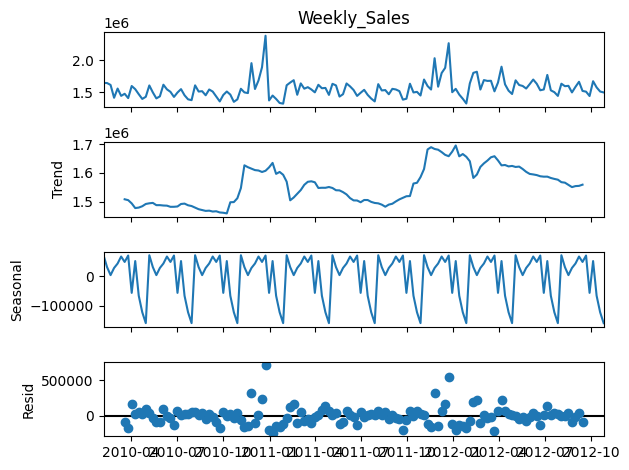

In [161]:
print(decomposition.plot())

In [162]:
mean1=store1_sales.rolling(window=10).mean() # Creating the Rolling mean
std1=store1_sales.rolling(window=10).std() # Creating the Rolling standard deviation

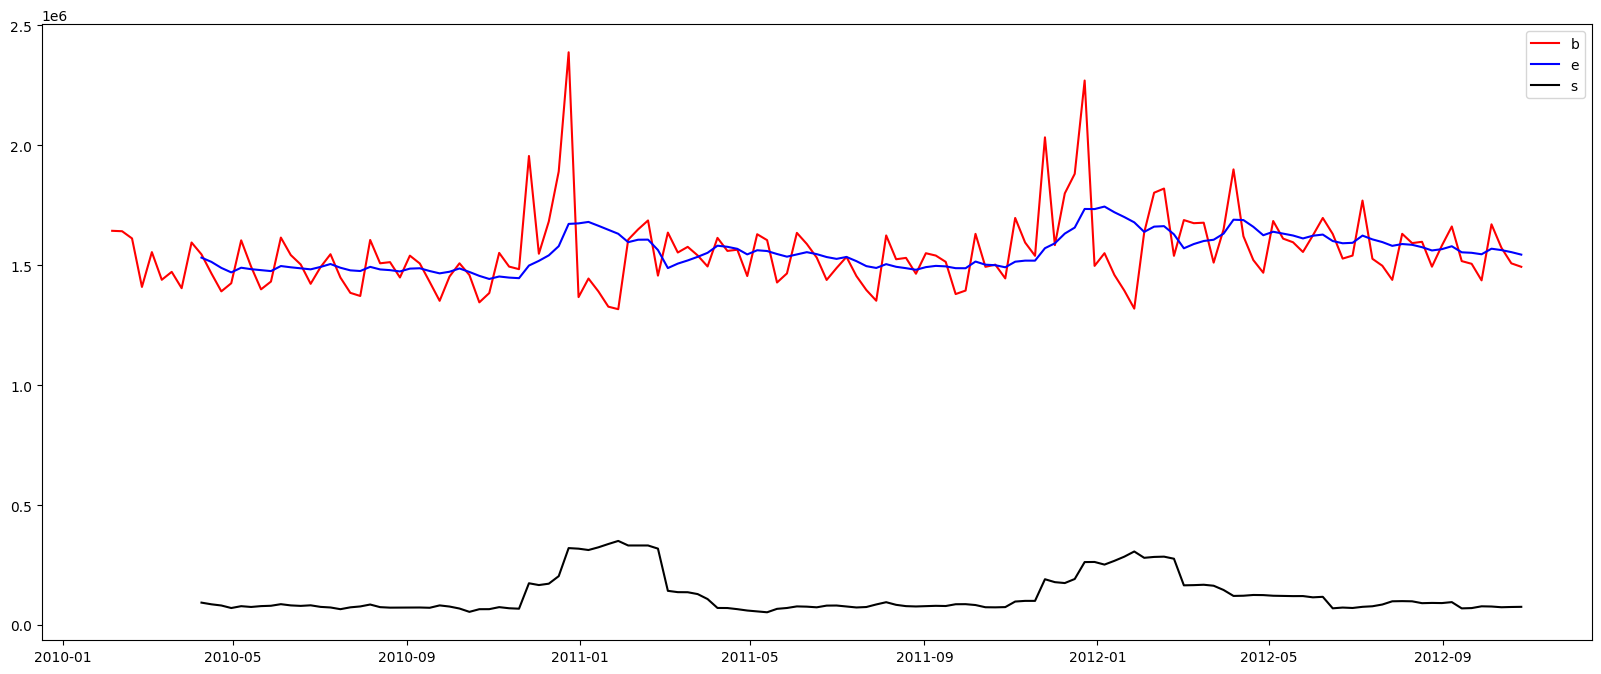

In [163]:
# plotting the rolling mean
plt.figure(figsize=(20,8))
orig=plt.plot(store1_sales['Weekly_Sales'],color='red',label='Original')
mean=plt.plot(mean1,color='blue',label='Rolling Mean')
std=plt.plot(std1,color='black',label='Rolling Std')
plt.legend('best')
plt.show(block=False)

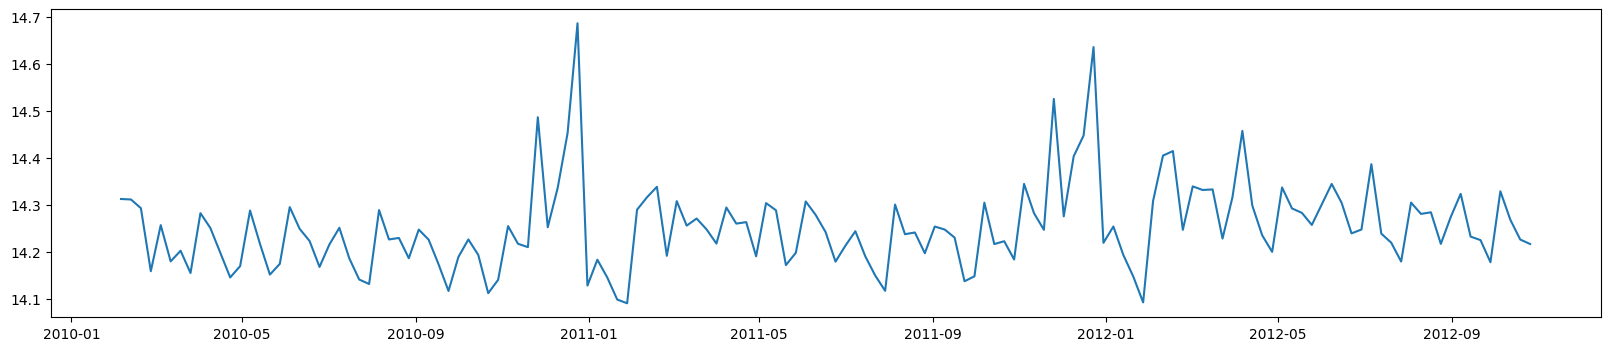

In [164]:
df_log = np.log(store1_sales)# applaying log transformation to the data
plt.figure(figsize=(20,4))
plt.plot(df_log)

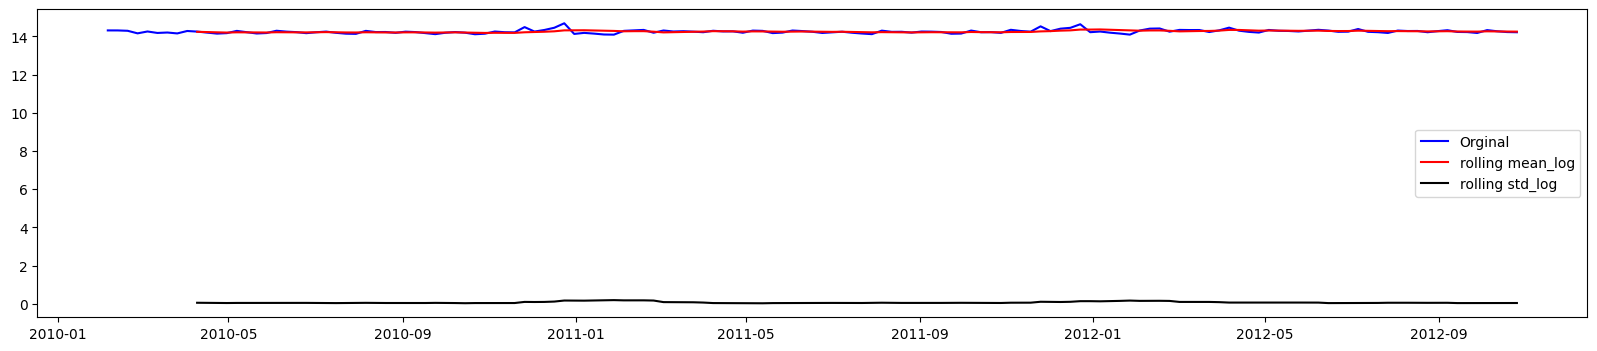

In [165]:
# After the log transformation to the data we are comparing the actual data with rolling mean and standard deviation
mean_log = df_log.rolling(window = 10).mean()
std_log = df_log.rolling(window = 10).std()
plt.figure(figsize=(20,4))
plt.plot(df_log,color= 'blue',label = 'Orginal')
plt.plot(mean_log, color = 'red', label = 'rolling mean_log')
plt.plot(std_log, color = 'black', label = 'rolling std_log')
plt.legend(loc = 'best')
plt.show()

In [166]:
# subtracting the log data and mean log data,
# can help in stabilizing the variance of the data, which is a common requirement for many time series modeling techniques.
df_new = df_log - mean_log
df_new.head(20)

Weekly_Sales
Date                    
2010-02-05           NaN
2010-02-12           NaN
2010-02-19           NaN
2010-02-26           NaN
2010-03-05           NaN
2010-03-12           NaN
2010-03-19           NaN
2010-03-26           NaN
2010-04-02           NaN
2010-04-09      0.010483
2010-04-16     -0.030797
2010-04-23     -0.066599
2010-04-30     -0.030243
2010-05-07      0.075080
2010-05-14      0.008205
2010-05-21     -0.054380
2010-05-28     -0.028705
2010-06-04      0.077831
2010-06-11      0.034957
2010-06-18      0.011929

In [167]:
df_new.dropna(inplace = True) # dropping the nan values

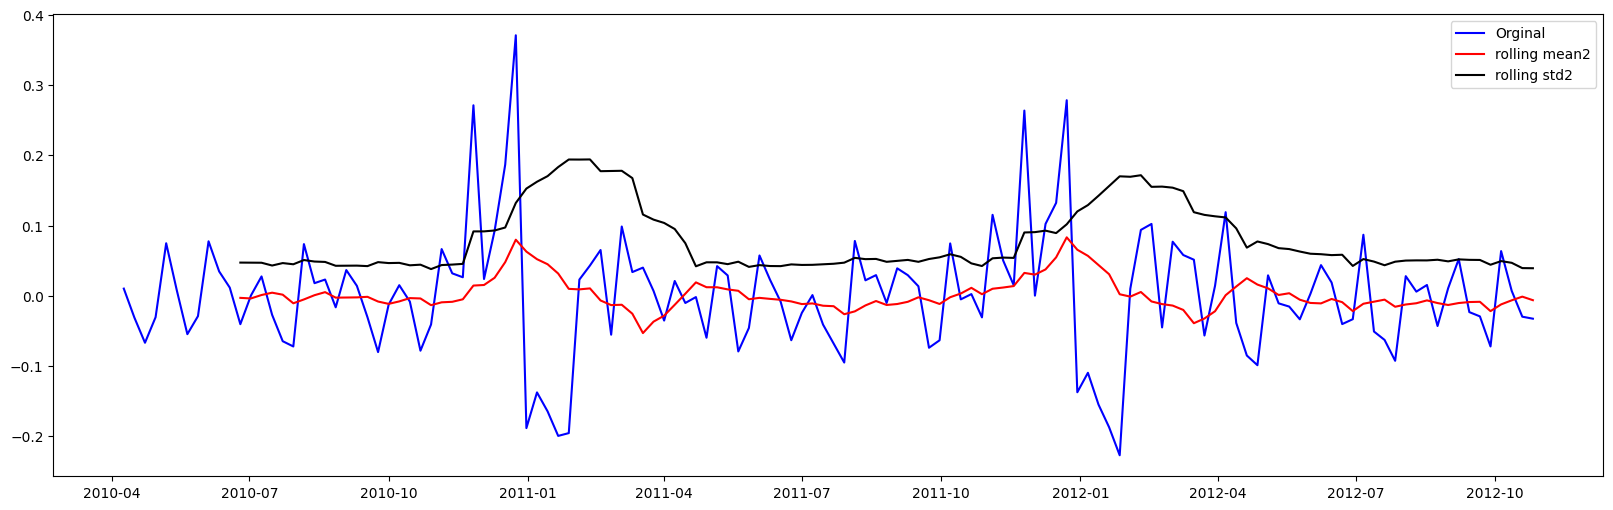

In [168]:
# after the log transformation checking rolling stastics such as mean and standard deviation
mean2 = df_new.rolling(window = 12).mean()
std2 = df_new.rolling(window = 12).std()

plt.figure(figsize=(20,6))
plt.plot(df_new,color= 'blue',label = 'Orginal')
plt.plot(mean2, color = 'red', label = 'rolling mean2')
plt.plot(std2, color = 'black', label = 'rolling std2')
plt.legend(loc = 'best')
plt.show()

In [169]:
adf_test(df_new['Weekly_Sales'],title='ADF TEST') # Checking the Data stationarity again after the log transformation

Augmented Dickey-Fuller Test: ADF TEST
ADF test statistic     -6.668147e+00
p-value                 4.660760e-09
# lags used             4.000000e+00
# observations          1.290000e+02
critical value (1%)    -3.482088e+00
critical value (5%)    -2.884219e+00
critical value (10%)   -2.578864e+00
Rejects the null hypothesis
Data has no unit root and is stationary


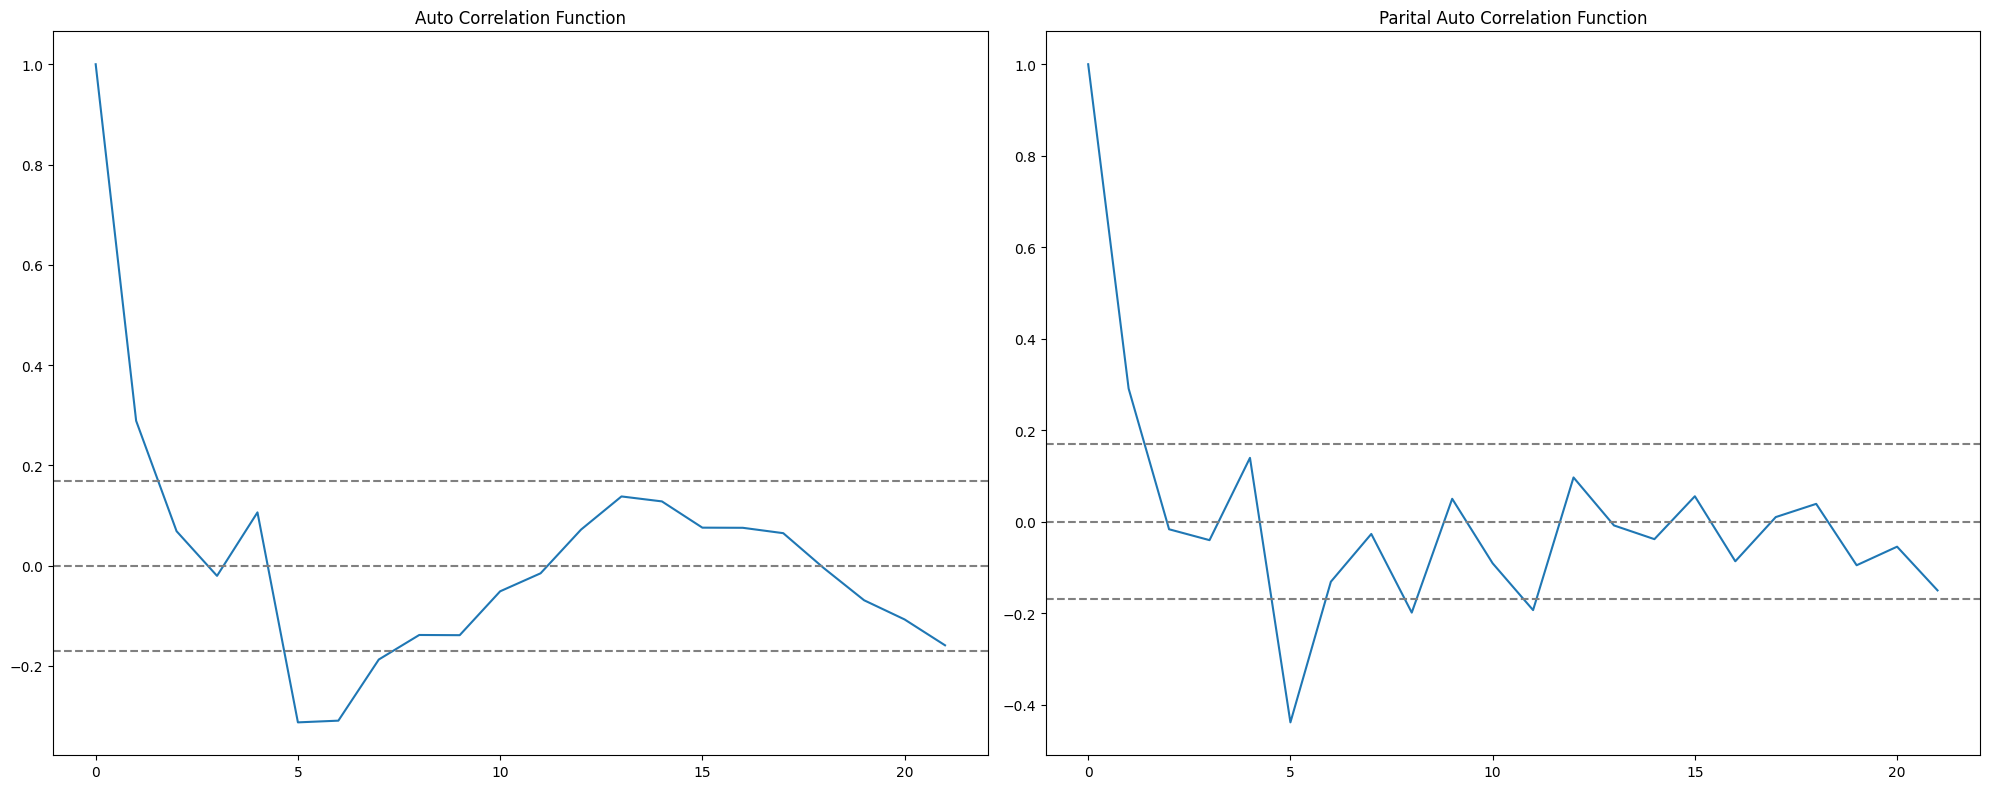

In [170]:
# plotting the acf and pacf plot to identify the values of P AND Q
from statsmodels.tsa.stattools import acf,pacf
lag_acf=acf(df_new)
lag_pacf=pacf(df_new)


# Plot ACf
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.title('Auto Correlation Function')
plt.tight_layout()

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.title('Parital Auto Correlation Function')
plt.tight_layout()

In [171]:
p, d, q = 2, 1, 2  # I have got pdq values as 2,2,2
model = ARIMA(df_new, order=(p, d, q))# fitting the model
arima_result = model.fit()

# Get predictions on historical data
predictions = arima_result.predict()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


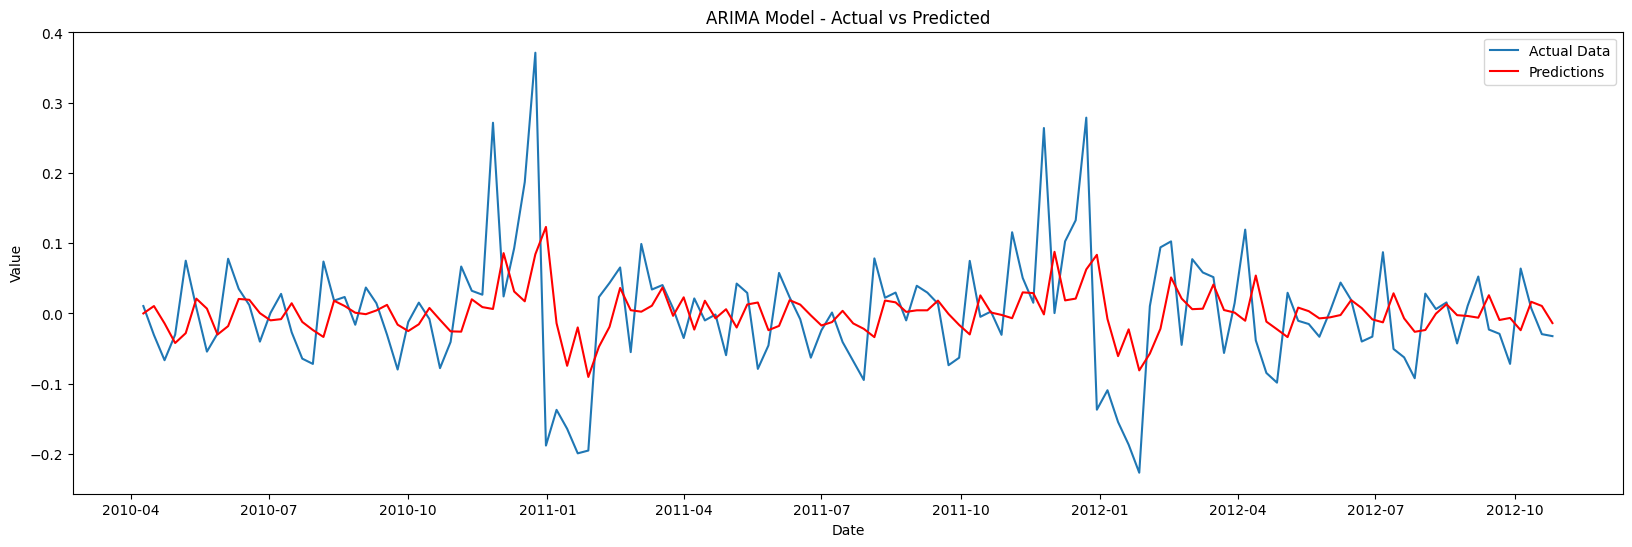

In [172]:
plt.figure(figsize=(20,6))
plt.plot(df_new, label='Actual Data')
plt.plot(predictions, color='red', label='Predictions')
plt.title('ARIMA Model - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [173]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(df_new,predictions)
print(f'Mean Squared_Error  {mse}')

Mean Squared_Error  0.006983015956012575


In [174]:
rmse=np.sqrt(mse)
print(f'Root Mean Squared_Error  {rmse}')

Root Mean Squared_Error  0.0835644419356258


In [175]:
forecast_steps = 12
forecast = arima_result.forecast(steps=forecast_steps)

In [176]:
end_date_actual_data = '2012-12-10' # here i need to find my dataset end date. so that i can continue from there to next 12 weeks

# Generate dates for the forecasted period
# with the help of datetime function iam creating a time span of 12 weeks
forecast_start_date = pd.to_datetime(end_date_actual_data) + pd.DateOffset(weeks=0)
forecast_end_date = forecast_start_date + pd.DateOffset(weeks=len(forecast))
forecast_dates = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='W')

In [177]:
forecast_dates

DatetimeIndex(['2012-12-16', '2012-12-23', '2012-12-30', '2013-01-06',
               '2013-01-13', '2013-01-20', '2013-01-27', '2013-02-03',
               '2013-02-10', '2013-02-17', '2013-02-24', '2013-03-03'],
              dtype='datetime64[ns]', freq='W-SUN')

In [178]:
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted_Sales': forecast})

In [179]:
forecast_df.set_index('Date',inplace=True)

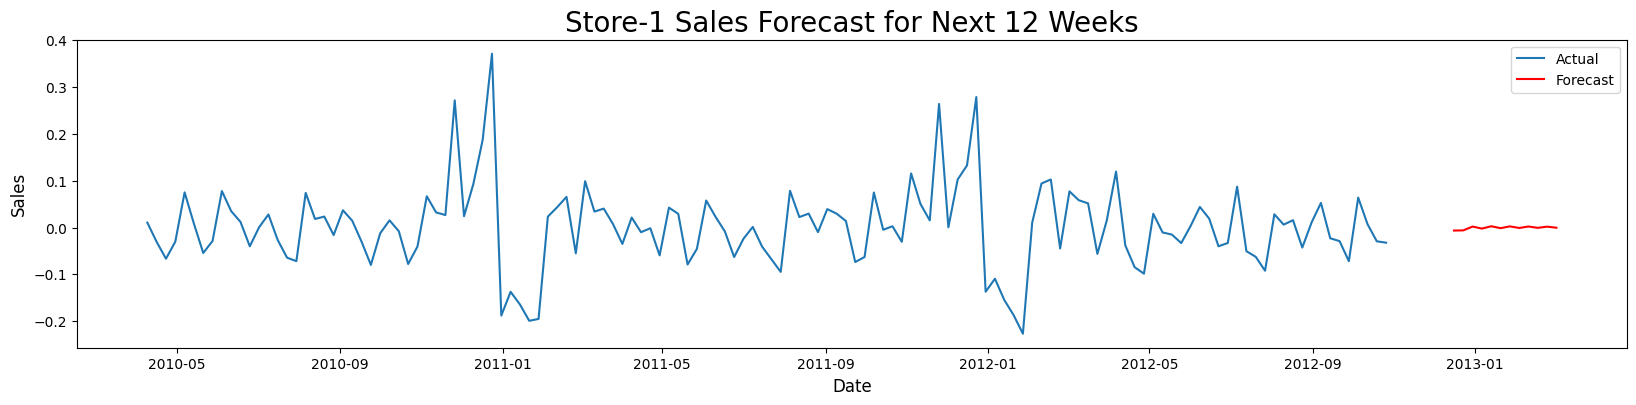

In [180]:
plt.figure(figsize=(20, 4))
plt.plot(df_new, label='Actual')
plt.plot(forecast_df, label='Forecast', color='red')
plt.title('Store-1 Sales Forecast for Next 12 Weeks',fontsize=20)
plt.xlabel('Date',fontsize=12)
plt.ylabel('Sales',fontsize=12)
plt.legend()
plt.show()

In [181]:
# Checking the Model Accuracy once again
rmse=np.sqrt(mse)
print(f'Root Mean Squared_Error {rmse}')

Root Mean Squared_Error 0.0835644419356258


**_______________________________________________________________________________________________________________________**
## Store 6 Sales Forecast

In [182]:
# Creating a new data frame for store 6 sales forecast
store6_sales=df[df['Store']==6].groupby('Date')['Weekly_Sales'].sum().reset_index()

In [183]:
store6_sales.set_index('Date',inplace=True) # Setting the date as index

In [184]:
adf_test(store6_sales['Weekly_Sales'],title='ADF TEST') # Checking the pvalue and data stationarity

Augmented Dickey-Fuller Test: ADF TEST
ADF test statistic       -5.494236
p-value                   0.000002
# lags used               4.000000
# observations          138.000000
critical value (1%)      -3.478648
critical value (5%)      -2.882722
critical value (10%)     -2.578065
Rejects the null hypothesis
Data has no unit root and is stationary


In [185]:
decomposition=seasonal_decompose(store6_sales['Weekly_Sales'],period=13)# plotting the components of time series data

Figure(640x480)


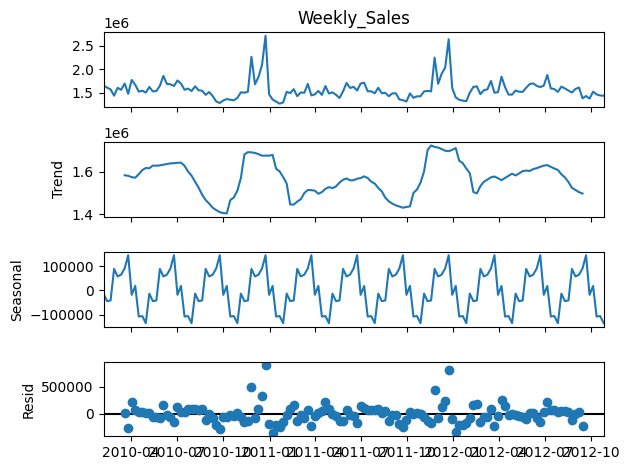

In [186]:
print(decomposition.plot())

In [187]:
mean1=store6_sales.rolling(window=10).mean() # Creating the Rolling mean
std1=store6_sales.rolling(window=10).std() # Creating the Rolling standard deviation

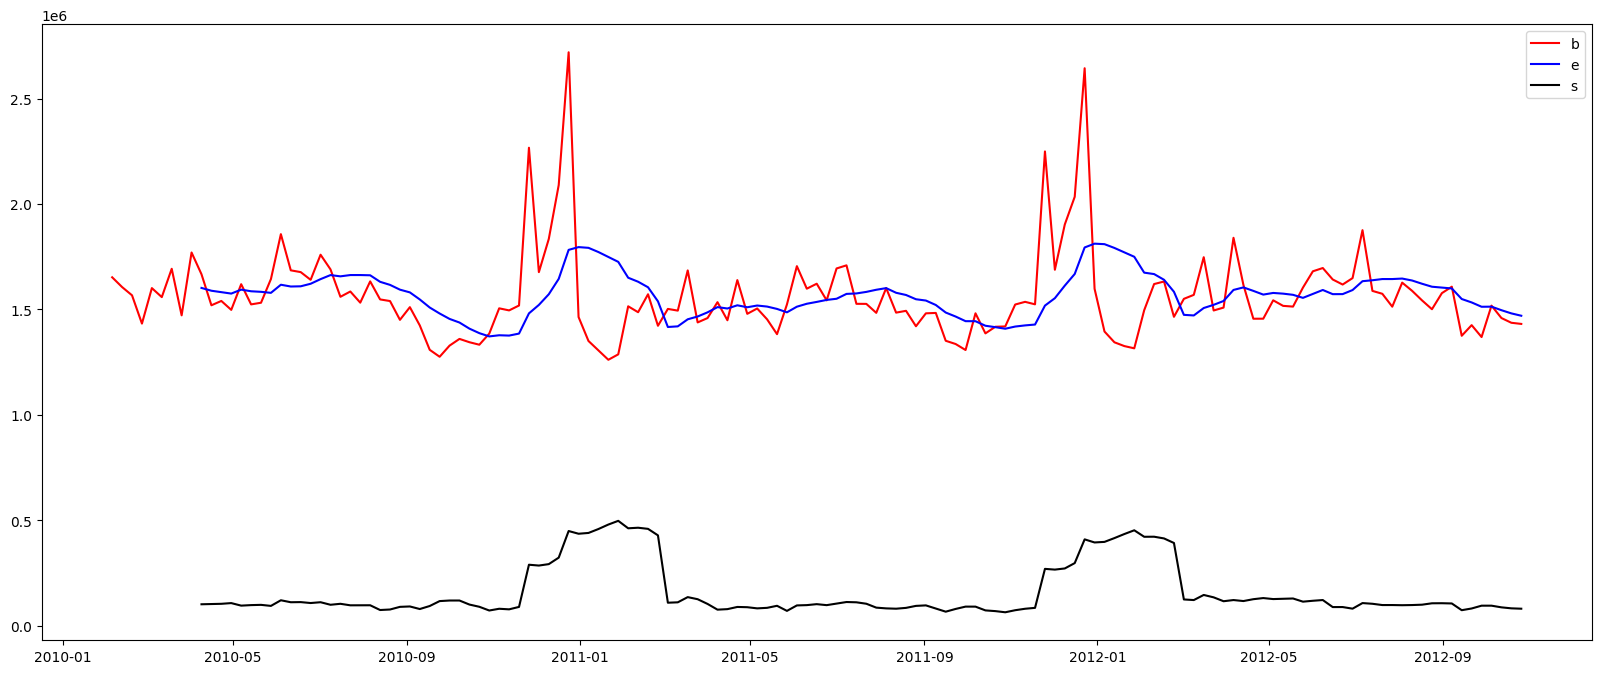

In [188]:
# plotting the rolling mean
plt.figure(figsize=(20,8))
orig=plt.plot(store6_sales['Weekly_Sales'],color='red',label='Original')
mean=plt.plot(mean1,color='blue',label='Rolling Mean')
std=plt.plot(std1,color='black',label='Rolling Std')
plt.legend('best')
plt.show(block=False)

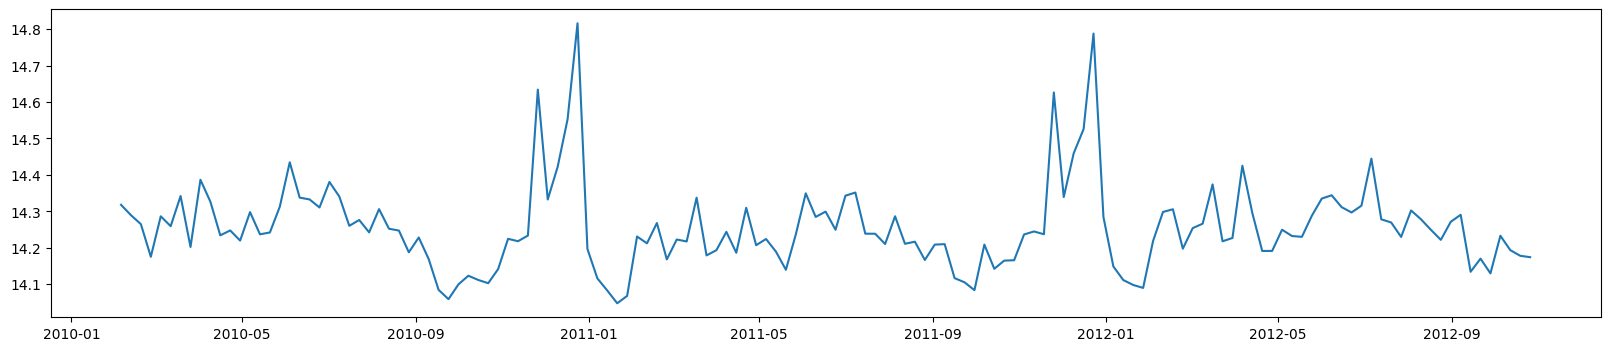

In [189]:
df_log = np.log(store6_sales)# applaying log transformation to the data
plt.figure(figsize=(20,4))
plt.plot(df_log)

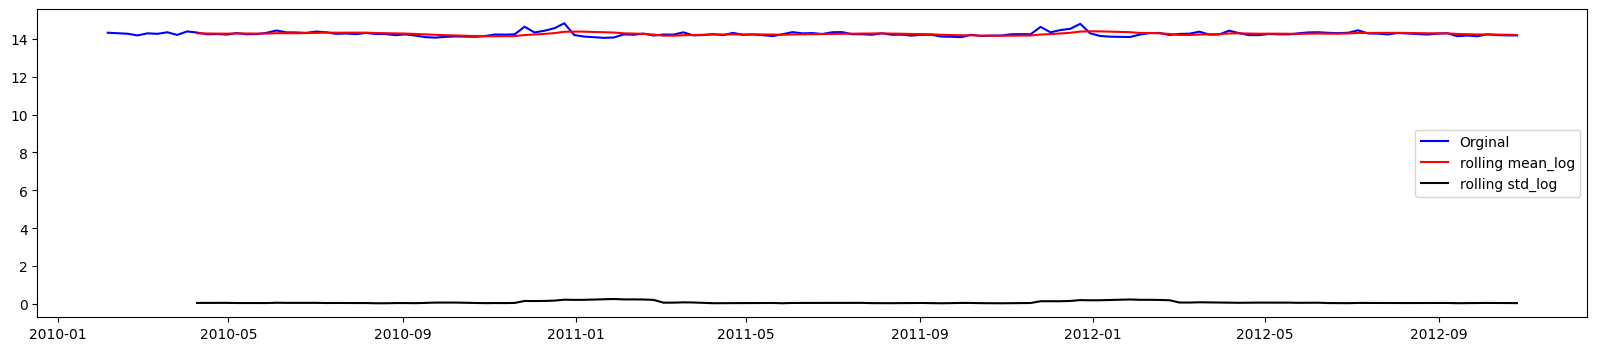

In [190]:
# After the log transformation to the data we are comparing the actual data with rolling mean and standard deviation
mean_log = df_log.rolling(window = 10).mean()
std_log = df_log.rolling(window = 10).std()
plt.figure(figsize=(20,4))
plt.plot(df_log,color= 'blue',label = 'Orginal')
plt.plot(mean_log, color = 'red', label = 'rolling mean_log')
plt.plot(std_log, color = 'black', label = 'rolling std_log')
plt.legend(loc = 'best')
plt.show()

In [191]:
# subtracting the log data and mean log data,
# can help in stabilizing the variance of the data, which is a common requirement for many time series modeling techniques.
df_new = df_log - mean_log
df_new.head(20)

Weekly_Sales
Date                    
2010-02-05           NaN
2010-02-12           NaN
2010-02-19           NaN
2010-02-26           NaN
2010-03-05           NaN
2010-03-12           NaN
2010-03-19           NaN
2010-03-26           NaN
2010-04-02           NaN
2010-04-09      0.041593
2010-04-16     -0.042556
2010-04-23     -0.024914
2010-04-30     -0.048289
2010-05-07      0.017640
2010-05-14     -0.038413
2010-05-21     -0.031529
2010-05-28      0.042267
2010-06-04      0.140763
2010-06-11      0.048651
2010-06-18      0.043051

In [192]:
df_new.dropna(inplace = True) # dropping the nan values

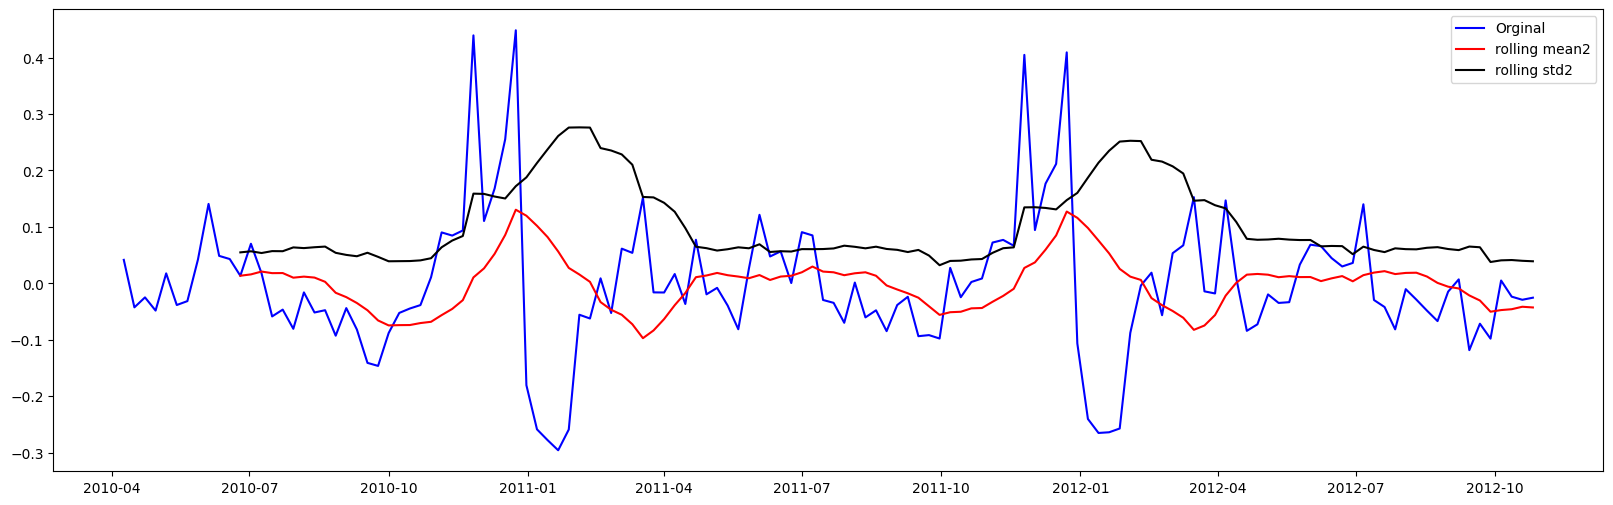

In [193]:
# after the log transformation checking rolling stastics such as mean and standard deviation
mean2 = df_new.rolling(window = 12).mean()
std2 = df_new.rolling(window = 12).std()

plt.figure(figsize=(20,6))
plt.plot(df_new,color= 'blue',label = 'Orginal')
plt.plot(mean2, color = 'red', label = 'rolling mean2')
plt.plot(std2, color = 'black', label = 'rolling std2')
plt.legend(loc = 'best')
plt.show()

In [194]:
adf_test(df_new['Weekly_Sales'],title='ADF TEST') # Checking the Data stationarity again after the log transformation

Augmented Dickey-Fuller Test: ADF TEST
ADF test statistic     -6.179317e+00
p-value                 6.513364e-08
# lags used             4.000000e+00
# observations          1.290000e+02
critical value (1%)    -3.482088e+00
critical value (5%)    -2.884219e+00
critical value (10%)   -2.578864e+00
Rejects the null hypothesis
Data has no unit root and is stationary


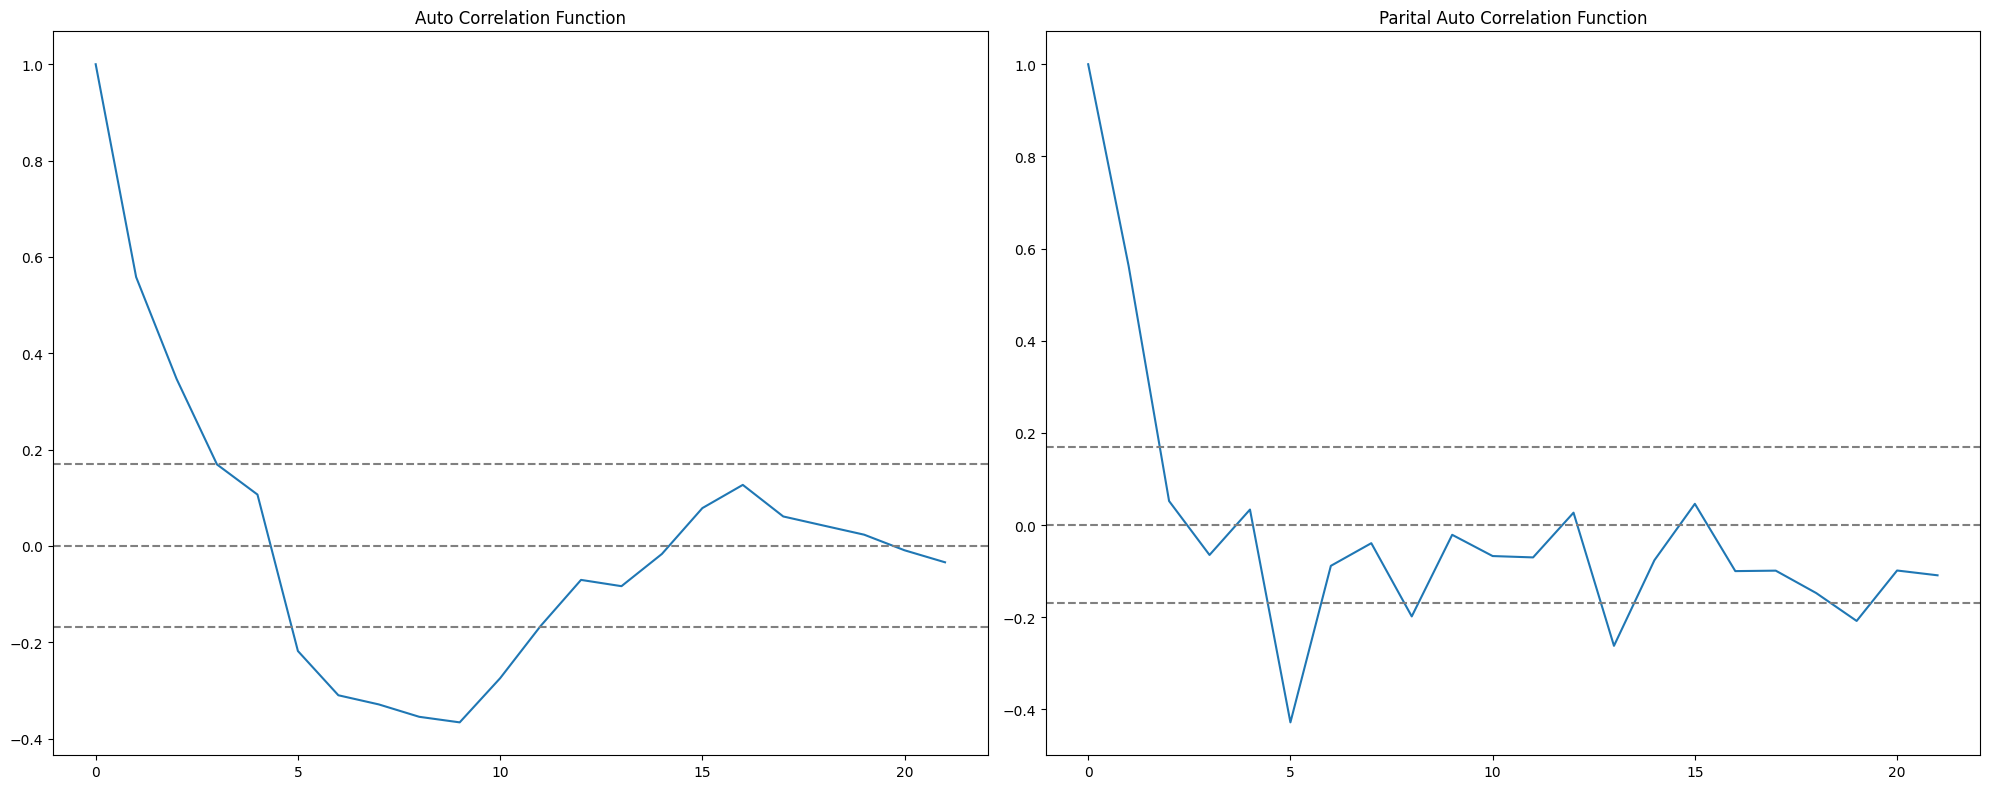

In [195]:
# plotting the acf and pacf plot to identify the values of P AND Q
from statsmodels.tsa.stattools import acf,pacf
lag_acf=acf(df_new)
lag_pacf=pacf(df_new)


# Plot ACf
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.title('Auto Correlation Function')
plt.tight_layout()

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.title('Parital Auto Correlation Function')
plt.tight_layout()

In [ ]:
#pdq values are 4,1,3
p, d, q = 4, 1, 3  # I have got pdq values as 2,2,2
model = ARIMA(df_new, order=(p, d, q))# fitting the model
arima_result = model.fit()

# Get predictions on historical data
predictions = arima_result.predict()

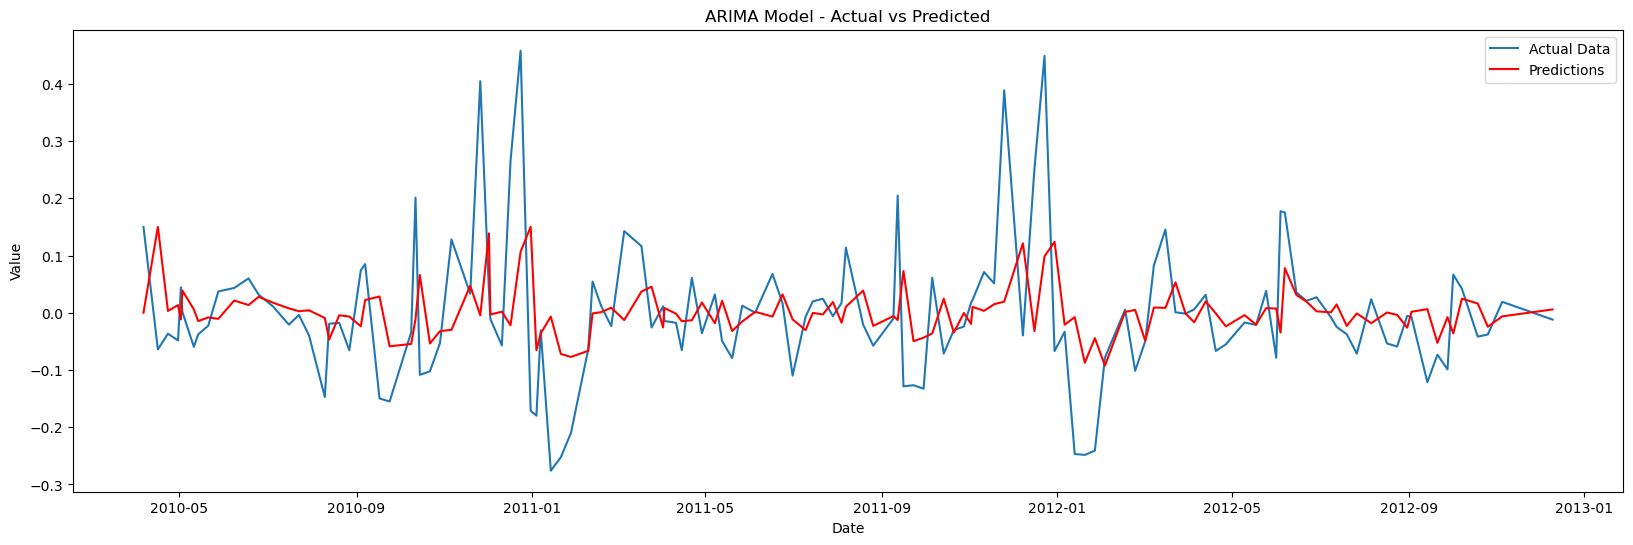

In [ ]:
# Plotting the actual and predictions
plt.figure(figsize=(20,6))
plt.plot(df_new, label='Actual Data')
plt.plot(predictions, color='red', label='Predictions')
plt.title('ARIMA Model - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
mse=mean_squared_error(df_new,predictions) # Checking the accuracy of the model with mse
print(f'Mean Squared_Error  {mse}')

Mean Squared_Error  0.013511761784856139


In [ ]:
rmse=np.sqrt(mse) # Checking the accuracy of the model with rmse
print(f'Root Mean Squared_Error  {rmse}')

Root Mean Squared_Error  0.11624010402978888


In [ ]:
forecast_steps = 12 # Forcasting the for the next 12 weeks
forecast = arima_result.forecast(steps=forecast_steps)

In [ ]:
end_date_actual_data = '2012-12-10' # here i need to find my dataset end date. so that i can continue from there to next 12 weeks

# Generate dates for the forecasted period
# with the help of datetime function iam creating a time span of 12 weeks
forecast_start_date = pd.to_datetime(end_date_actual_data) + pd.DateOffset(weeks=0)
forecast_end_date = forecast_start_date + pd.DateOffset(weeks=len(forecast))
forecast_dates = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='W')

In [ ]:
# creating a dataframe with forecasted sales and next 12 weeks dates
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted_Sales': forecast})

In [ ]:
forecast_df.set_index('Date',inplace=True) # setting the date as an index

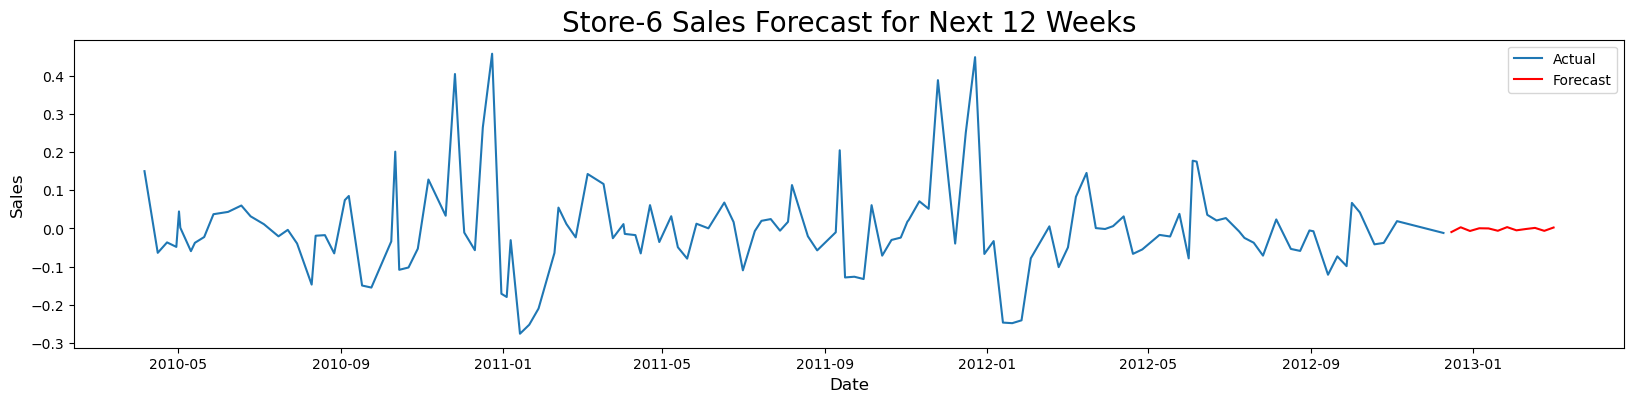

In [ ]:
plt.figure(figsize=(20, 4))# plotting the actual and forcaste sales for next 12 weeks
plt.plot(df_new, label='Actual')
plt.plot(forecast_df, label='Forecast', color='red')
plt.title('Store-6 Sales Forecast for Next 12 Weeks',fontsize=20)
plt.xlabel('Date',fontsize=12)
plt.ylabel('Sales',fontsize=12)
plt.legend()
plt.show()

In [ ]:
# Checking the Model Accuracy once again
rmse=np.sqrt(mse)
print(f'Root Mean Squared_Error {rmse}')

Root Mean Squared_Error 0.11624010402978888


**_______________________________________________________________________________________________________________________**
## Store 11th Sales Prediction

In [ ]:
# Creating a new data frame for store 11 sales forecast
store11_sales=df[df['Store']==11].groupby('Date')['Weekly_Sales'].sum().reset_index()

In [ ]:
store11_sales.set_index('Date',inplace=True) # Setting the date as index

In [ ]:
adf_test(store11_sales['Weekly_Sales'],title='ADF TEST') # Checking the pvalue and data stationarity

Augmented Dickey-Fuller Test: ADF TEST
ADF test statistic     -9.275603e+00
p-value                 1.291542e-15
# lags used             0.000000e+00
# observations          1.420000e+02
critical value (1%)    -3.477262e+00
critical value (5%)    -2.882118e+00
critical value (10%)   -2.577743e+00
Rejects the null hypothesis
Data has no unit root and is stationary


In [ ]:
decomposition=seasonal_decompose(store11_sales['Weekly_Sales'],period=13)# plotting the components of time series data

Figure(640x480)


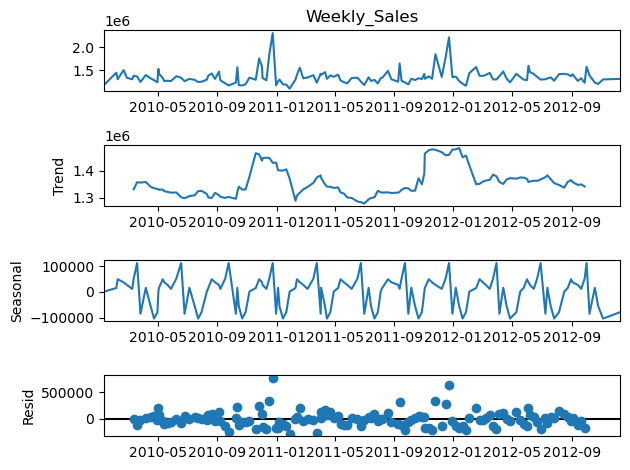

In [ ]:
print(decomposition.plot())

In [ ]:
mean1=store11_sales.rolling(window=10).mean() # Creating the Rolling mean
std1=store11_sales.rolling(window=10).std() # Creating the Rolling standard deviation

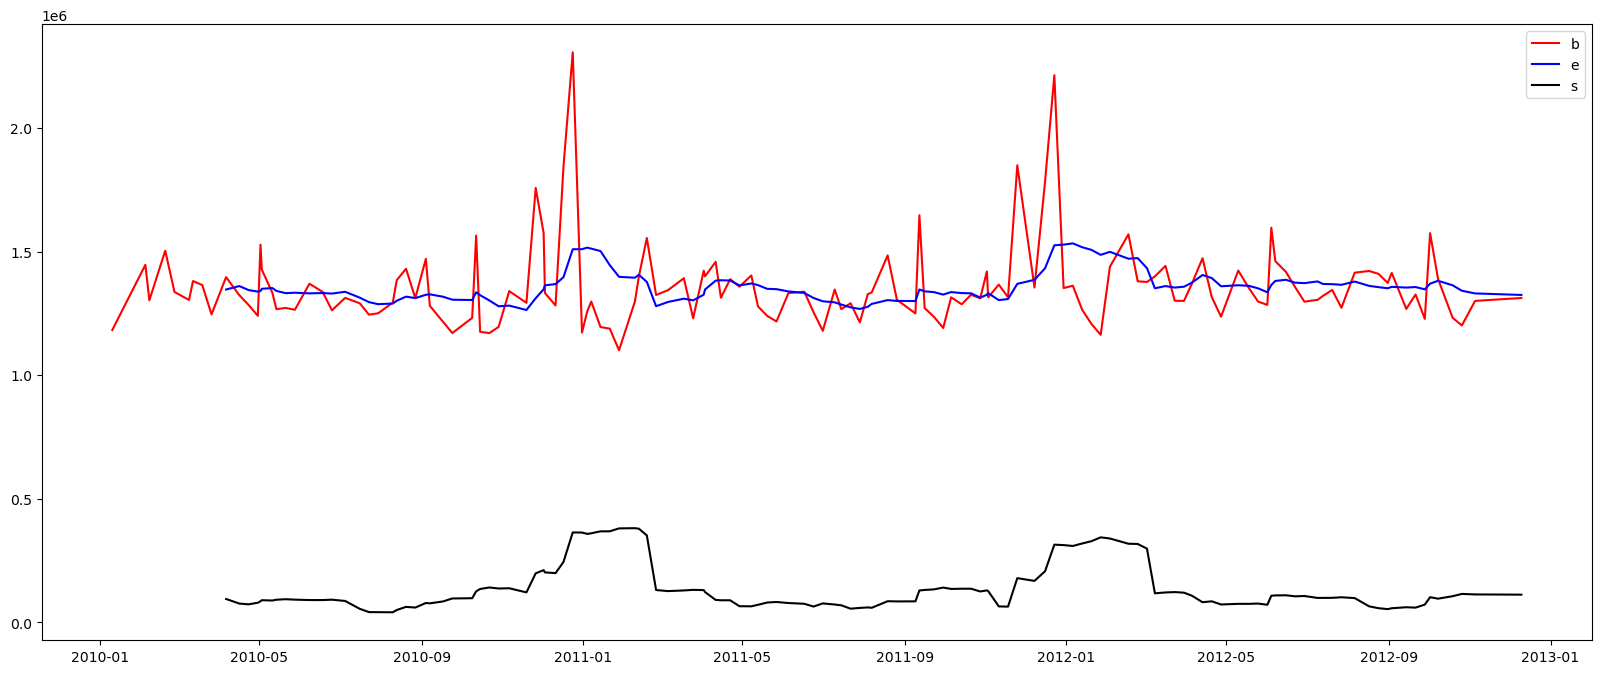

In [ ]:
# plotting the rolling mean
plt.figure(figsize=(20,8))
orig=plt.plot(store11_sales['Weekly_Sales'],color='red',label='Original')
mean=plt.plot(mean1,color='blue',label='Rolling Mean')
std=plt.plot(std1,color='black',label='Rolling Std')
plt.legend('best')
plt.show(block=False)

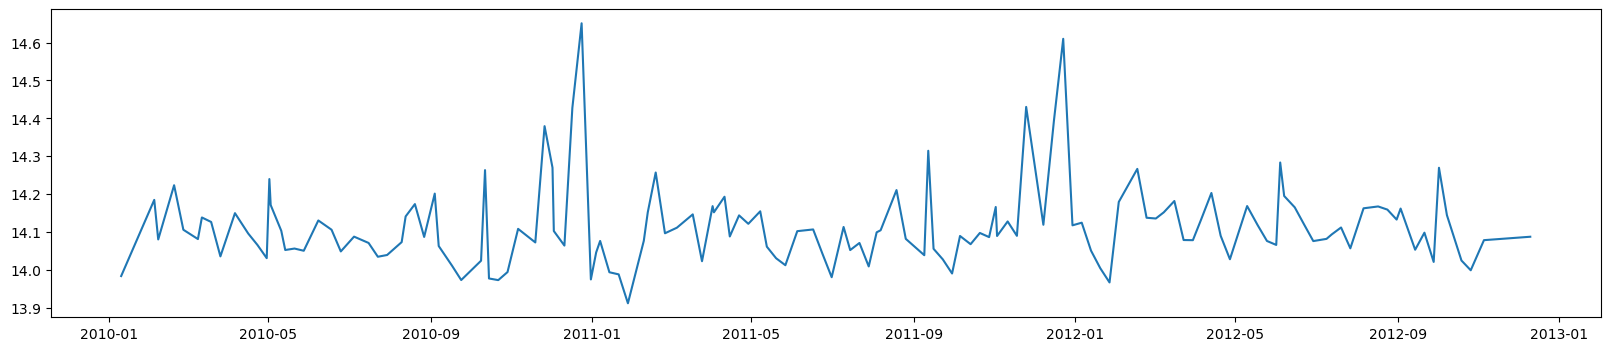

In [ ]:
df_log = np.log(store11_sales)# applaying log transformation to the data
plt.figure(figsize=(20,4))
plt.plot(df_log)

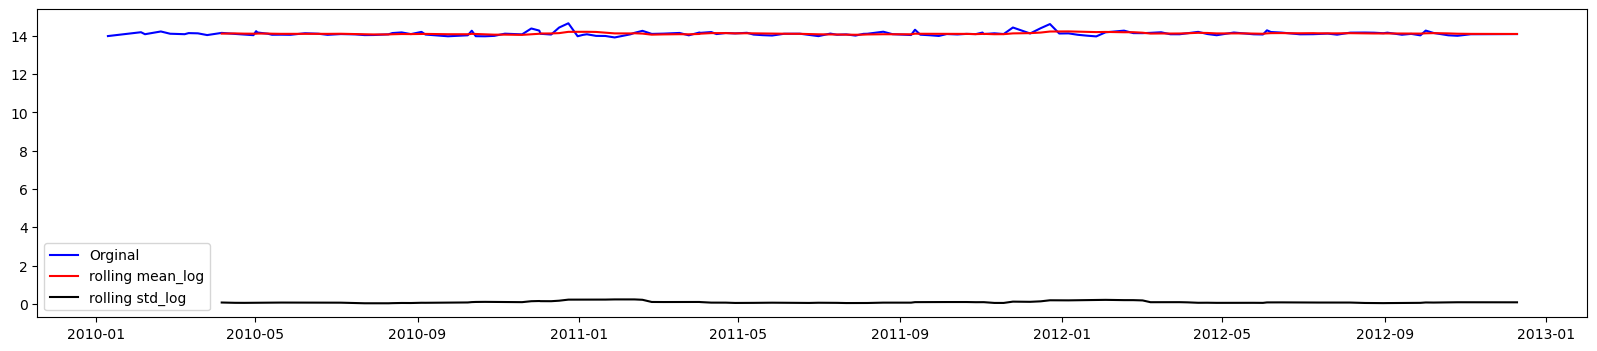

In [ ]:
# After the log transformation to the data we are comparing the actual data with rolling mean and standard deviation
mean_log = df_log.rolling(window = 10).mean()
std_log = df_log.rolling(window = 10).std()
plt.figure(figsize=(20,4))
plt.plot(df_log,color= 'blue',label = 'Orginal')
plt.plot(mean_log, color = 'red', label = 'rolling mean_log')
plt.plot(std_log, color = 'black', label = 'rolling std_log')
plt.legend(loc = 'best')
plt.show()

In [ ]:
# subtracting the log data and mean log data,
# can help in stabilizing the variance of the data, which is a common requirement for many time series modeling techniques.
df_new = df_log - mean_log
df_new.head(20)

Weekly_Sales
Date                    
2010-01-10           NaN
2010-02-04           NaN
2010-02-07           NaN
2010-02-19           NaN
2010-02-26           NaN
2010-03-09           NaN
2010-03-12           NaN
2010-03-19           NaN
2010-03-26           NaN
2010-04-06      0.038796
2010-04-16     -0.026207
2010-04-23     -0.044579
2010-04-30     -0.074510
2010-05-02      0.132901
2010-05-03      0.057713
2010-05-11     -0.012533
2010-05-14     -0.054697
2010-05-21     -0.043849
2010-05-28     -0.051151
2010-06-08      0.030826

In [ ]:
df_new.dropna(inplace = True) # dropping the nan values

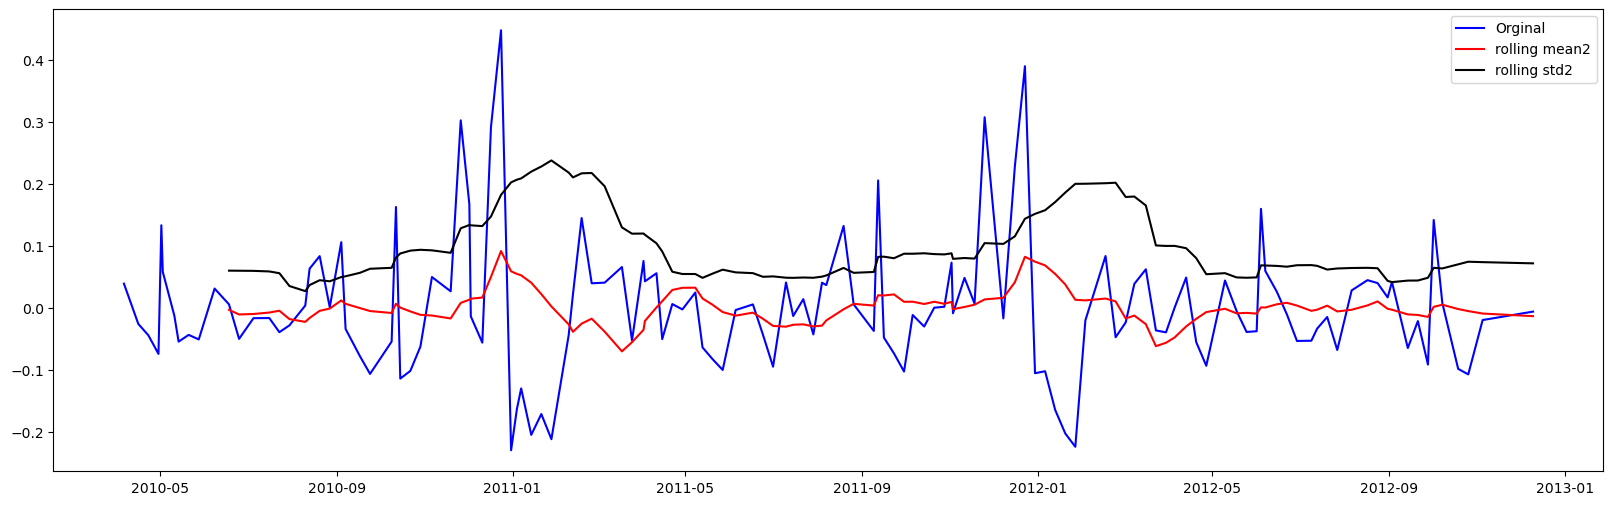

In [ ]:
# after the log transformation checking rolling stastics such as mean and standard deviation
mean2 = df_new.rolling(window = 12).mean()
std2 = df_new.rolling(window = 12).std()

plt.figure(figsize=(20,6))
plt.plot(df_new,color= 'blue',label = 'Orginal')
plt.plot(mean2, color = 'red', label = 'rolling mean2')
plt.plot(std2, color = 'black', label = 'rolling std2')
plt.legend(loc = 'best')
plt.show()

In [ ]:
adf_test(df_new['Weekly_Sales'],title='ADF TEST') # Checking the Data stationarity again after the log transformation

Augmented Dickey-Fuller Test: ADF TEST
ADF test statistic     -6.013785e+00
p-value                 1.550978e-07
# lags used             7.000000e+00
# observations          1.260000e+02
critical value (1%)    -3.483346e+00
critical value (5%)    -2.884766e+00
critical value (10%)   -2.579156e+00
Rejects the null hypothesis
Data has no unit root and is stationary


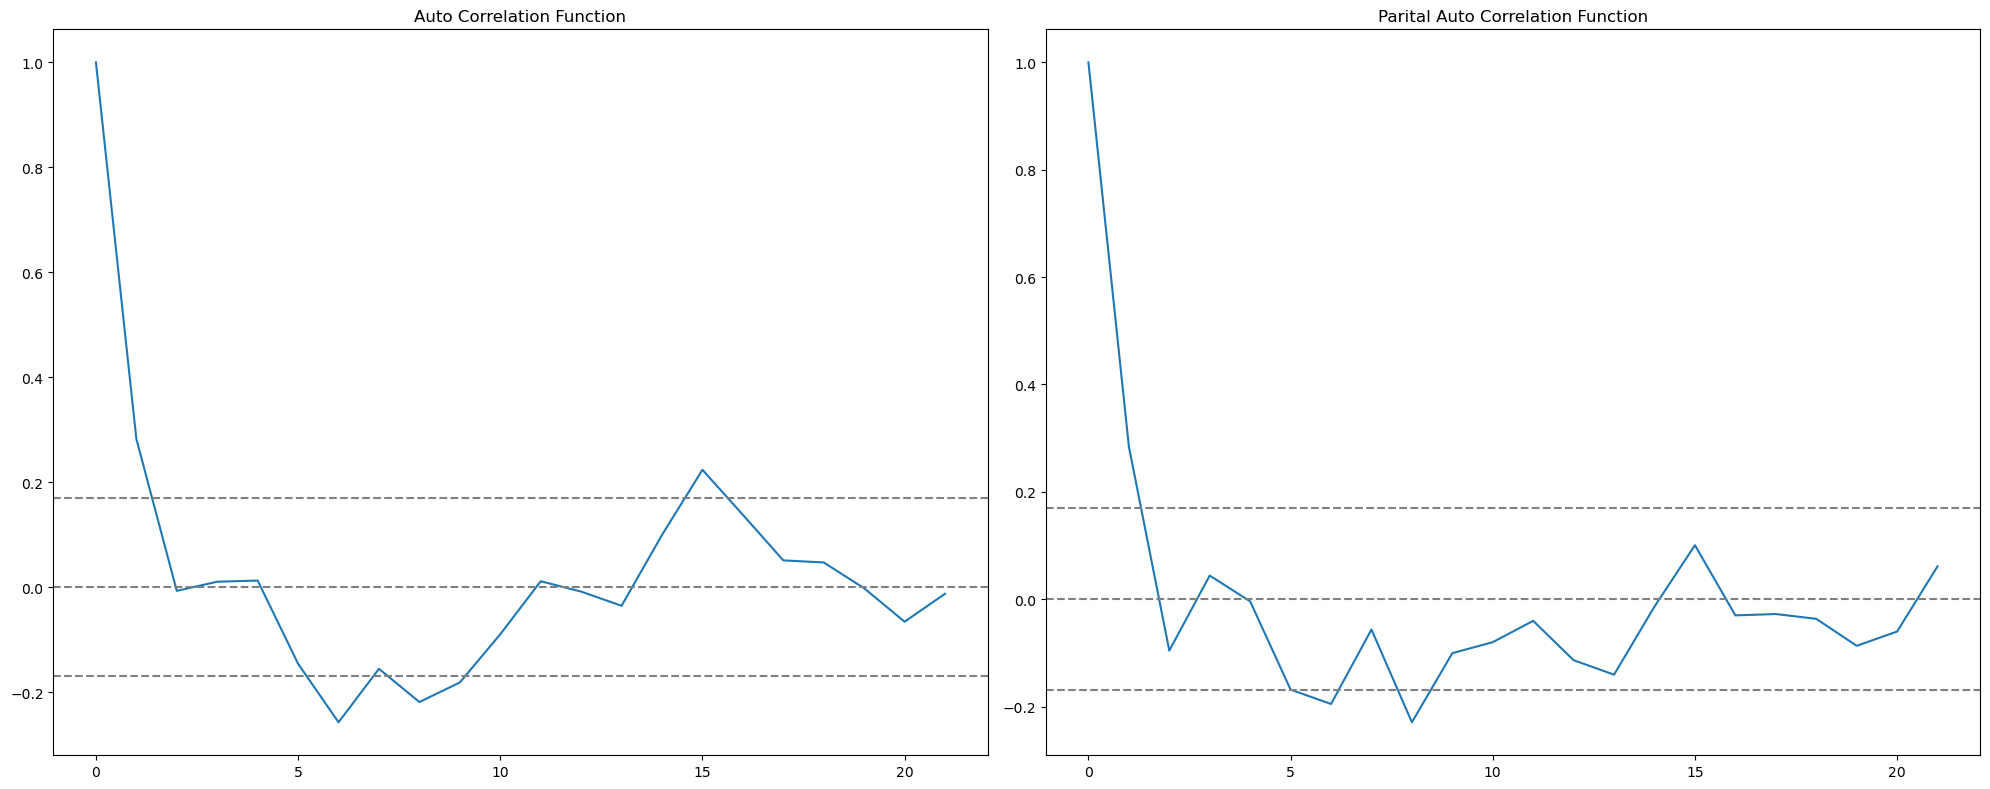

In [ ]:
# plotting the acf and pacf plot to identify the values of P AND Q
from statsmodels.tsa.stattools import acf,pacf
lag_acf=acf(df_new)
lag_pacf=pacf(df_new)


# Plot ACf
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.title('Auto Correlation Function')
plt.tight_layout()

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.title('Parital Auto Correlation Function')
plt.tight_layout()

In [ ]:
#pdq values are 3,1,2
p, d, q = 3, 1, 2  # I have got pdq values as 2,2,2
model = ARIMA(df_new, order=(p, d, q))# fitting the model
arima_result = model.fit()

# Get predictions on historical data
predictions = arima_result.predict()

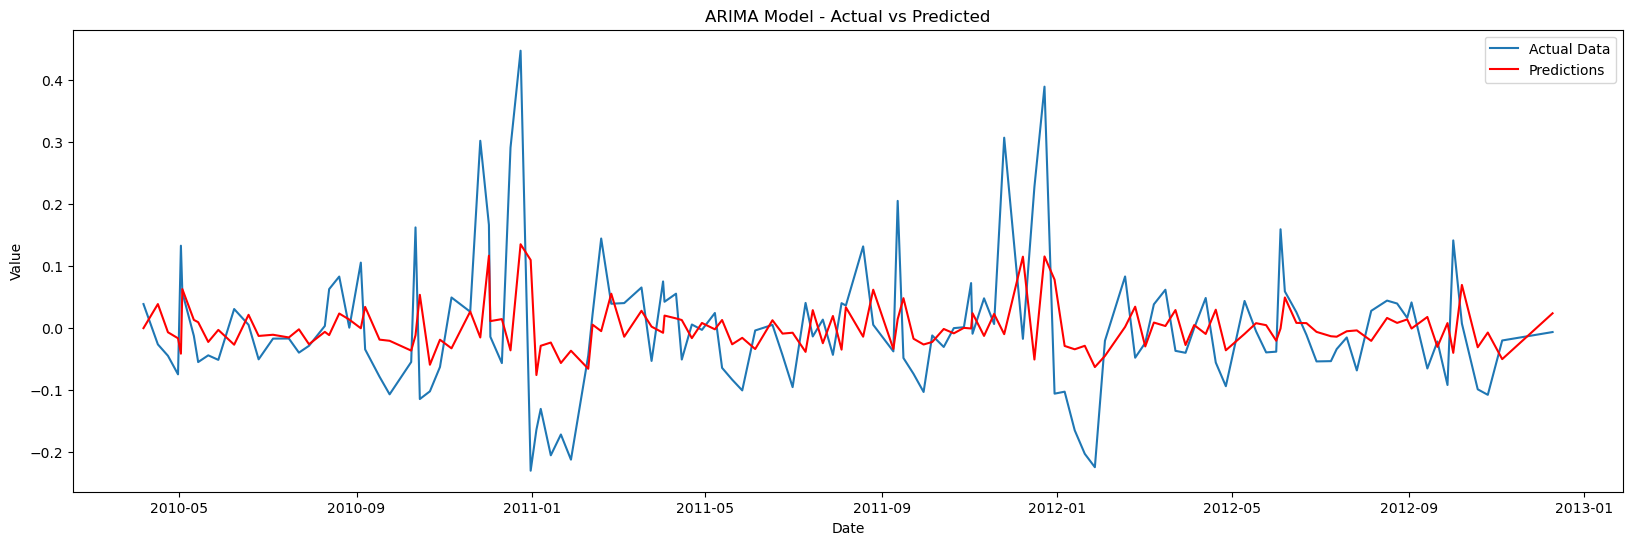

In [ ]:
# Plotting the actual and predictions
plt.figure(figsize=(20,6))
plt.plot(df_new, label='Actual Data')
plt.plot(predictions, color='red', label='Predictions')
plt.title('ARIMA Model - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
mse=mean_squared_error(df_new,predictions) # Checking the accuracy of the model with mse
print(f'Mean Squared_Error  {mse}')

Mean Squared_Error  0.01045270009607117


In [ ]:
rmse=np.sqrt(mse) # Checking the accuracy of the model with rmse
print(f'Root Mean Squared_Error  {rmse}')

Root Mean Squared_Error  0.10223844724990286


In [ ]:
forecast_steps = 12 # Forcasting the for the next 12 weeks
forecast = arima_result.forecast(steps=forecast_steps)

In [ ]:
end_date_actual_data = '2012-12-10' # here i need to find my dataset end date. so that i can continue from there to next 12 weeks

# Generate dates for the forecasted period
# with the help of datetime function iam creating a time span of 12 weeks
forecast_start_date = pd.to_datetime(end_date_actual_data) + pd.DateOffset(weeks=0)
forecast_end_date = forecast_start_date + pd.DateOffset(weeks=len(forecast))
forecast_dates = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='W')

In [ ]:
# creating a dataframe with forecasted sales and next 12 weeks dates
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted_Sales': forecast})

In [ ]:
forecast_df.set_index('Date',inplace=True) # setting the date as an index

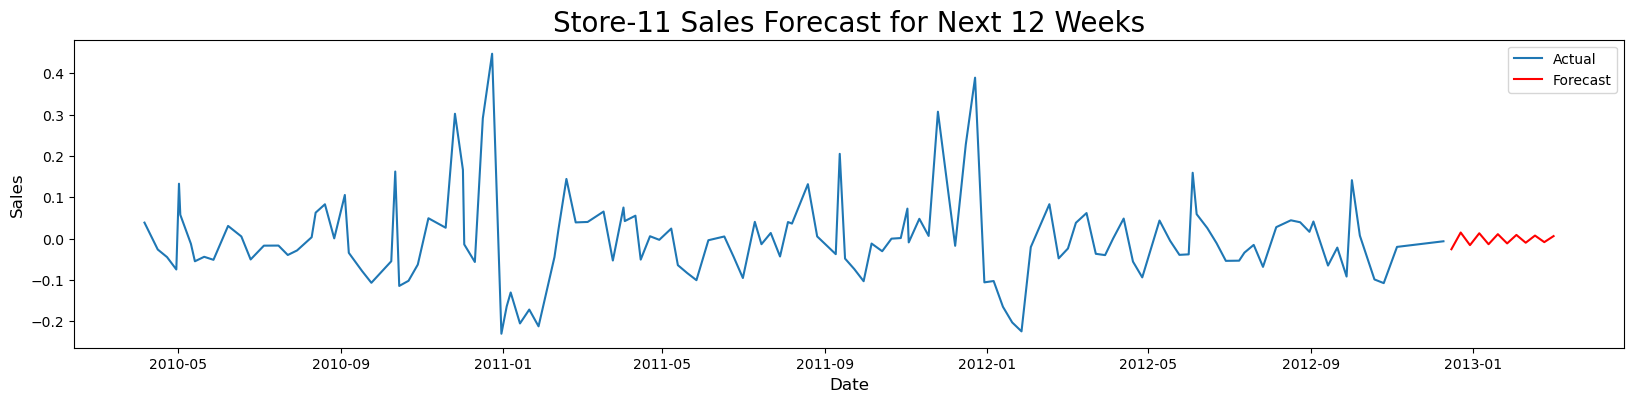

In [ ]:
plt.figure(figsize=(20, 4))# plotting the actual and forcaste sales for next 12 weeks
plt.plot(df_new, label='Actual')
plt.plot(forecast_df, label='Forecast', color='red')
plt.title('Store-11 Sales Forecast for Next 12 Weeks',fontsize=20)
plt.xlabel('Date',fontsize=12)
plt.ylabel('Sales',fontsize=12)
plt.legend()
plt.show()

In [ ]:
# Checking the Model Accuracy once again
rmse=np.sqrt(mse)
print(f'Root Mean Squared_Error {rmse}')

Root Mean Squared_Error 0.10223844724990286


**_______________________________________________________________________________________________________________________**
## Store 17th Sales Prediction

In [ ]:
# Creating a new data frame for store 11 sales forecast
store17_sales=df[df['Store']==17].groupby('Date')['Weekly_Sales'].sum().reset_index()

In [ ]:
store17_sales.set_index('Date',inplace=True) # Setting the date as index

In [ ]:
adf_test(store17_sales['Weekly_Sales'],title='ADF TEST') # Checking the pvalue and data stationarity

Augmented Dickey-Fuller Test: ADF TEST
ADF test statistic       -4.812027
p-value                   0.000052
# lags used               2.000000
# observations          140.000000
critical value (1%)      -3.477945
critical value (5%)      -2.882416
critical value (10%)     -2.577902
Rejects the null hypothesis
Data has no unit root and is stationary


In [ ]:
decomposition=seasonal_decompose(store17_sales['Weekly_Sales'],period=13)# plotting the components of time series data

Figure(640x480)


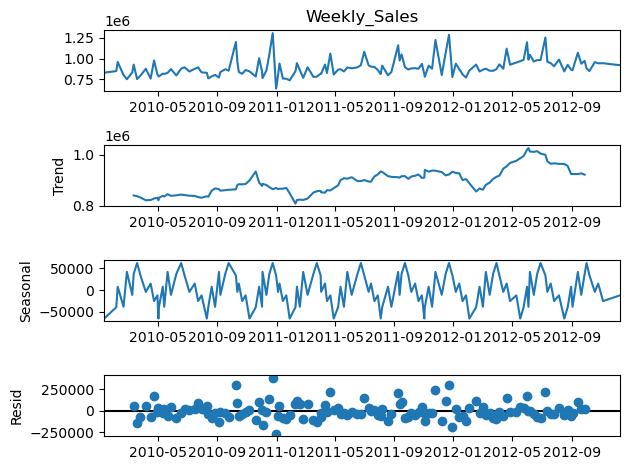

In [ ]:
print(decomposition.plot())

In [ ]:
mean1=store17_sales.rolling(window=10).mean() # Creating the Rolling mean
std1=store17_sales.rolling(window=10).std() # Creating the Rolling standard deviation

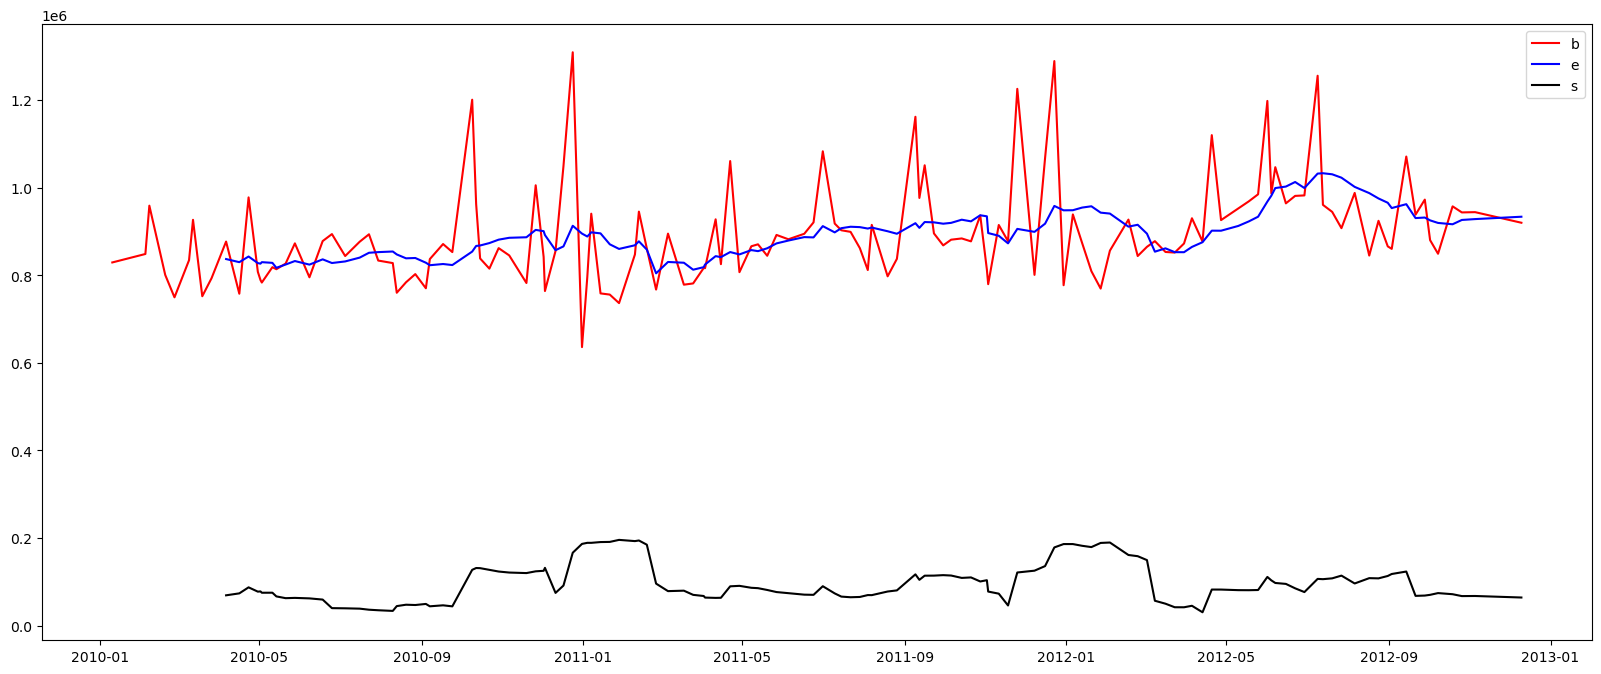

In [ ]:
# plotting the rolling mean
plt.figure(figsize=(20,8))
orig=plt.plot(store17_sales['Weekly_Sales'],color='red',label='Original')
mean=plt.plot(mean1,color='blue',label='Rolling Mean')
std=plt.plot(std1,color='black',label='Rolling Std')
plt.legend('best')
plt.show(block=False)

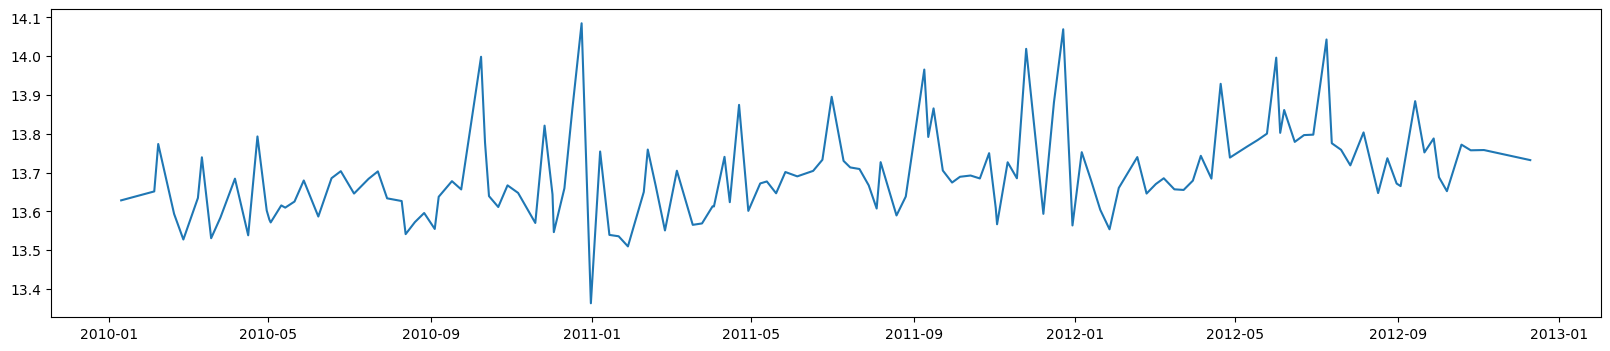

In [ ]:
df_log = np.log(store17_sales)# applaying log transformation to the data
plt.figure(figsize=(20,4))
plt.plot(df_log)

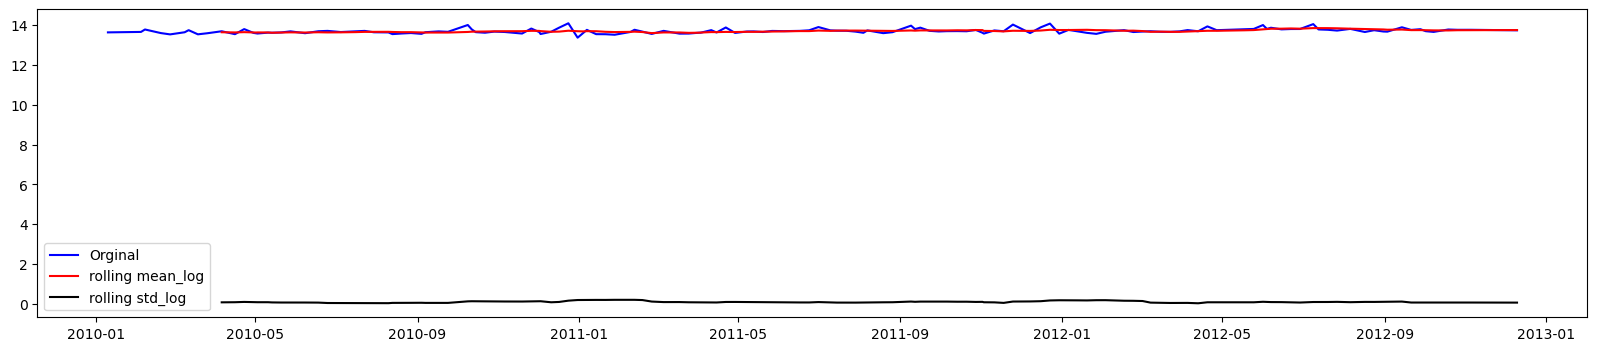

In [ ]:
# After the log transformation to the data we are comparing the actual data with rolling mean and standard deviation
mean_log = df_log.rolling(window = 10).mean()
std_log = df_log.rolling(window = 10).std()
plt.figure(figsize=(20,4))
plt.plot(df_log,color= 'blue',label = 'Orginal')
plt.plot(mean_log, color = 'red', label = 'rolling mean_log')
plt.plot(std_log, color = 'black', label = 'rolling std_log')
plt.legend(loc = 'best')
plt.show()

In [ ]:
# subtracting the log data and mean log data,
# can help in stabilizing the variance of the data, which is a common requirement for many time series modeling techniques.
df_new = df_log - mean_log
df_new.head(20)

Weekly_Sales
Date                    
2010-01-10           NaN
2010-02-04           NaN
2010-02-07           NaN
2010-02-19           NaN
2010-02-26           NaN
2010-03-09           NaN
2010-03-12           NaN
2010-03-19           NaN
2010-03-26           NaN
2010-04-06      0.049596
2010-04-16     -0.087448
2010-04-23      0.153329
2010-04-30     -0.020509
2010-05-02     -0.042541
2010-05-03     -0.054242
2010-05-11     -0.008435
2010-05-14     -0.001185
2010-05-21      0.005050
2010-05-28      0.049846
2010-06-08     -0.033392

In [ ]:
df_new.dropna(inplace = True) # dropping the nan values

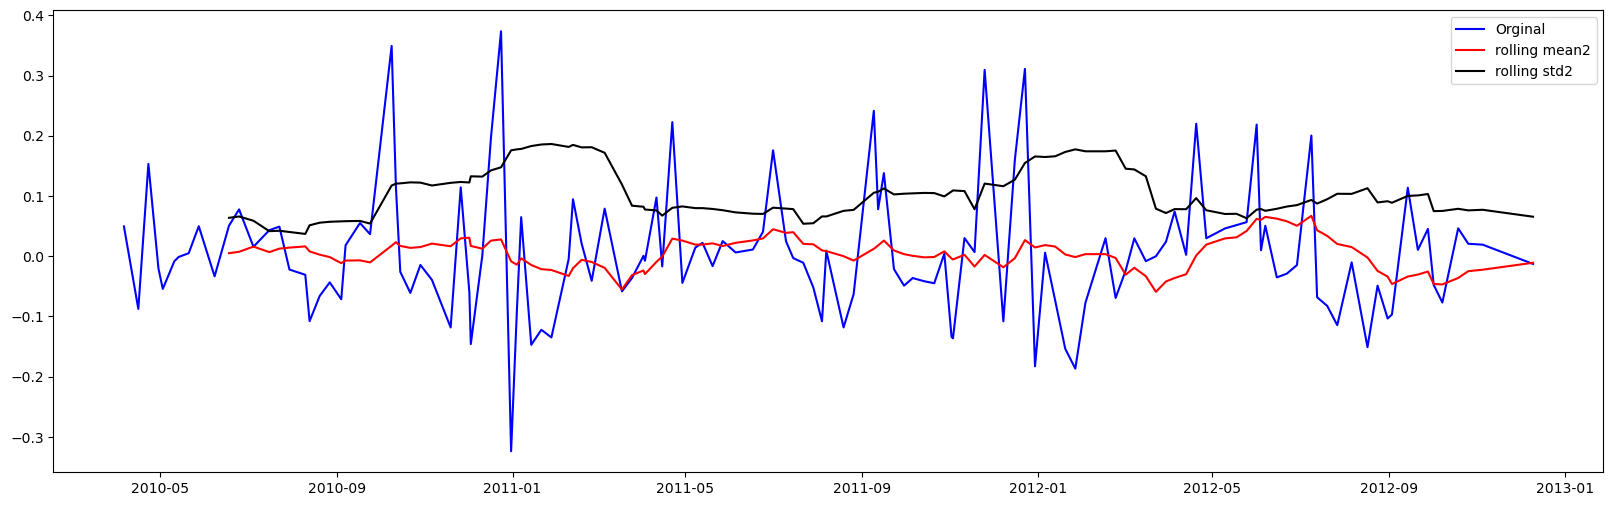

In [ ]:
# after the log transformation checking rolling stastics such as mean and standard deviation
mean2 = df_new.rolling(window = 12).mean()
std2 = df_new.rolling(window = 12).std()

plt.figure(figsize=(20,6))
plt.plot(df_new,color= 'blue',label = 'Orginal')
plt.plot(mean2, color = 'red', label = 'rolling mean2')
plt.plot(std2, color = 'black', label = 'rolling std2')
plt.legend(loc = 'best')
plt.show()

In [ ]:
adf_test(df_new['Weekly_Sales'],title='ADF TEST') # Checking the Data stationarity again after the log transformation

Augmented Dickey-Fuller Test: ADF TEST
ADF test statistic     -6.209908e+00
p-value                 5.540091e-08
# lags used             5.000000e+00
# observations          1.280000e+02
critical value (1%)    -3.482501e+00
critical value (5%)    -2.884398e+00
critical value (10%)   -2.578960e+00
Rejects the null hypothesis
Data has no unit root and is stationary


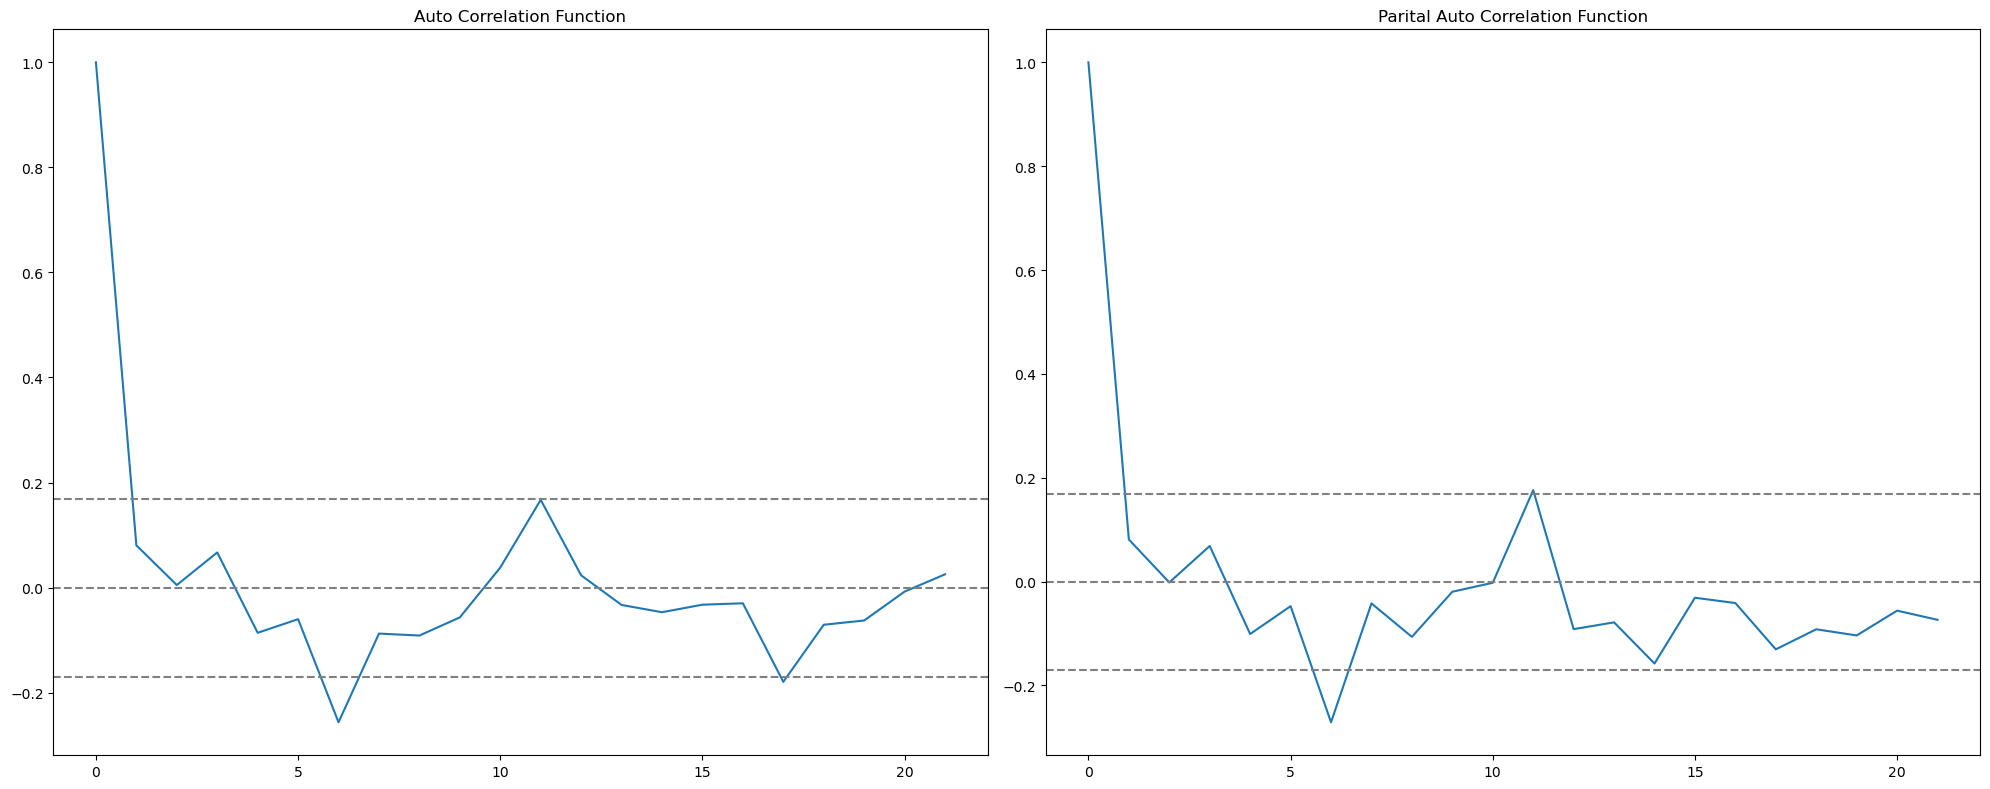

In [ ]:
# plotting the acf and pacf plot to identify the values of P AND Q
from statsmodels.tsa.stattools import acf,pacf
lag_acf=acf(df_new)
lag_pacf=pacf(df_new)


# Plot ACf
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.title('Auto Correlation Function')
plt.tight_layout()

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.title('Parital Auto Correlation Function')
plt.tight_layout()

In [ ]:
#pdq values are 3,1,3
p, d, q = 3, 1, 3  # I have got pdq values as 2,2,2
model = ARIMA(df_new, order=(p, d, q))# fitting the model
arima_result = model.fit()

# Get predictions on historical data
predictions = arima_result.predict()

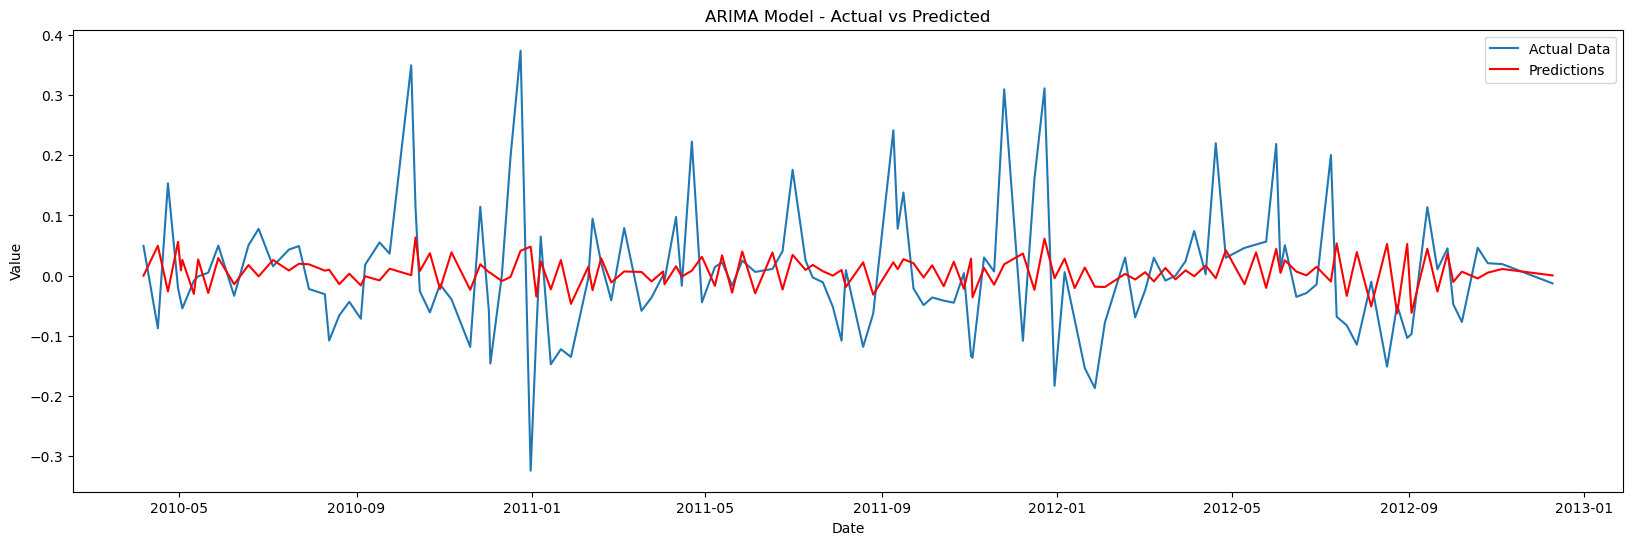

In [ ]:
# Plotting the actual and predictions
plt.figure(figsize=(20,6))
plt.plot(df_new, label='Actual Data')
plt.plot(predictions, color='red', label='Predictions')
plt.title('ARIMA Model - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
mse=mean_squared_error(df_new,predictions) # Checking the accuracy of the model with mse
print(f'Mean Squared_Error  {mse}')

Mean Squared_Error  0.011021192879565158


In [ ]:
rmse=np.sqrt(mse) # Checking the accuracy of the model with rmse
print(f'Root Mean Squared_Error  {rmse}')

Root Mean Squared_Error  0.1049818692897262


In [ ]:
forecast_steps = 12 # Forcasting the for the next 12 weeks
forecast = arima_result.forecast(steps=forecast_steps)

In [ ]:
end_date_actual_data = '2012-12-10' # here i need to find my dataset end date. so that i can continue from there to next 12 weeks

# Generate dates for the forecasted period
# with the help of datetime function iam creating a time span of 12 weeks
forecast_start_date = pd.to_datetime(end_date_actual_data) + pd.DateOffset(weeks=0)
forecast_end_date = forecast_start_date + pd.DateOffset(weeks=len(forecast))
forecast_dates = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='W')

In [ ]:
# creating a dataframe with forecasted sales and next 12 weeks dates
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted_Sales': forecast})

In [ ]:
forecast_df.set_index('Date',inplace=True) # setting the date as an index

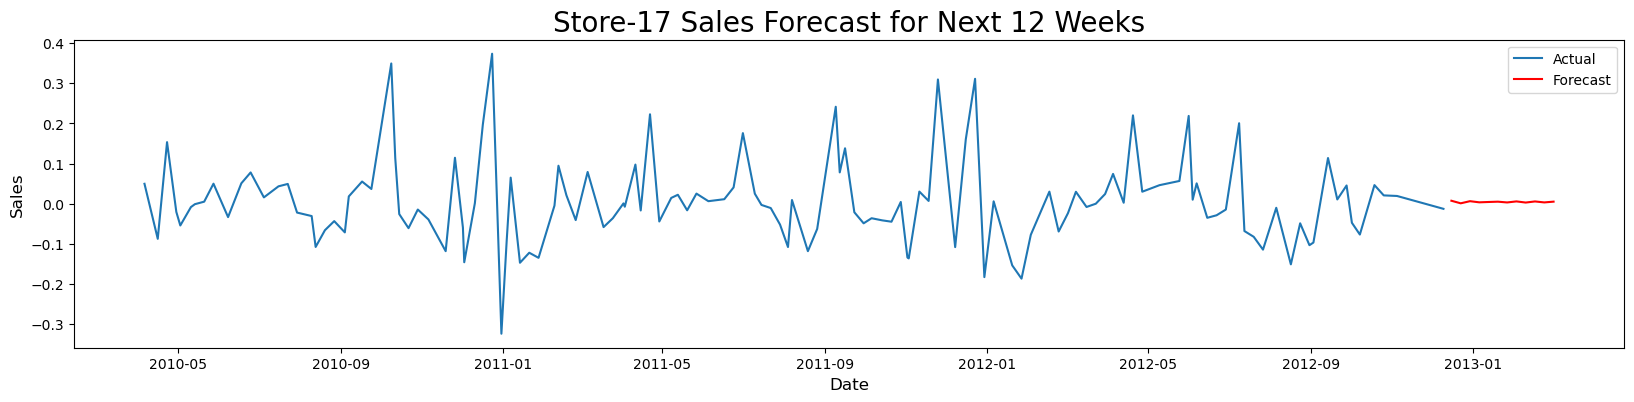

In [ ]:
plt.figure(figsize=(20, 4))# plotting the actual and forcaste sales for next 12 weeks
plt.plot(df_new, label='Actual')
plt.plot(forecast_df, label='Forecast', color='red')
plt.title('Store-17 Sales Forecast for Next 12 Weeks',fontsize=20)
plt.xlabel('Date',fontsize=12)
plt.ylabel('Sales',fontsize=12)
plt.legend()
plt.show()

In [ ]:
# Checking the Model Accuracy once again
rmse=np.sqrt(mse)
print(f'Root Mean Squared_Error {rmse}')

Root Mean Squared_Error 0.1049818692897262


**_______________________________________________________________________________________________________________________**
## Store 33 Sales Prediction

In [ ]:
# Creating a new data frame for store 11 sales forecast
store33_sales=df[df['Store']==33].groupby('Date')['Weekly_Sales'].sum().reset_index()

In [ ]:
store33_sales.set_index('Date',inplace=True) # Setting the date as index

In [ ]:
adf_test(store33_sales['Weekly_Sales'],title='ADF TEST') # Checking the pvalue and data stationarity

Augmented Dickey-Fuller Test: ADF TEST
ADF test statistic       -2.130272
p-value                   0.232518
# lags used               9.000000
# observations          133.000000
critical value (1%)      -3.480500
critical value (5%)      -2.883528
critical value (10%)     -2.578496
Fail to reject the null hypothesis
Data has a unit root and is non-stationary.


In [ ]:
decomposition=seasonal_decompose(store33_sales['Weekly_Sales'],period=13)# plotting the components of time series data

Figure(640x480)


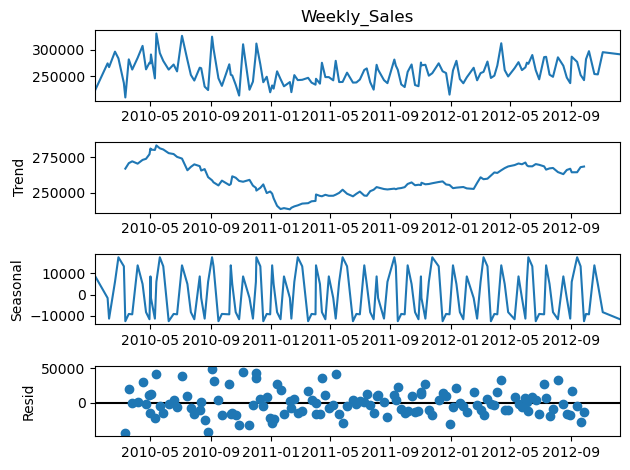

In [ ]:
print(decomposition.plot())

In [ ]:
mean1=store33_sales.rolling(window=10).mean() # Creating the Rolling mean
std1=store33_sales.rolling(window=10).std() # Creating the Rolling standard deviation

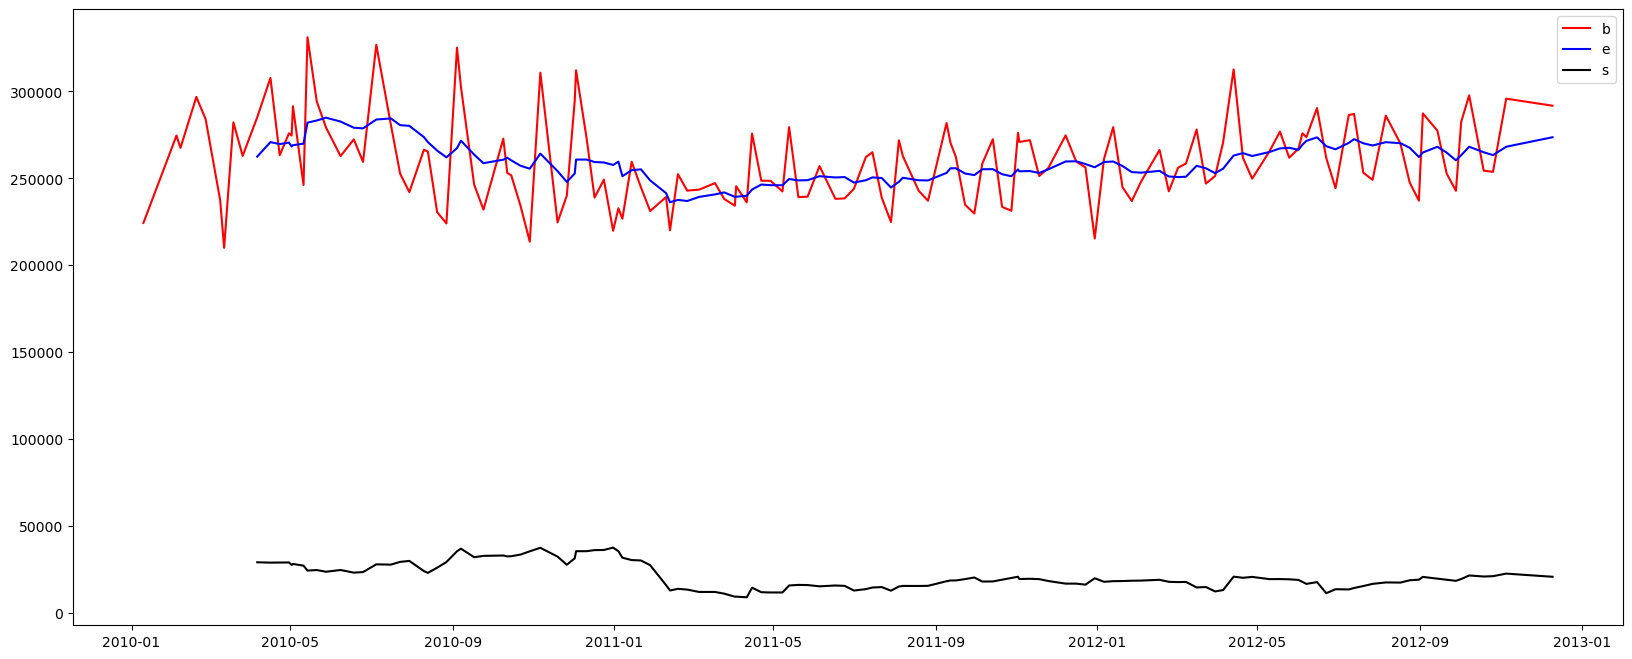

In [ ]:
# plotting the rolling mean
plt.figure(figsize=(20,8))
orig=plt.plot(store33_sales['Weekly_Sales'],color='red',label='Original')
mean=plt.plot(mean1,color='blue',label='Rolling Mean')
std=plt.plot(std1,color='black',label='Rolling Std')
plt.legend('best')
plt.show(block=False)

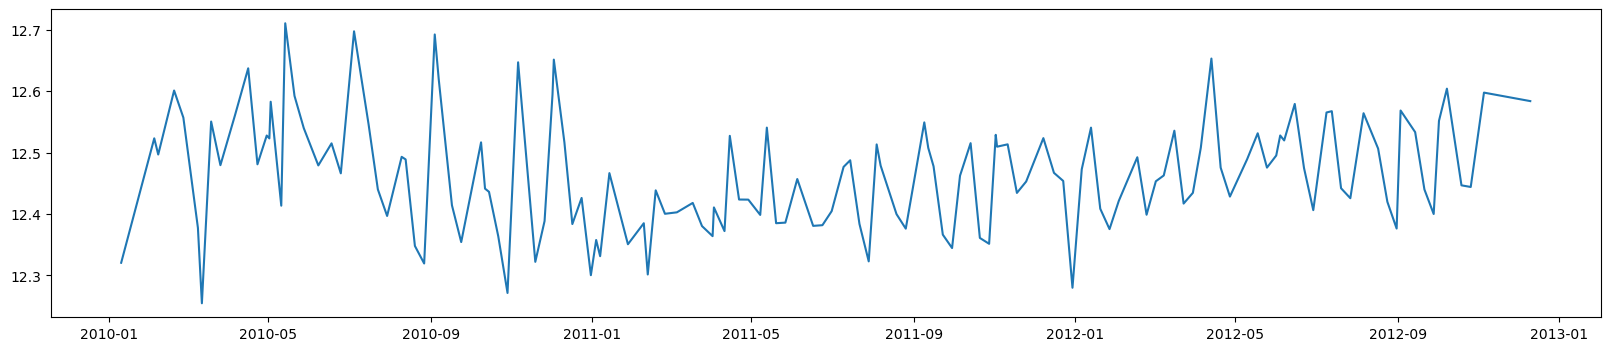

In [ ]:
df_log = np.log(store33_sales)# applaying log transformation to the data
plt.figure(figsize=(20,4))
plt.plot(df_log)

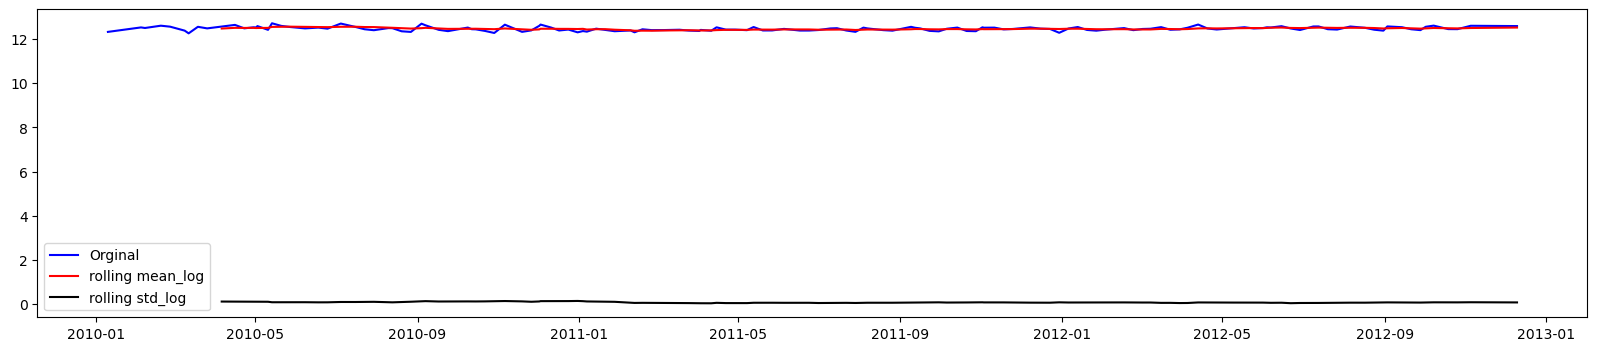

In [ ]:
# After the log transformation to the data we are comparing the actual data with rolling mean and standard deviation
mean_log = df_log.rolling(window = 10).mean()
std_log = df_log.rolling(window = 10).std()
plt.figure(figsize=(20,4))
plt.plot(df_log,color= 'blue',label = 'Orginal')
plt.plot(mean_log, color = 'red', label = 'rolling mean_log')
plt.plot(std_log, color = 'black', label = 'rolling std_log')
plt.legend(loc = 'best')
plt.show()

In [ ]:
# subtracting the log data and mean log data,
# can help in stabilizing the variance of the data, which is a common requirement for many time series modeling techniques.
df_new = df_log - mean_log
df_new.head(20)

Weekly_Sales
Date                    
2010-01-10           NaN
2010-02-04           NaN
2010-02-07           NaN
2010-02-19           NaN
2010-02-26           NaN
2010-03-09           NaN
2010-03-12           NaN
2010-03-19           NaN
2010-03-26           NaN
2010-04-06      0.088436
2010-04-16      0.133338
2010-04-23     -0.018664
2010-04-30      0.025073
2010-05-02      0.028180
2010-05-03      0.085294
2010-05-11     -0.087463
2010-05-14      0.163782
2010-05-21      0.041444
2010-05-28     -0.016974
2010-06-08     -0.069565

In [ ]:
df_new.dropna(inplace = True) # dropping the nan values

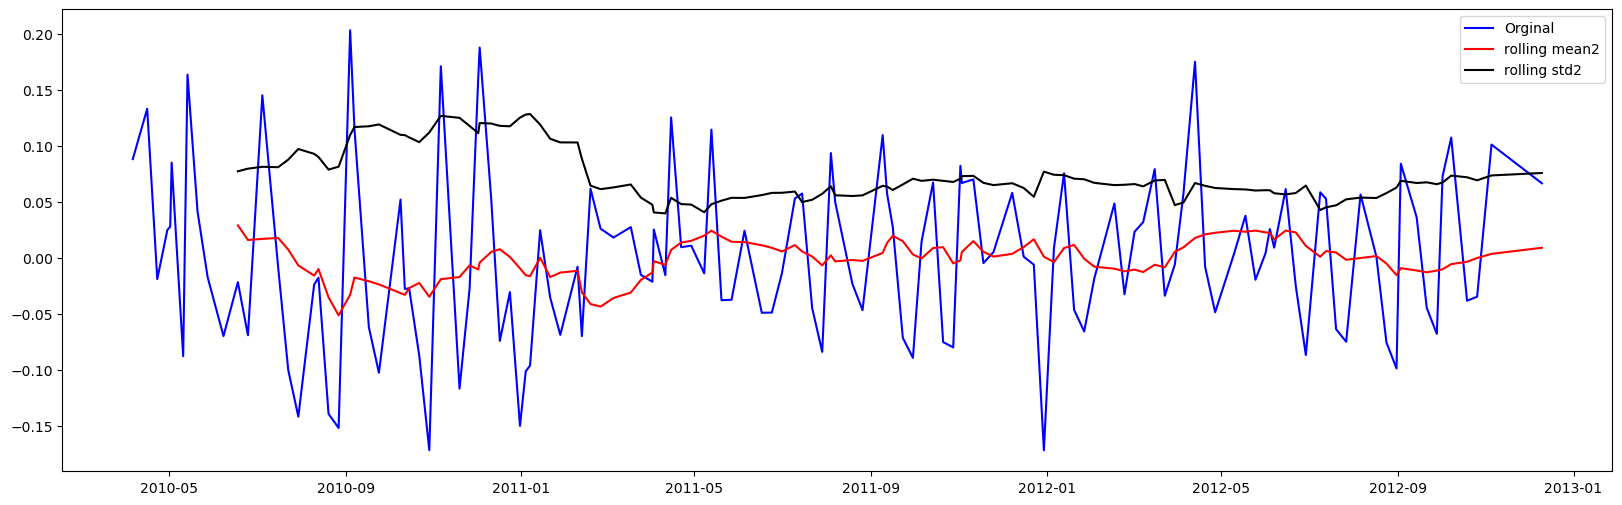

In [ ]:
# after the log transformation checking rolling stastics such as mean and standard deviation
mean2 = df_new.rolling(window = 12).mean()
std2 = df_new.rolling(window = 12).std()

plt.figure(figsize=(20,6))
plt.plot(df_new,color= 'blue',label = 'Orginal')
plt.plot(mean2, color = 'red', label = 'rolling mean2')
plt.plot(std2, color = 'black', label = 'rolling std2')
plt.legend(loc = 'best')
plt.show()

In [ ]:
adf_test(df_new['Weekly_Sales'],title='ADF TEST') # Checking the Data stationarity again after the log transformation

Augmented Dickey-Fuller Test: ADF TEST
ADF test statistic       -5.493019
p-value                   0.000002
# lags used               5.000000
# observations          128.000000
critical value (1%)      -3.482501
critical value (5%)      -2.884398
critical value (10%)     -2.578960
Rejects the null hypothesis
Data has no unit root and is stationary


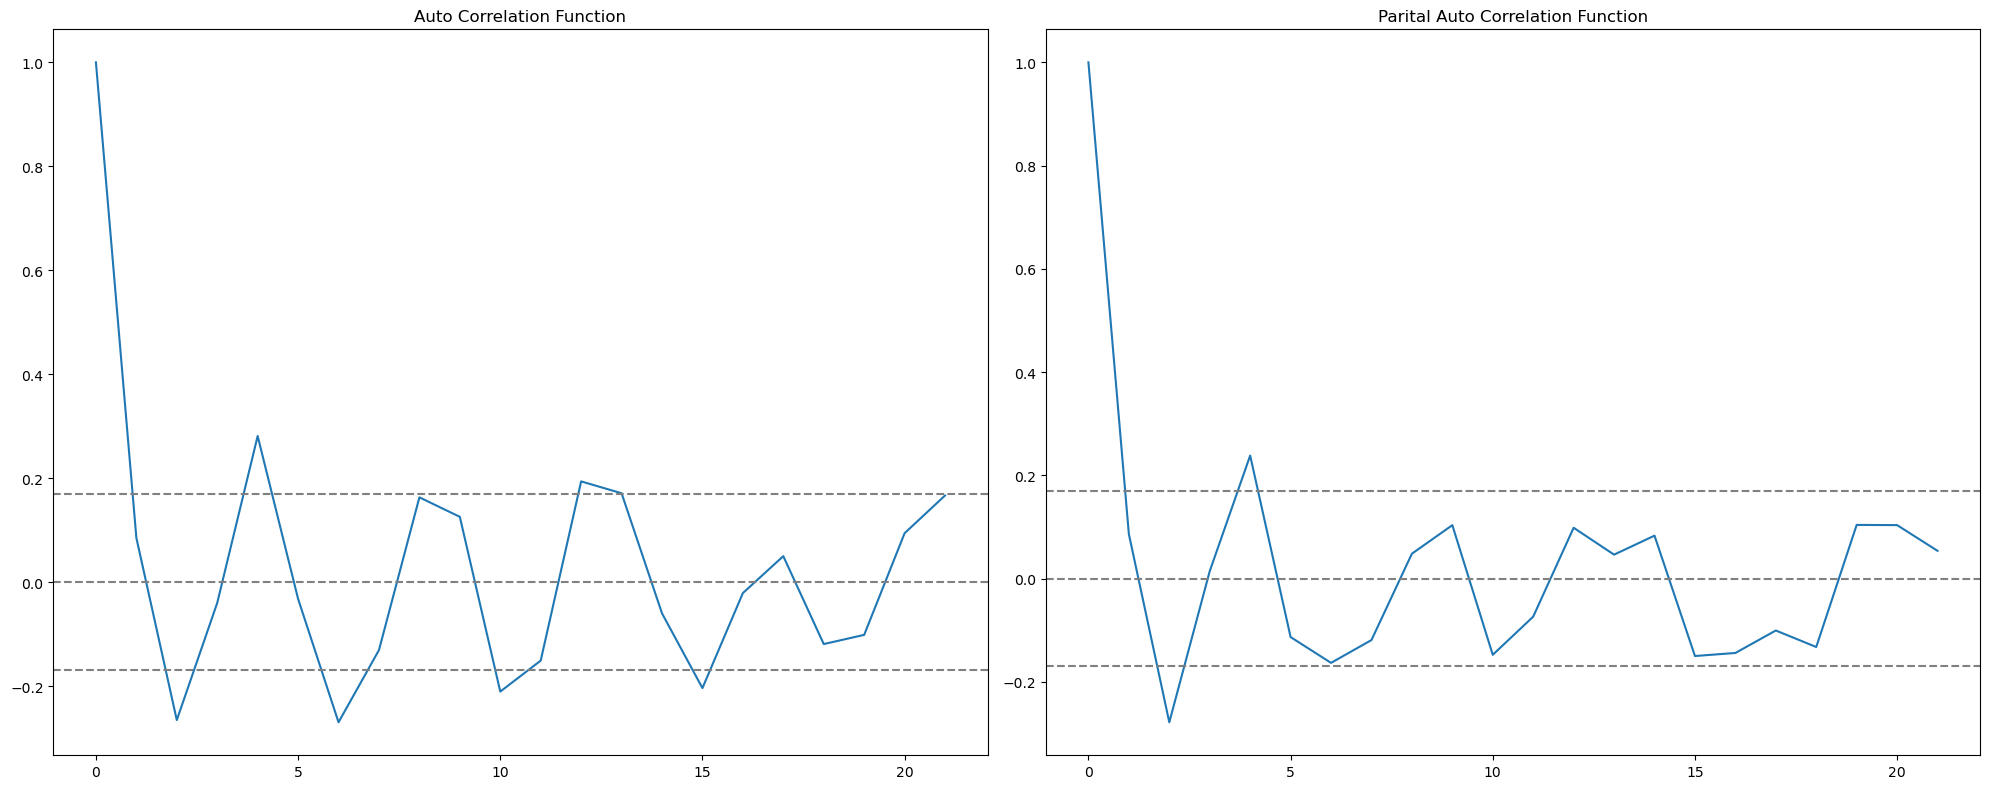

In [ ]:
# plotting the acf and pacf plot to identify the values of P AND Q
from statsmodels.tsa.stattools import acf,pacf
lag_acf=acf(df_new)
lag_pacf=pacf(df_new)


# Plot ACf
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.title('Auto Correlation Function')
plt.tight_layout()

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.title('Parital Auto Correlation Function')
plt.tight_layout()

In [ ]:
#pdq values are 2,1,2
p, d, q = 2, 1, 2  # I have got pdq values as 2,2,2
model = ARIMA(df_new, order=(p, d, q))# fitting the model
arima_result = model.fit()

# Get predictions on historical data
predictions = arima_result.predict()

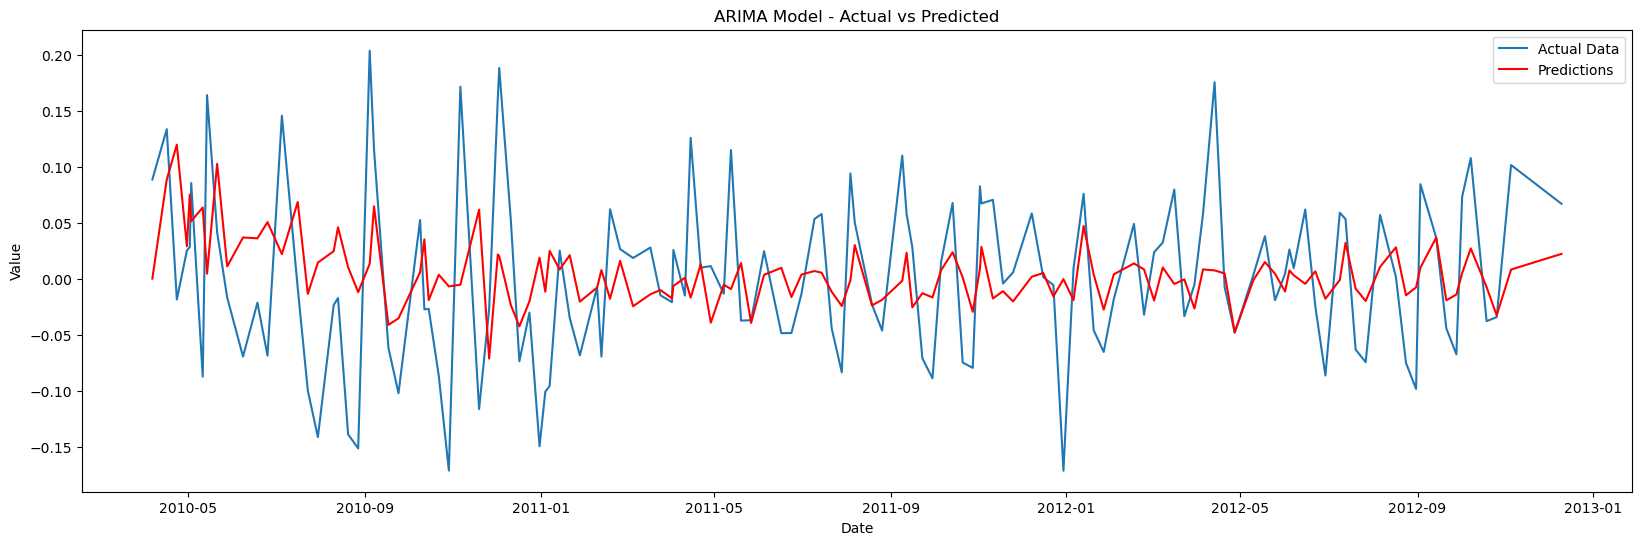

In [ ]:
# Plotting the actual and predictions
plt.figure(figsize=(20,6))
plt.plot(df_new, label='Actual Data')
plt.plot(predictions, color='red', label='Predictions')
plt.title('ARIMA Model - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
mse=mean_squared_error(df_new,predictions) # Checking the accuracy of the model with mse
print(f'Mean Squared_Error  {mse}')

Mean Squared_Error  0.005680374059265797


In [ ]:
rmse=np.sqrt(mse) # Checking the accuracy of the model with rmse
print(f'Root Mean Squared_Error  {rmse}')

Root Mean Squared_Error  0.07536825631037113


In [ ]:
forecast_steps = 12 # Forcasting the for the next 12 weeks
forecast = arima_result.forecast(steps=forecast_steps)

In [ ]:
end_date_actual_data = '2012-12-10' # here i need to find my dataset end date. so that i can continue from there to next 12 weeks

# Generate dates for the forecasted period
# with the help of datetime function iam creating a time span of 12 weeks
forecast_start_date = pd.to_datetime(end_date_actual_data) + pd.DateOffset(weeks=0)
forecast_end_date = forecast_start_date + pd.DateOffset(weeks=len(forecast))
forecast_dates = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='W')

In [ ]:
# creating a dataframe with forecasted sales and next 12 weeks dates
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted_Sales': forecast})

In [ ]:
forecast_df.set_index('Date',inplace=True) # setting the date as an index

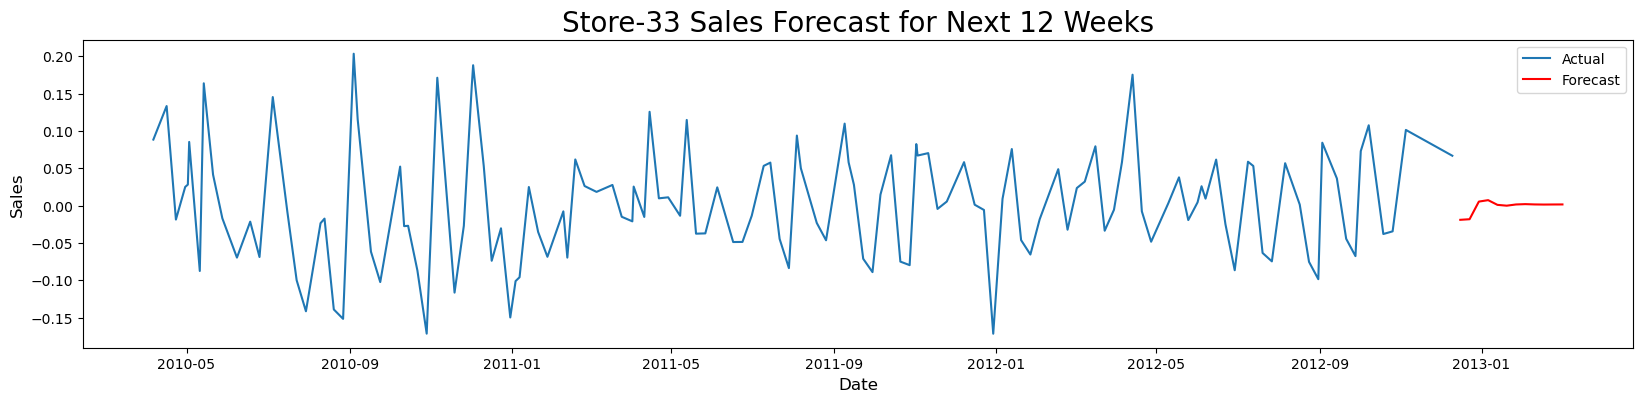

In [ ]:
plt.figure(figsize=(20, 4))# plotting the actual and forcaste sales for next 12 weeks
plt.plot(df_new, label='Actual')
plt.plot(forecast_df, label='Forecast', color='red')
plt.title('Store-33 Sales Forecast for Next 12 Weeks',fontsize=20)
plt.xlabel('Date',fontsize=12)
plt.ylabel('Sales',fontsize=12)
plt.legend()
plt.show()

In [ ]:
# Checking the Model Accuracy once again
rmse=np.sqrt(mse)
print(f'Root Mean Squared_Error {rmse}')

Root Mean Squared_Error 0.07536825631037113


# THANK YOU